# Exploring the ABIDE dataset

### Prepared by: Mohammad Awad on 21/07/2023-Present (ongoing work)
### Supervised by: Dr. Rawan Ghnemat and Dr. Nailah Al-Madi


In [ ]:
!pip install nibabel
!pip install SimpleITK

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 17.2 MB/s eta 0:00:00


In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt


## Reho Data Preprocessing and Exploration

In [ ]:
#ASD
!python download_abide_preproc.py -a -d reho -p cpac -s filt_noglobal -o ./ASD

In [ ]:
#TDC
!python download_abide_preproc.py -c -d reho -p cpac -s filt_noglobal -o ./TDC

In [ ]:
#ASD patients path
!mv ./ASD/Outputs/cpac/filt_noglobal/reho/* ./ASD
ASD_Path='./ASD/'

#TDC controls path
!mv ./TDC/Outputs/cpac/filt_noglobal/reho/* ./TDC
TDC_Path='./TDC/'

mv: cannot stat './ASD/Outputs/cpac/filt_noglobal/reho/*': No such file or directory
mv: cannot stat './TDC/Outputs/cpac/filt_noglobal/reho/*': No such file or directory


In [ ]:
#Removing ASD leftover folders
!rm -d /content/ASD/Outputs/cpac/filt_noglobal/reho
!rm -d /content/ASD/Outputs/cpac/filt_noglobal
!rm -d /content/ASD/Outputs/cpac
!rm -d /content/ASD/Outputs

#Removing TDC leftover folders
!rm -d /content/TDC/Outputs/cpac/filt_noglobal/reho
!rm -d /content/TDC/Outputs/cpac/filt_noglobal
!rm -d /content/TDC/Outputs/cpac
!rm -d /content/TDC/Outputs

In [ ]:
!mkdir ./Data
!mv ASD ./Data/ASD
!mv TDC ./Data/TDC

In [ ]:
x=!ls ./Data/ASD

In [ ]:
import os

def get_files_in_directory(directory_path):
    file_list = []
    for filename in os.listdir(directory_path):
        if os.path.isfile(os.path.join(directory_path, filename)):
            file_list.append(filename)
    return file_list

directory_path0 = './Data/ASD/'

try:
    ASD_files = get_files_in_directory(directory_path0)
    print("Files in the ASD directory:")
    print(ASD_files)
except FileNotFoundError:
    print("Directory not found.")


directory_path1 = './Data/TDC/'

try:
    TDC_files = get_files_in_directory(directory_path1)
    print("Files in the TDC directory:")
    print(TDC_files)
except FileNotFoundError:
    print("Directory not found.")


Files in the ASD directory:
['USM_0050497_rois_cc200.1D', 'UCLA_1_0051211_rois_cc200.1D', 'SBL_0051576_rois_cc200.1D', 'UCLA_1_0051230_rois_cc200.1D', 'Leuven_1_0050711_rois_cc200.1D', 'NYU_0051012_rois_cc200.1D', 'NYU_0051006_rois_cc200.1D', 'NYU_0051029_rois_cc200.1D', 'NYU_0051015_rois_cc200.1D', 'Olin_0050125_rois_cc200.1D', 'KKI_0050825_rois_cc200.1D', 'Caltech_0051458_rois_cc200.1D', 'Pitt_0050025_rois_cc200.1D', 'UM_1_0050307_rois_cc200.1D', 'CMU_b_0050651_rois_cc200.1D', 'USM_0050499_rois_cc200.1D', 'NYU_0050979_rois_cc200.1D', 'NYU_0051016_rois_cc200.1D', 'Trinity_0050255_rois_cc200.1D', 'Trinity_0050248_rois_cc200.1D', 'NYU_0051013_rois_cc200.1D', 'NYU_0050962_rois_cc200.1D', 'NYU_0050977_rois_cc200.1D', 'USM_0050490_rois_cc200.1D', 'Olin_0050129_rois_cc200.1D', 'UCLA_1_0051218_rois_cc200.1D', 'NYU_0050983_rois_cc200.1D', 'UM_1_0050280_rois_cc200.1D', 'Stanford_0051163_rois_cc200.1D', 'KKI_0050803_rois_cc200.1D', 'USM_0050494_rois_cc200.1D', 'UM_2_0050410_rois_cc200.1D', 'SBL

In [ ]:
print(len(ASD_files))
print(len(TDC_files))
print("Total number of images" ,len(TDC_files)+len(ASD_files))

408
476
Total number of images 884


In [ ]:
ASD_test = nib.load('/content/aal_roi_atlas.nii.gz').get_fdata()
ASD_test.shape


(65, 77, 63)

In [ ]:
#A look inside the fMRI data
#Saving middle slices of the data
!mkdir ASD
for file in ASD_files:
  print(file)
  ASD_test = nib.load('/content/Data/ASD/{}'.format(file)).get_fdata()
  #ASD_test.shape

  plt.imsave('./ASD/{}.png'.format(file), ASD_test[:, :, int(z/2)], cmap='jet')
  #z = ASD_test.shape[2]  # Z-Axis
  #test_slice = ASD_test[:, :, int(z/2)]
  #plt.imshow(test_slice, cmap='jet')  # Display a specific slice from the z-axis
  #plt.title('Slice {} (Z-Axis)'.format(file))
  #plt.colorbar()
  #plt.show()

mkdir: cannot create directory ‘ASD’: File exists


In [ ]:
import shutil
from google.colab import files

ASDFiles = './ASD'

# Compress the folder into a zip file
shutil.make_archive('/content/downloaded_folder', 'zip', ASDFiles)

# Download the zip file
files.download('/content/downloaded_folder.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
plt.imsave('my_image.png', test_slice, cmap='jet')

In [ ]:
#A Getting the middle slice of the data
!mkdir TDC
for file in TDC_files:
  print(file)
  TDC_test = nib.load('/content/Data/TDC/{}'.format(file)).get_fdata()
  TDC_test.shape

  plt.imsave('./TDC/{}.png'.format(file), ASD_test[:, :, int(z/2)], cmap='jet')
  #z = TDC_test.shape[2]  # Z-Axis
  #test_slice = TDC_test[:, :, int(z/2)]
  #plt.imshow(test_slice, cmap='jet')  # Display a specific slice from the z-axis
  #plt.title('Slice {} (Z-Axis)'.format(file))
  #plt.colorbar()
  #plt.show()

In [ ]:
TDCFiles = './TDC'

# Compress the folder into a zip file
shutil.make_archive('/content/downloaded_folder', 'zip', TDCFiles)

# Download the zip file
files.download('/content/downloaded_folder.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
TDC_test = nib.load('/content/aal_roi_atlas.nii.gz').get_fdata()
TDC_test.shape

(65, 77, 63)

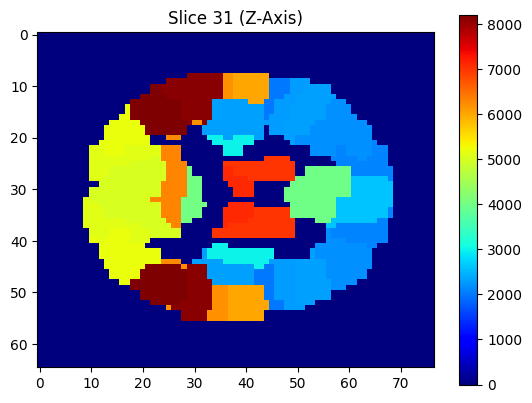

In [ ]:
#A look inside the fMRI data
z = TDC_test.shape[2]  # Z-Axis

test_slice = TDC_test[:, :, int(z/2)]
plt.imshow(test_slice, cmap='jet')  # Display a specific slice from the z-axis
plt.title('Slice {} (Z-Axis)'.format(int(z/2)))
plt.colorbar()
plt.show()



In [ ]:
!ls

ASD	    CNN.py		       Outputs	sample_data
CNN_PSO.py  download_abide_preproc.py  pso.py	TDC


In [ ]:
#importing libraries
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np # linear algebra
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns

from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np


In [ ]:
#data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_dir = "/content/Data/"

# All images will be rescaled by 1./255.
gen = ImageDataGenerator()
datagen=gen.flow_from_directory(data_dir,class_mode='categorical',target_size=(61,173))


Found 0 images belonging to 2 classes.


In [ ]:
#Train Validate Split
!pip install split-folders
import splitfolders

splitfolders.ratio(data_dir, output="SplitData", seed=711, ratio=(.7, .3))
#Work continued on vscode on the local machine


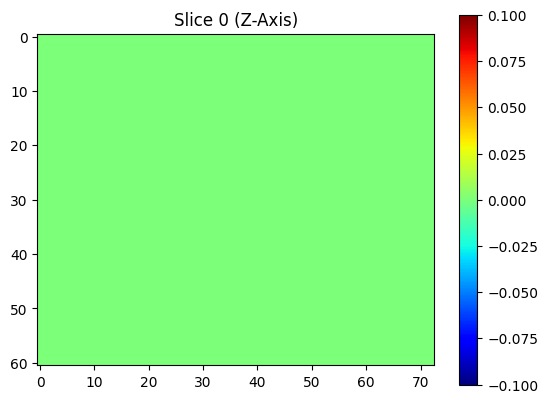

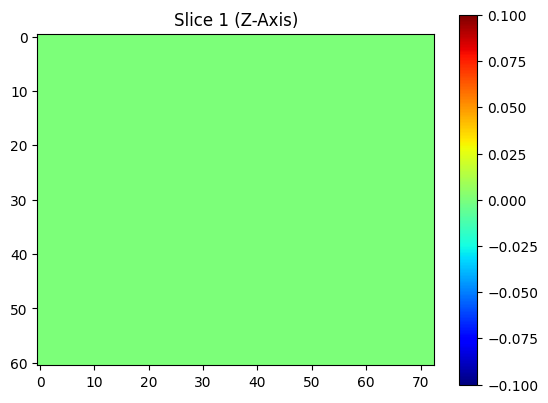

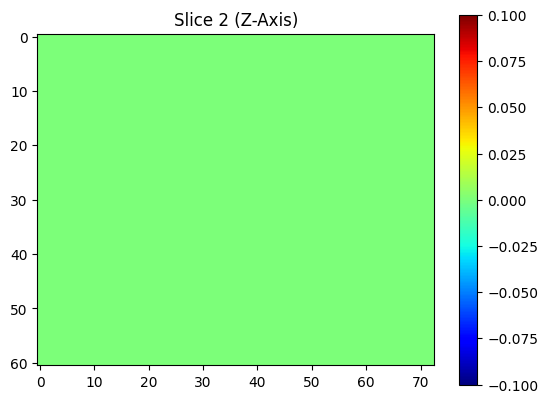

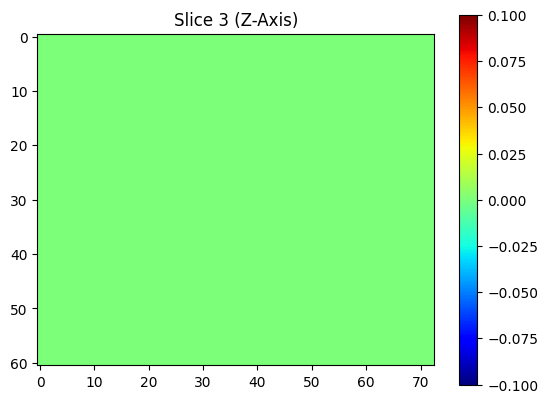

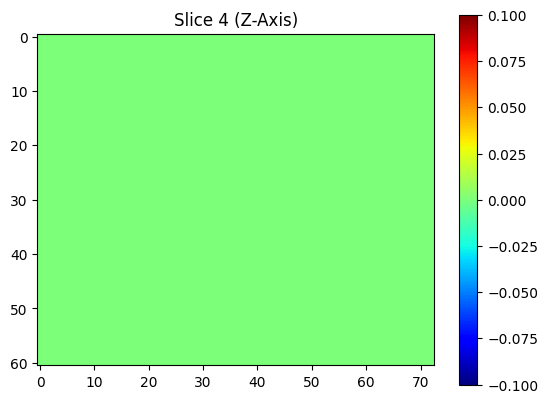

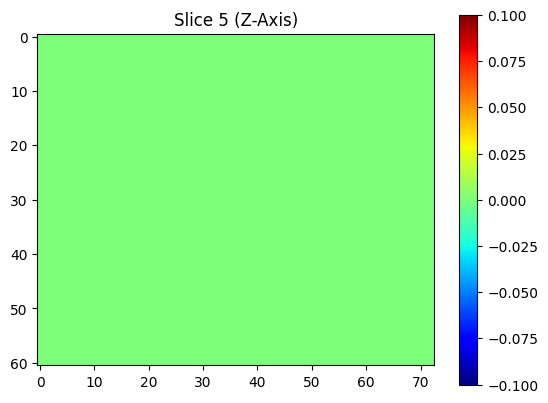

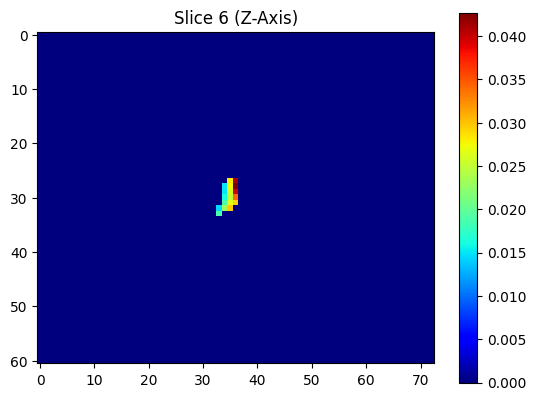

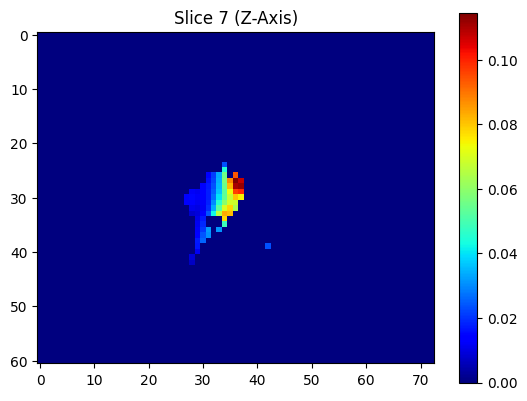

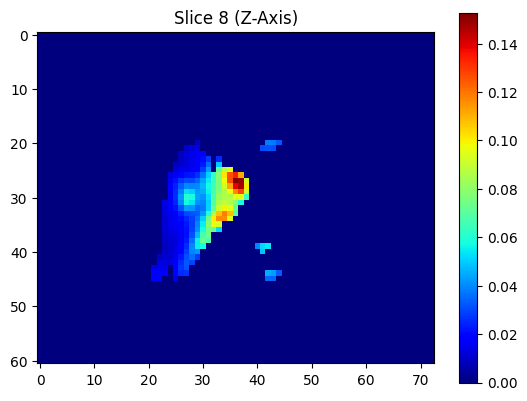

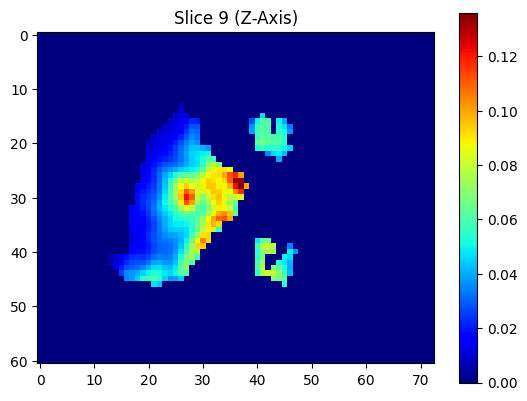

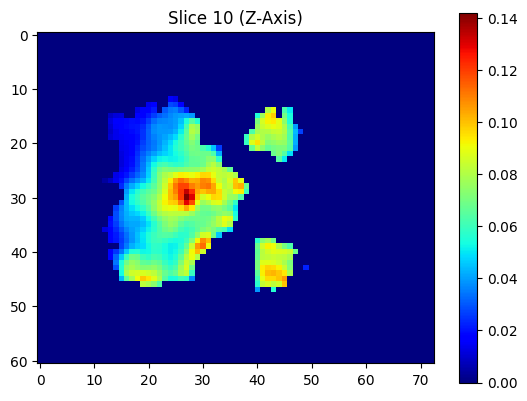

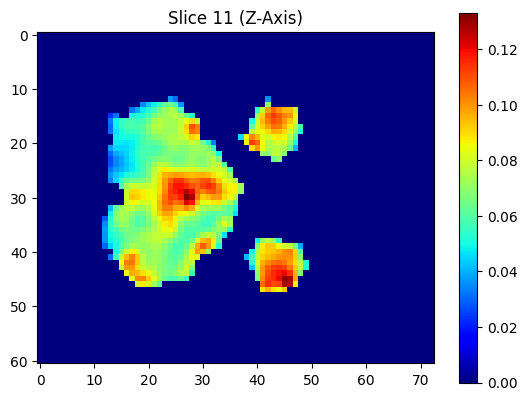

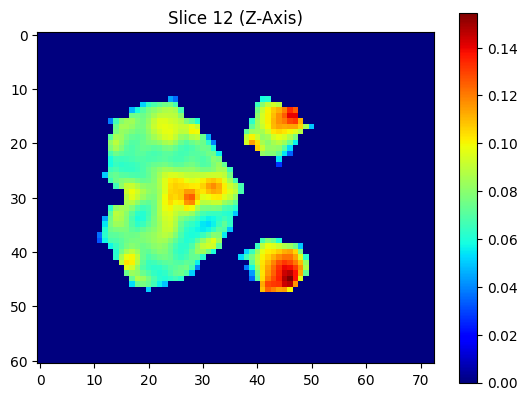

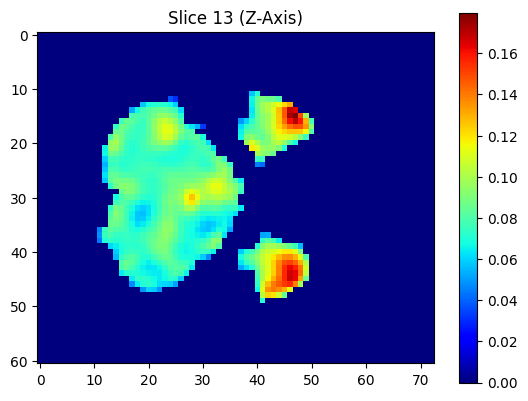

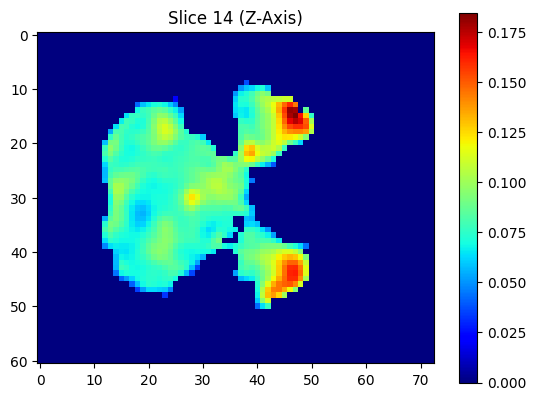

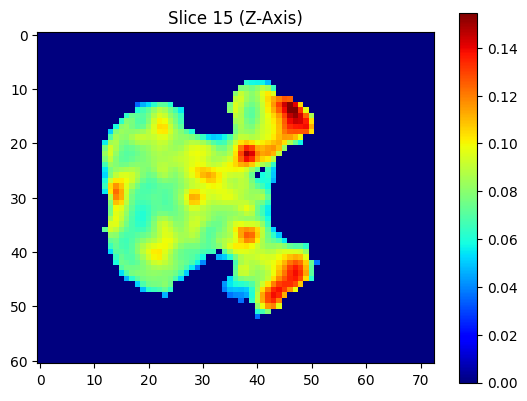

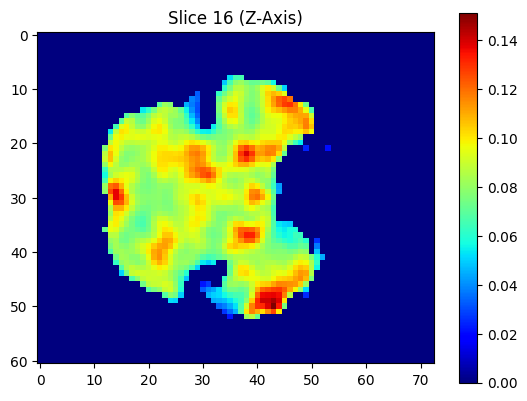

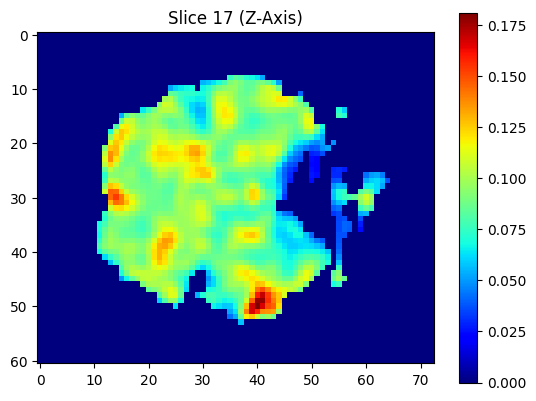

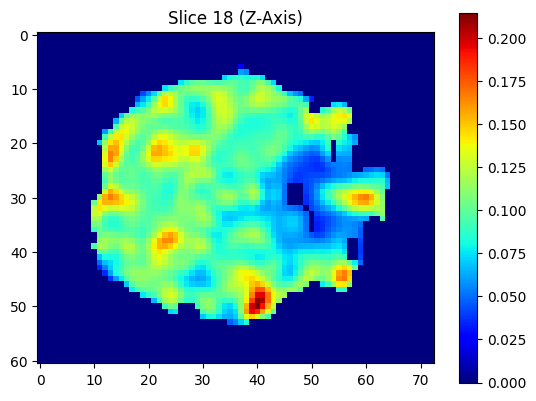

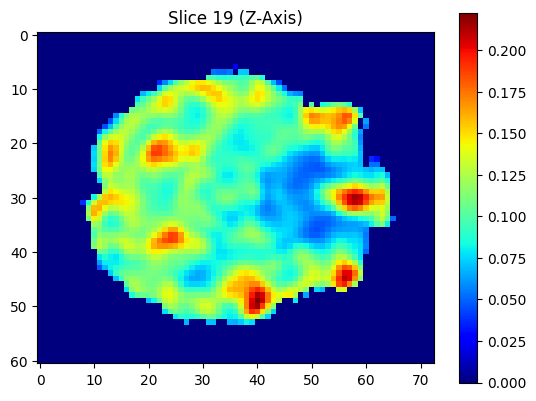

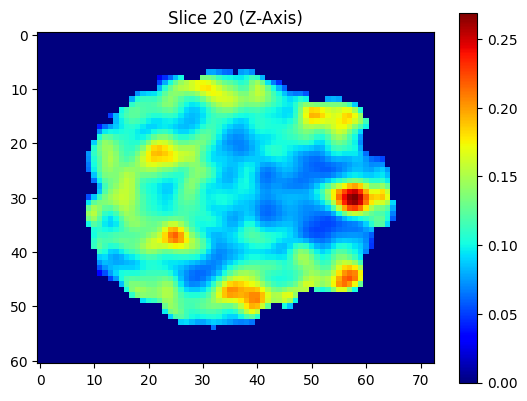

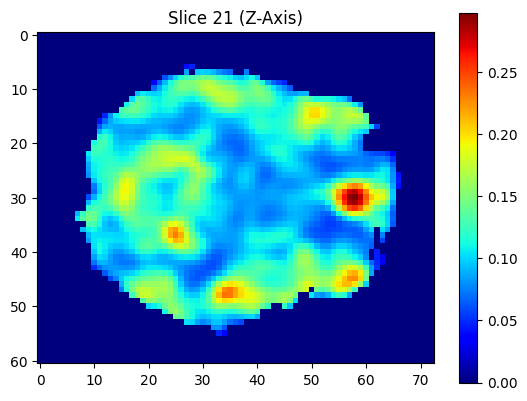

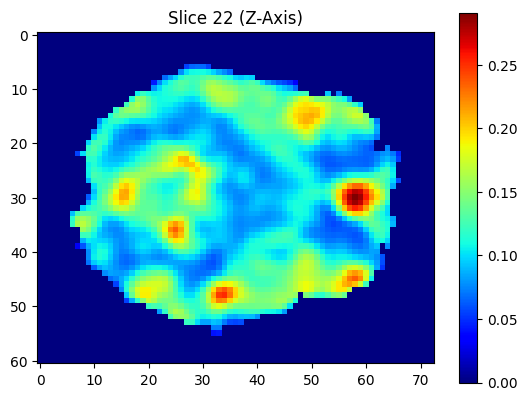

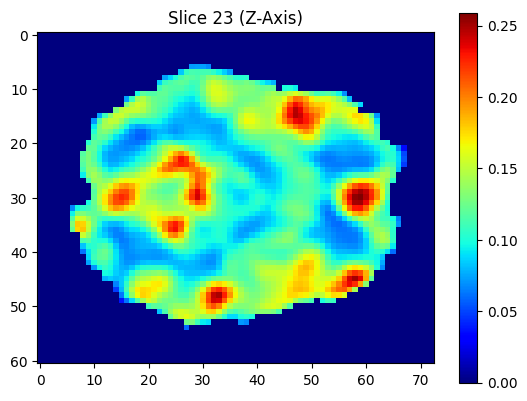

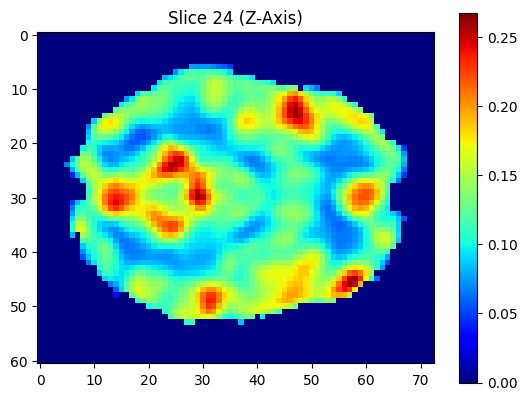

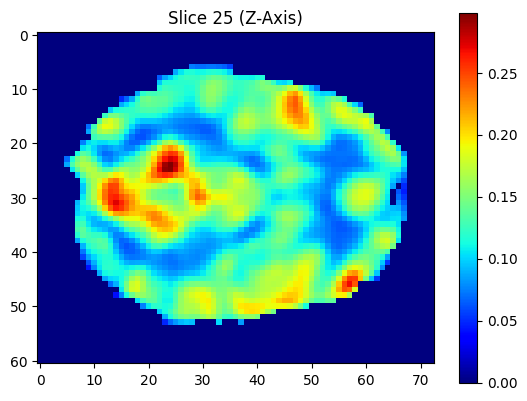

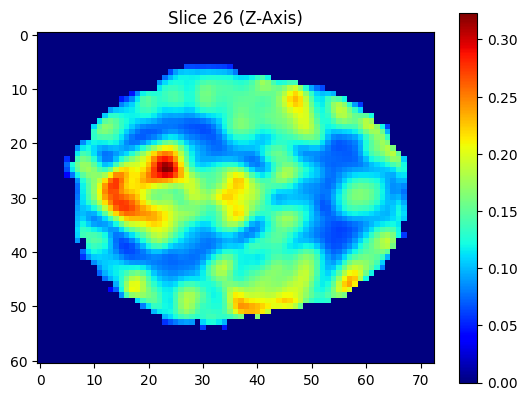

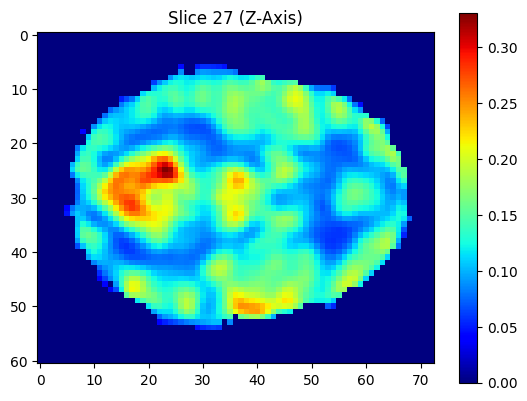

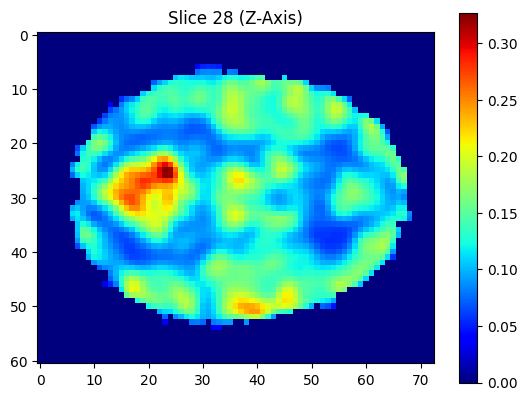

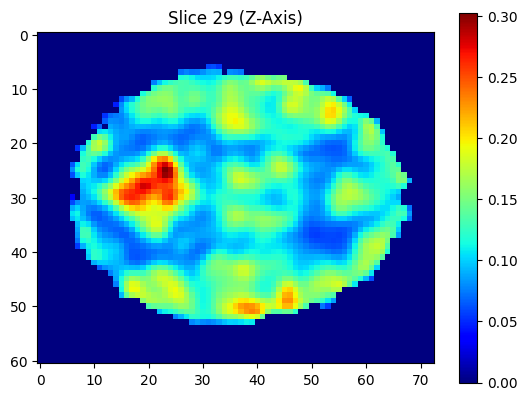

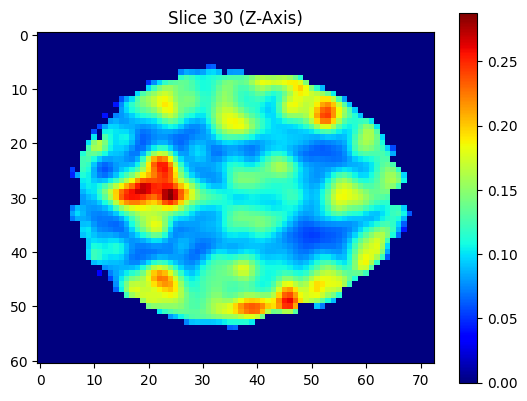

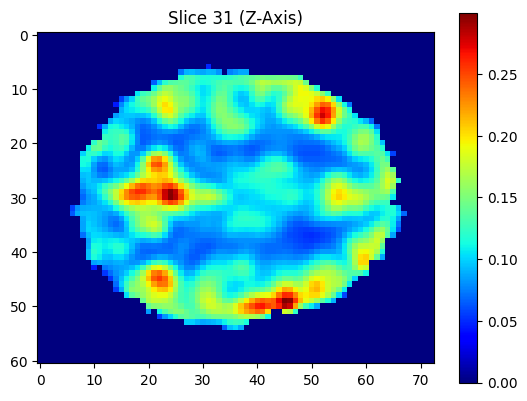

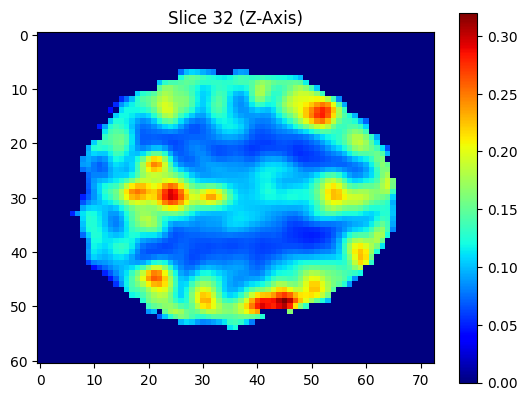

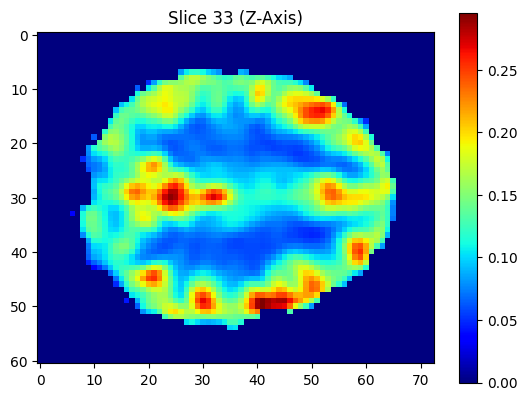

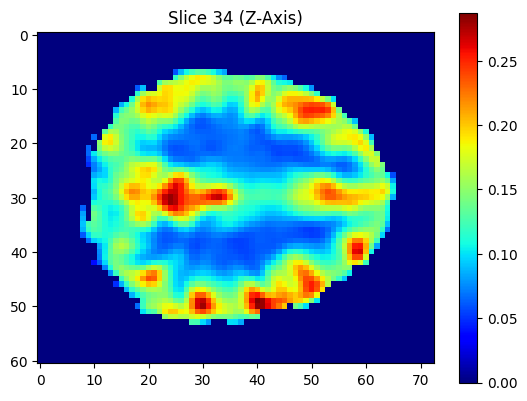

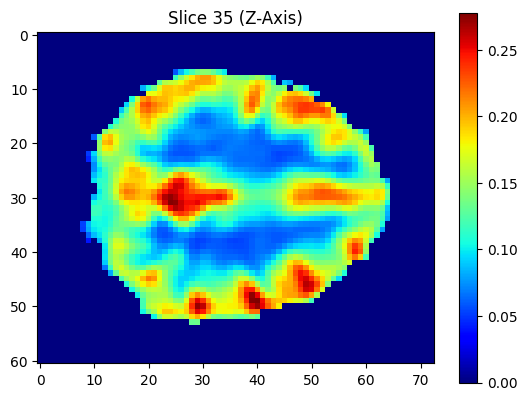

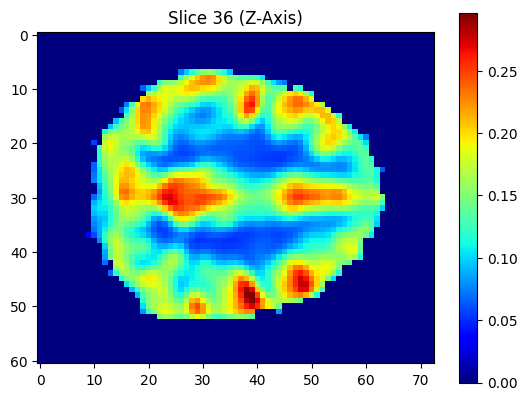

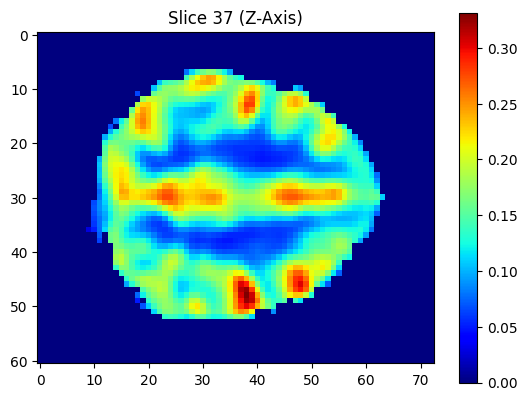

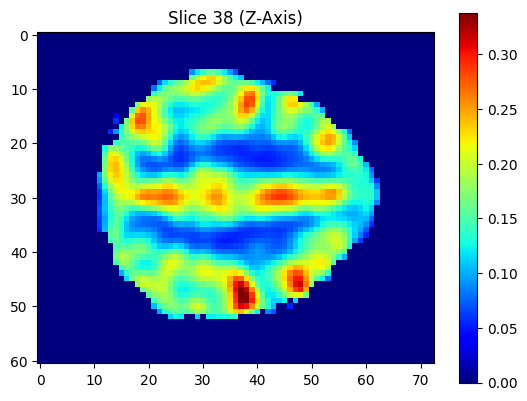

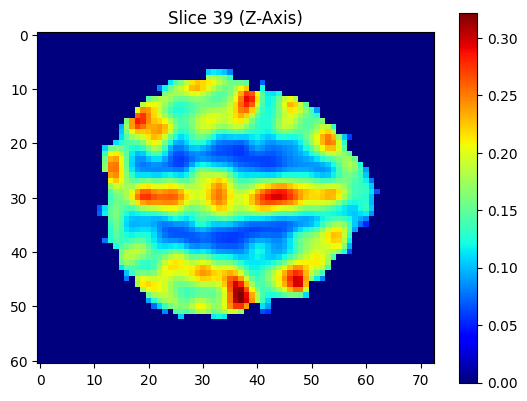

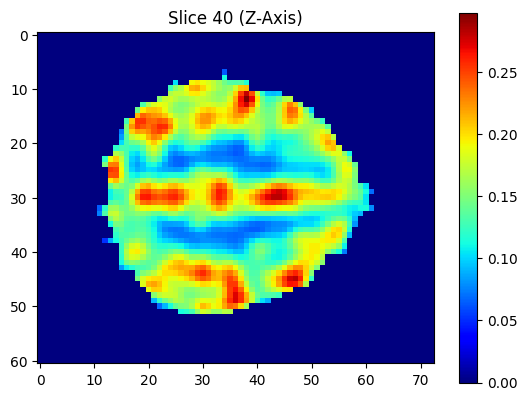

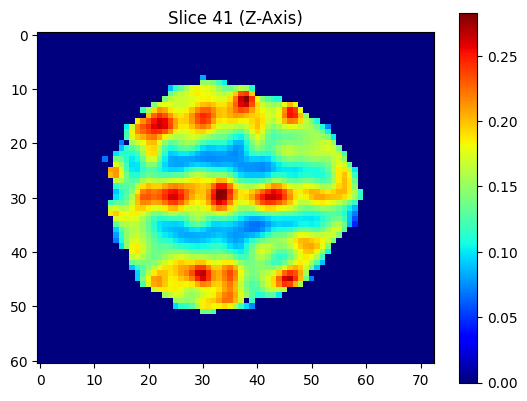

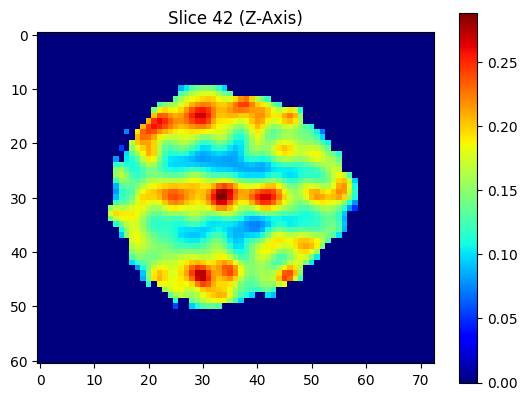

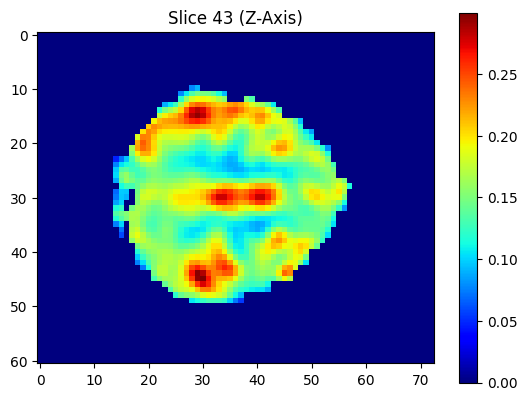

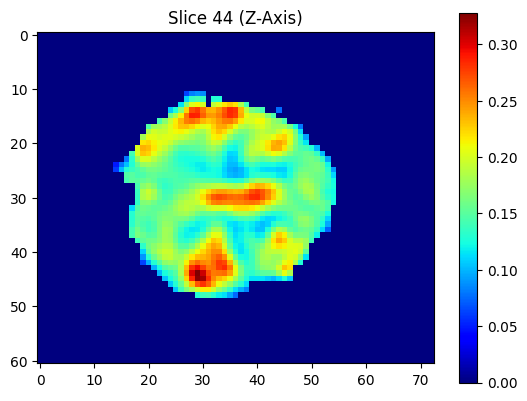

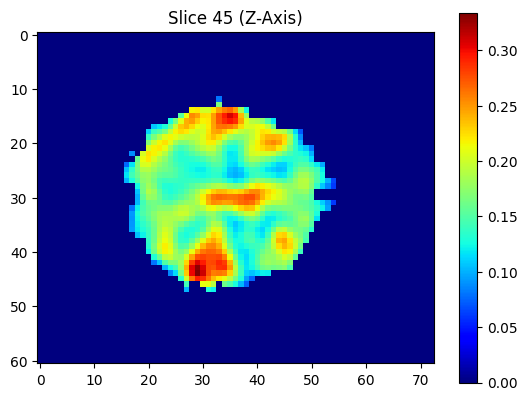

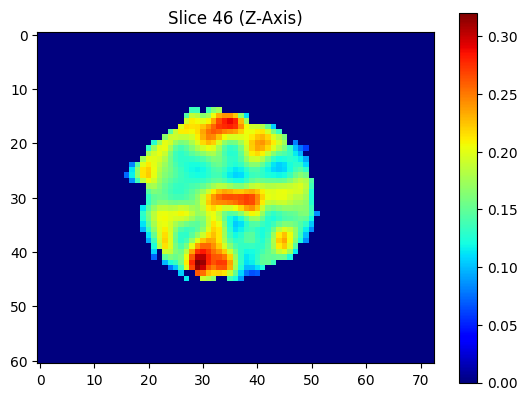

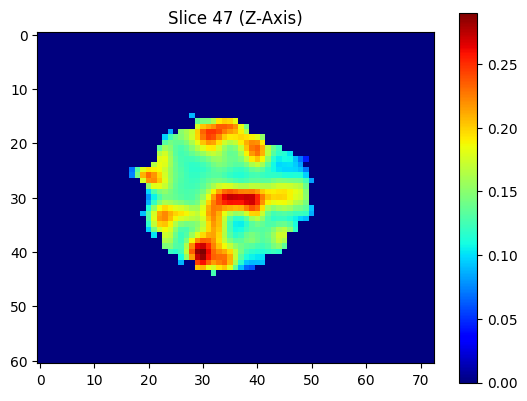

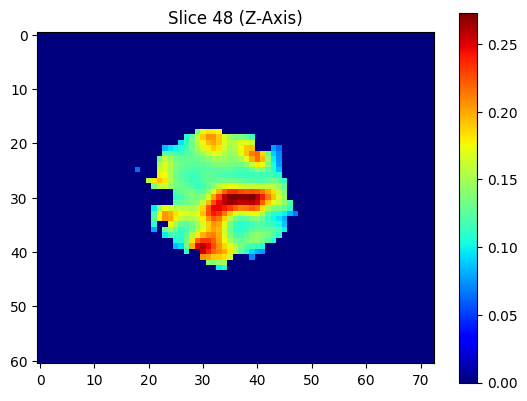

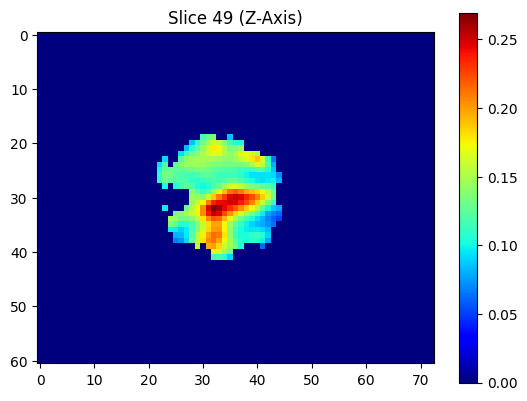

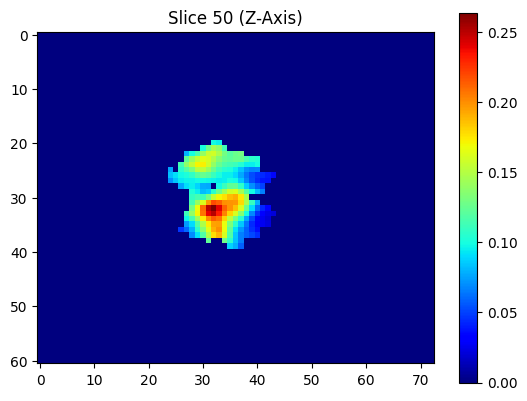

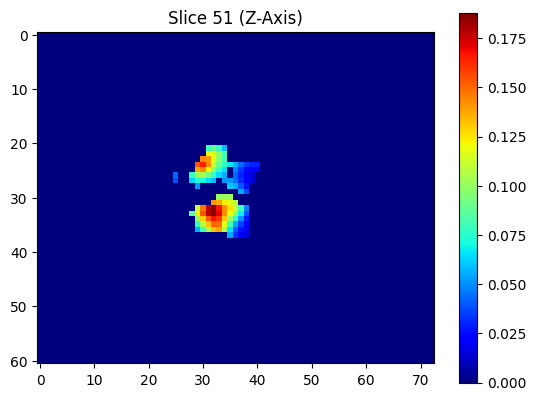

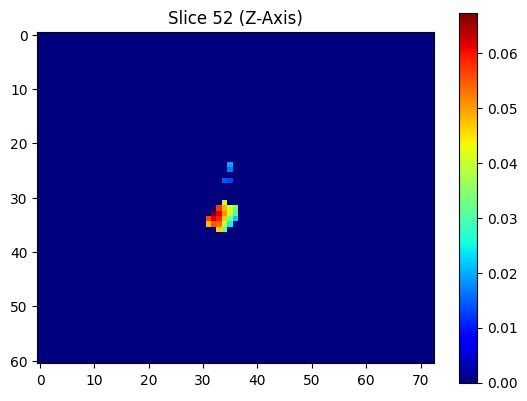

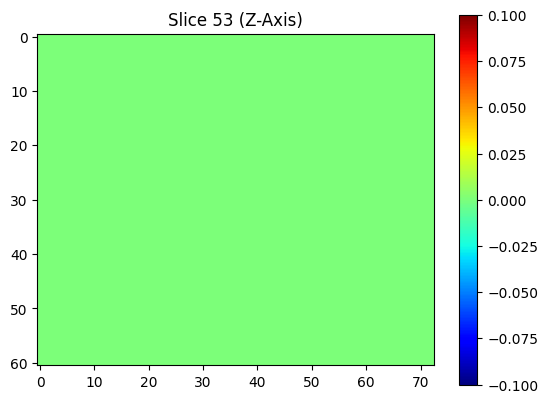

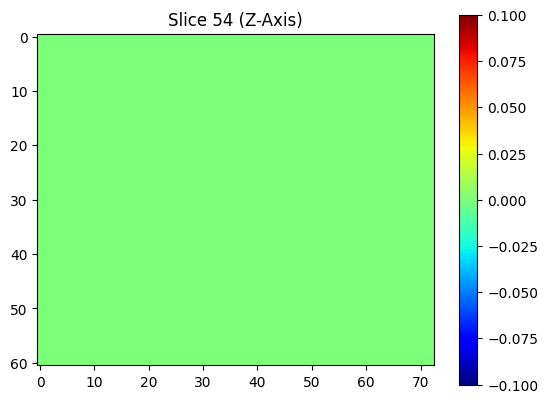

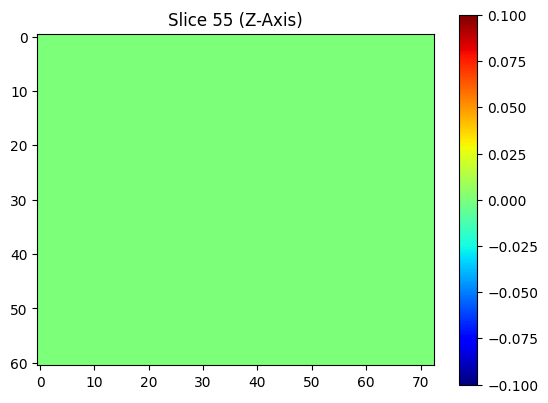

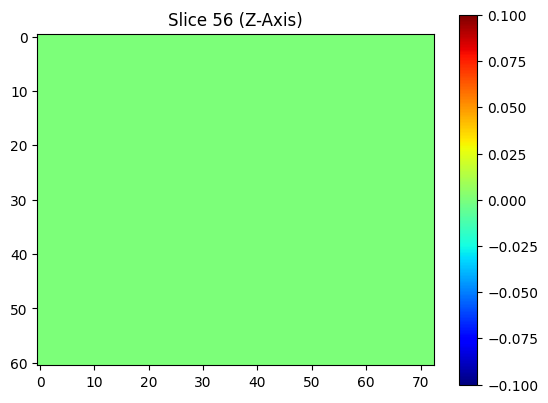

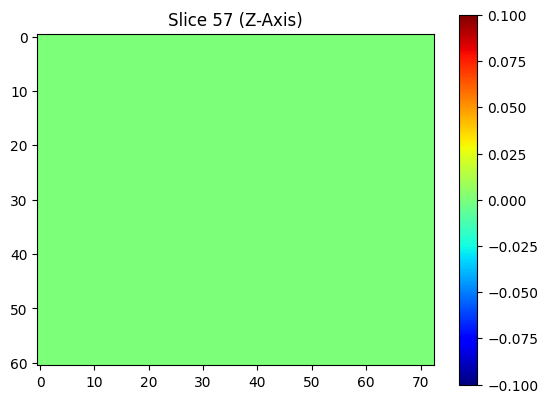

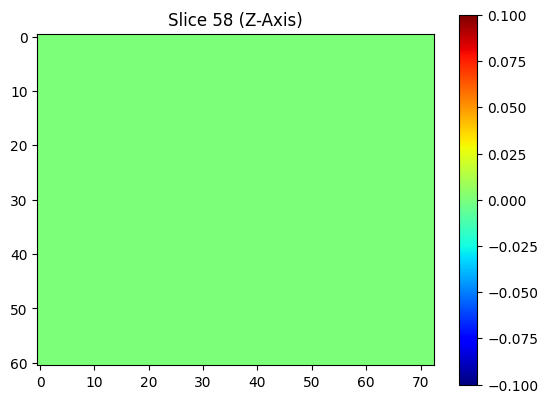

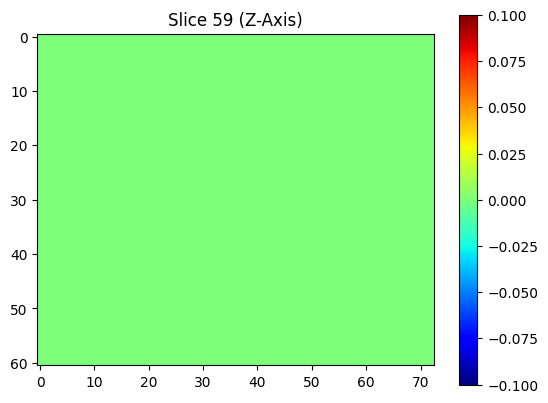

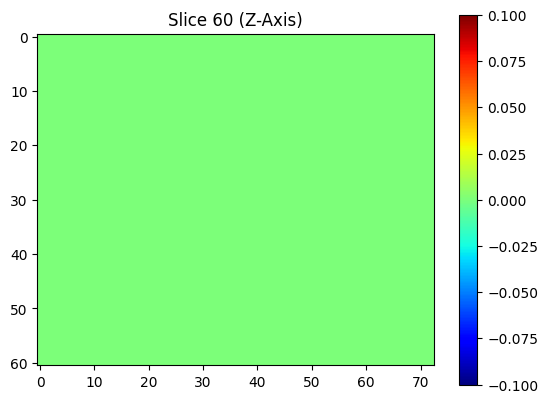

IndexError: ignored

In [ ]:
#A look inside the fMRI data
z = 256  # Z-Axis

for z_axis_index in range(z):
    test_slice = test1[:, :, z_axis_index]
    plt.imshow(test_slice, cmap='jet')  # Display a specific slice from the z-axis
    plt.title('Slice {} (Z-Axis)'.format(z_axis_index))
    plt.colorbar()
    plt.show()



## Exploring Different Pipelines

In [ ]:
#!python download_abide_preproc.py -d degree_binarize -p cpac -s filt_noglobal -o ./

In [ ]:
#!python download_abide_preproc.py -d degree_weighted -p cpac -s filt_noglobal -o ./

In [ ]:
#!python download_abide_preproc.py -d eigenvector_binarize -p cpac -s filt_noglobal -o ./

In [ ]:
#!python download_abide_preproc.py -d eigenvector_weighted -p cpac -s filt_noglobal -o ./

In [ ]:
#!python download_abide_preproc.py -d falff -p cpac -s filt_noglobal -o ./

In [ ]:
#!python download_abide_preproc.py -d func_mask -p cpac -s filt_noglobal -o ./

In [ ]:
#!python download_abide_preproc.py -d func_mean -p cpac -s filt_noglobal -o ./

In [ ]:
#!python download_abide_preproc.py -d lfcd -p cpac -s filt_noglobal -o ./

In [ ]:
#!python download_abide_preproc.py -d reho -p cpac -s filt_noglobal -o /.

In [ ]:
#!python download_abide_preproc.py -d vmhc -p cpac -s filt_noglobal -o ./

In [ ]:
!ls ..

In [ ]:
test1 = nib.load('/content/Outputs/cpac/filt_noglobal/func_mask/OHSU_0050152_func_mask.nii.gz').get_fdata()
test1.shape


(61, 73, 61)

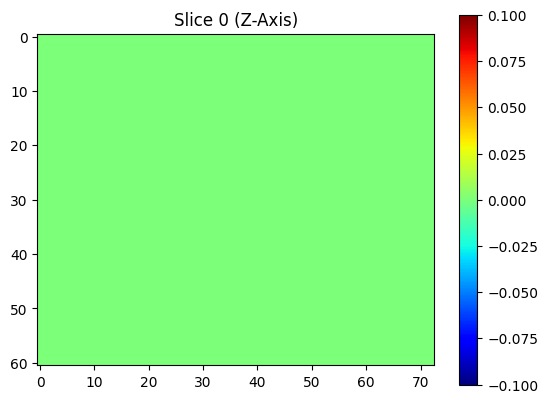

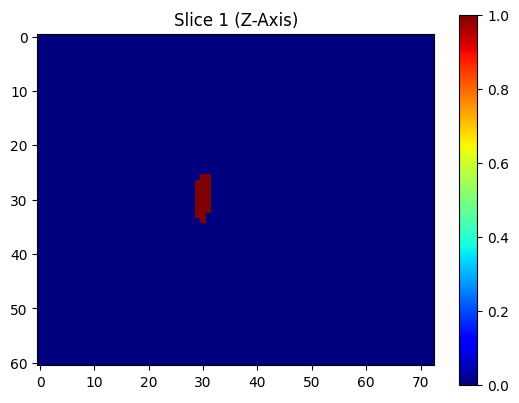

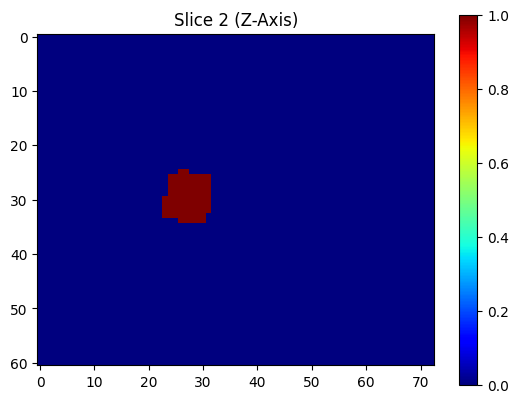

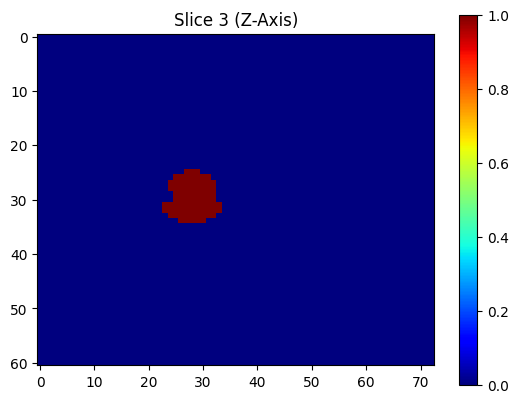

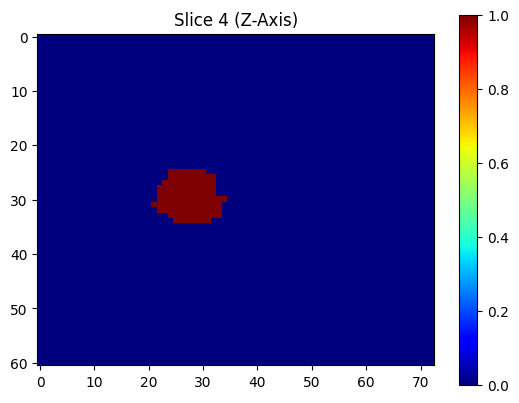

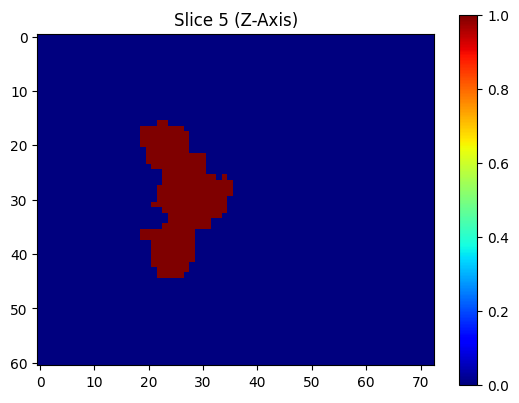

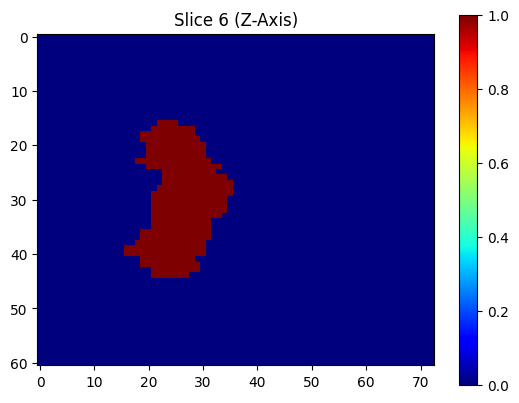

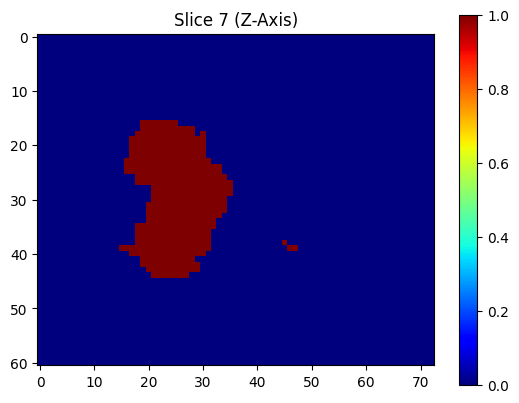

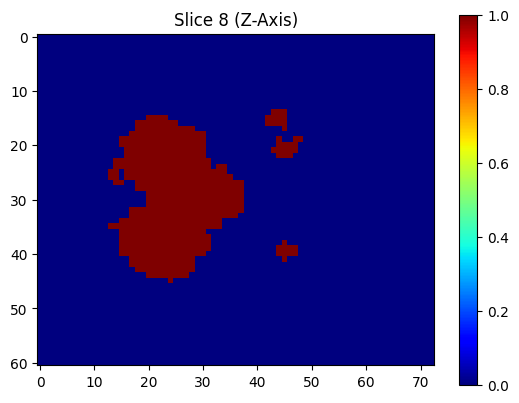

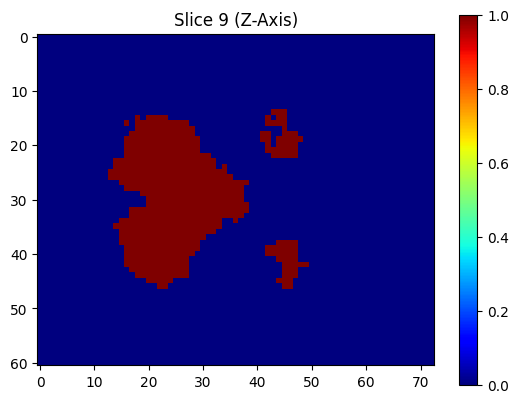

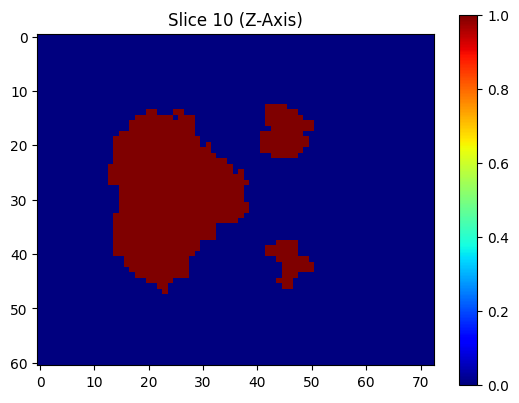

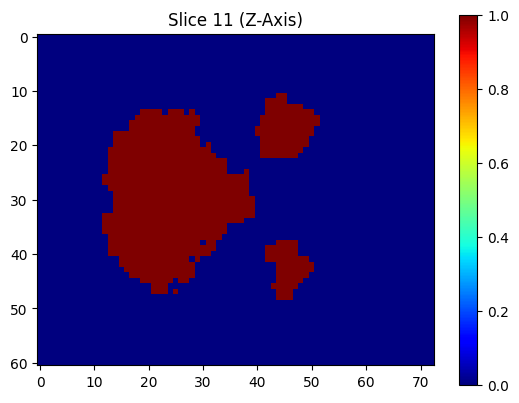

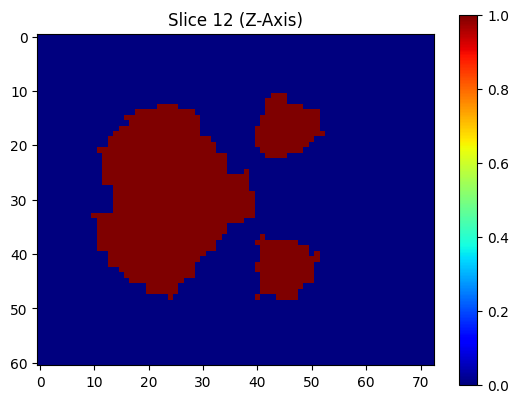

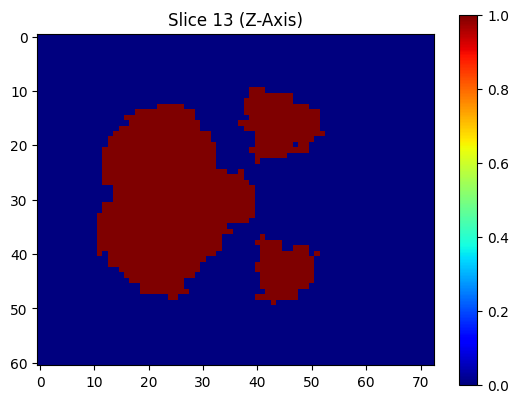

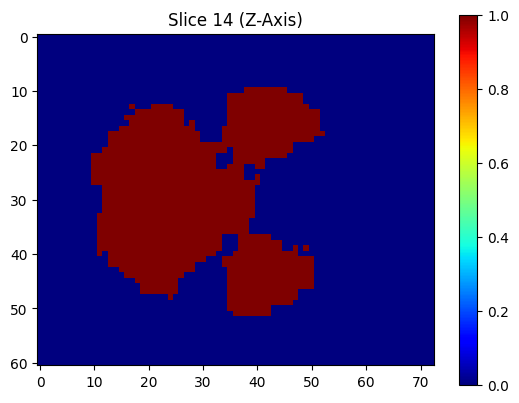

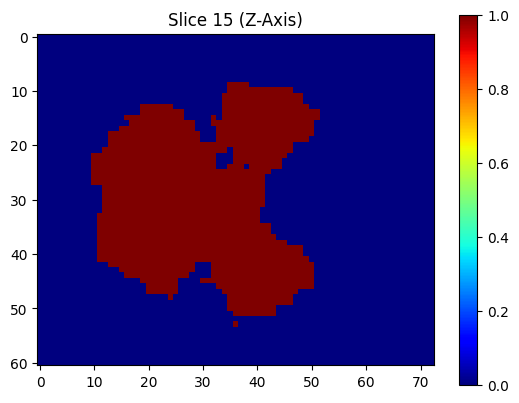

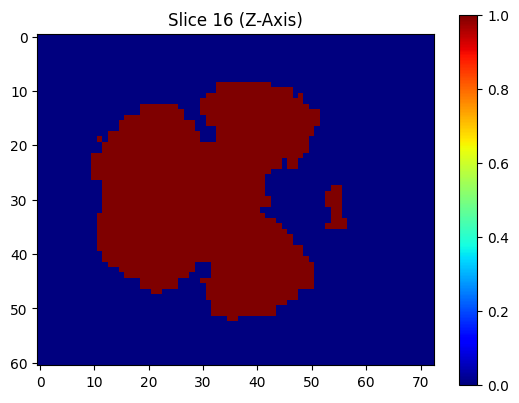

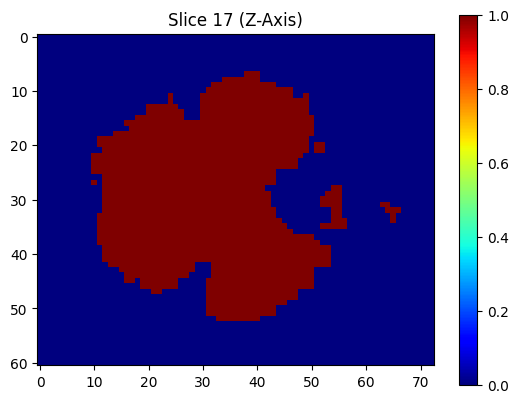

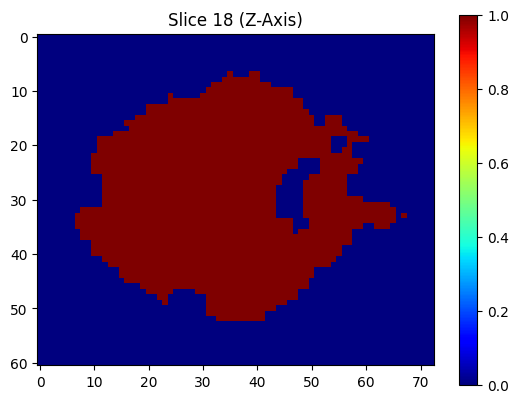

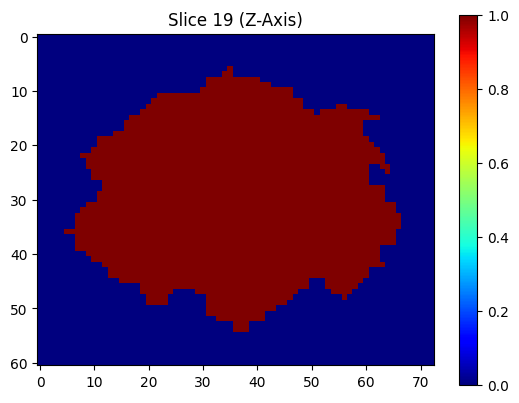

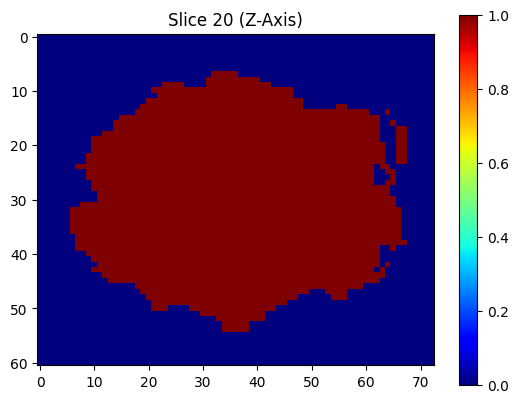

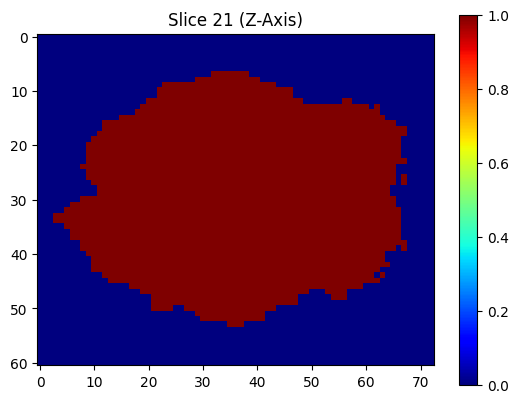

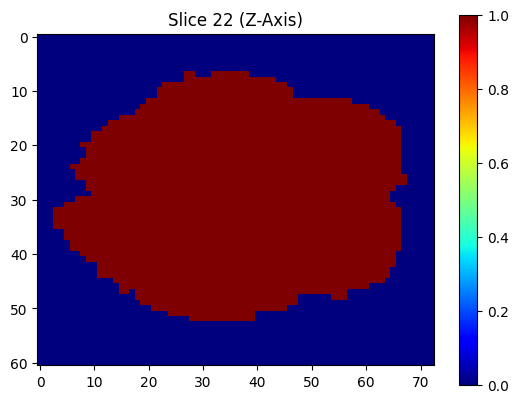

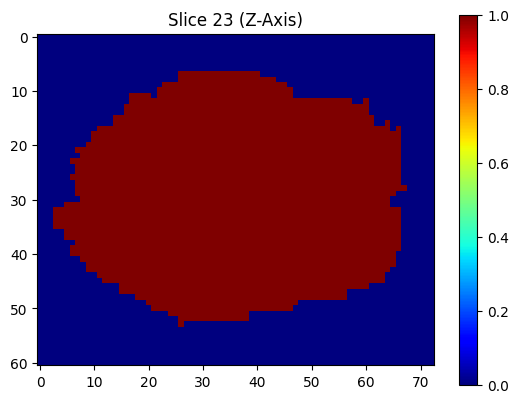

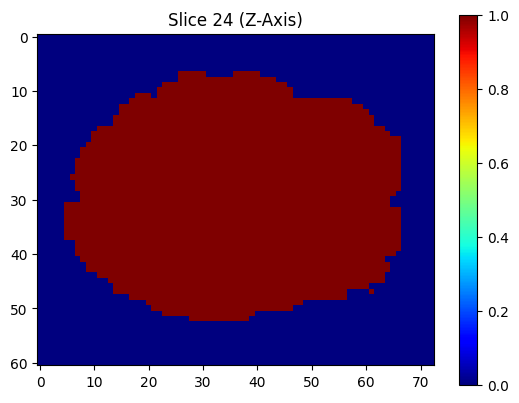

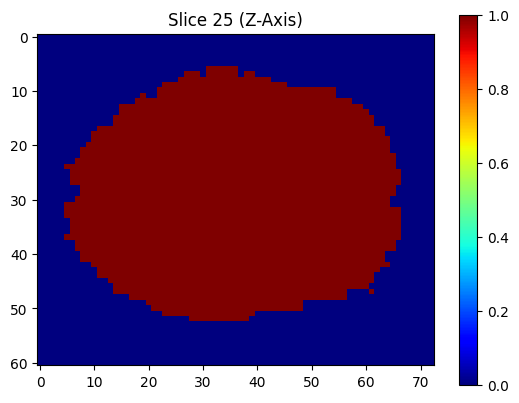

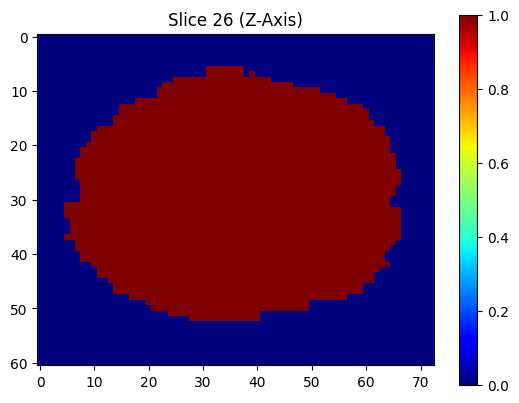

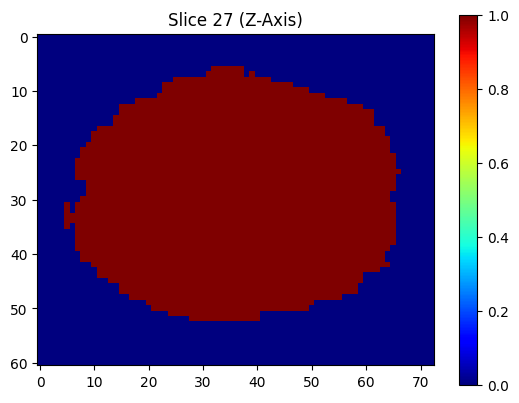

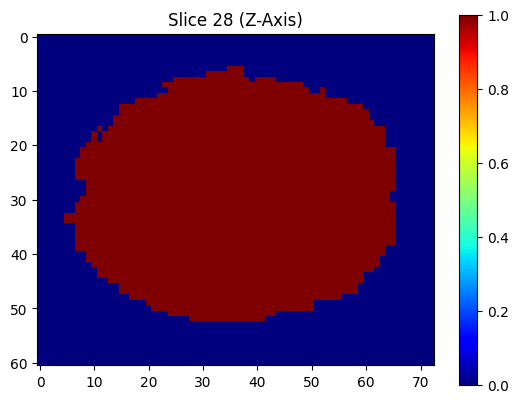

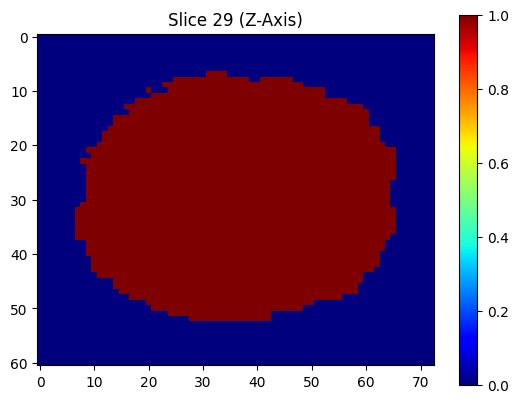

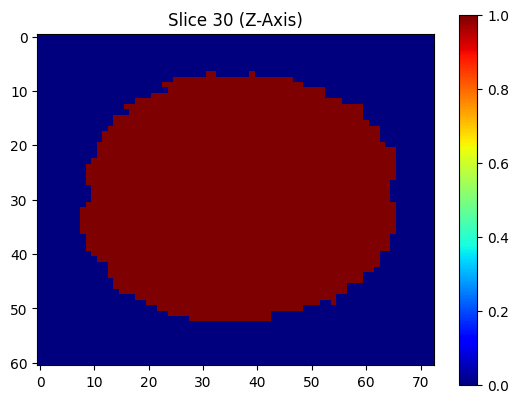

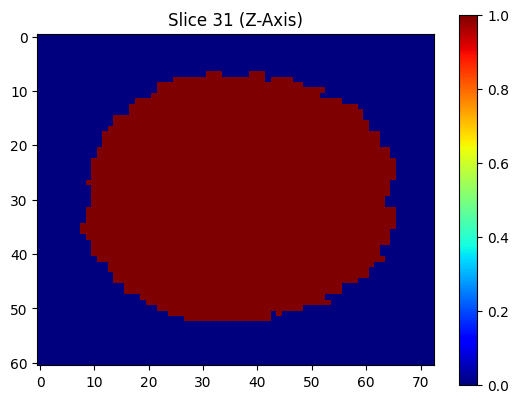

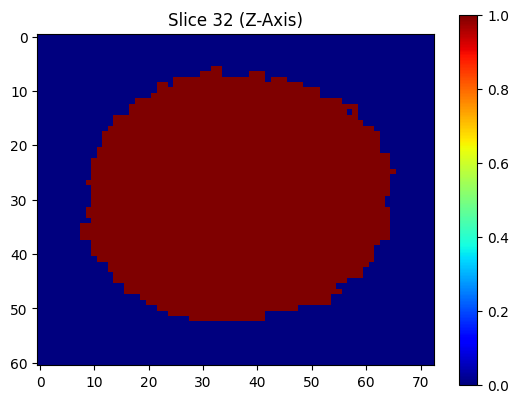

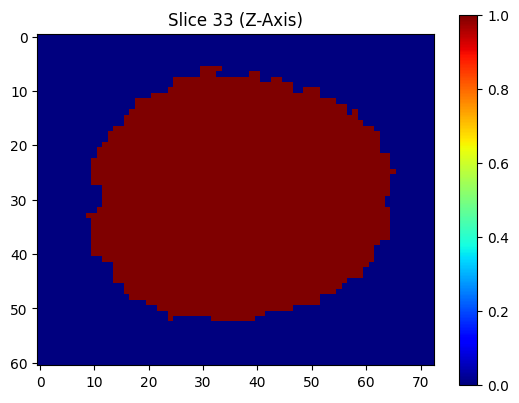

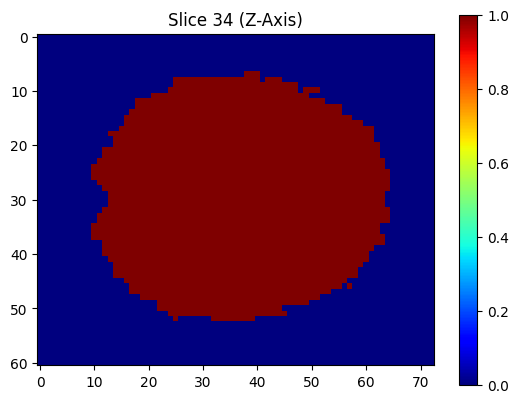

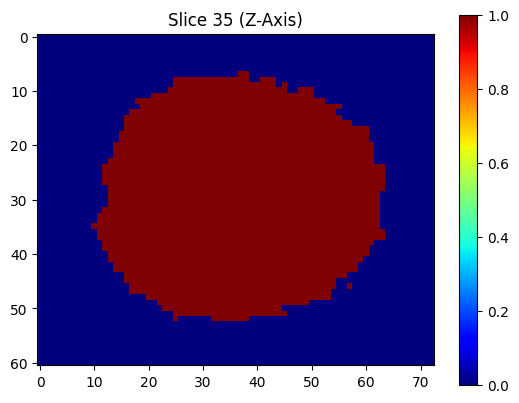

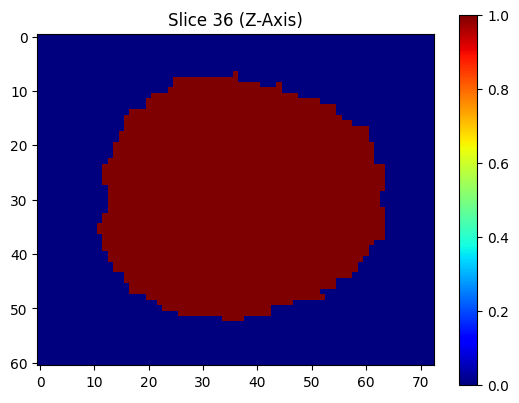

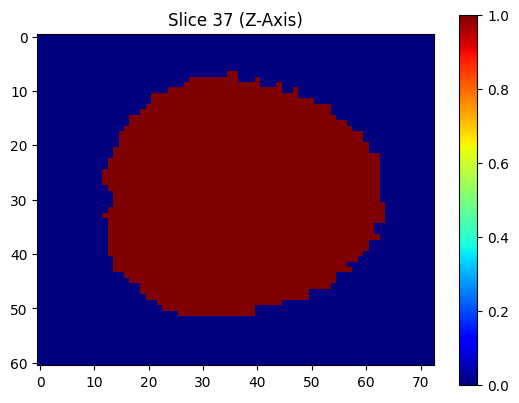

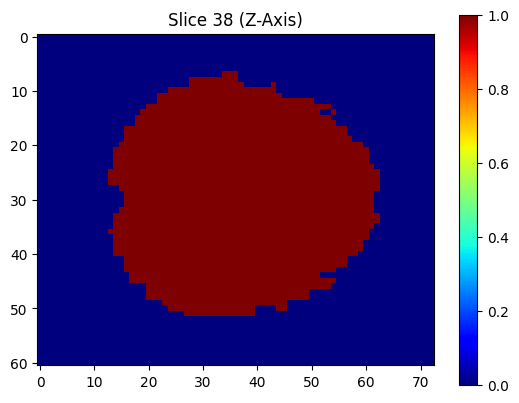

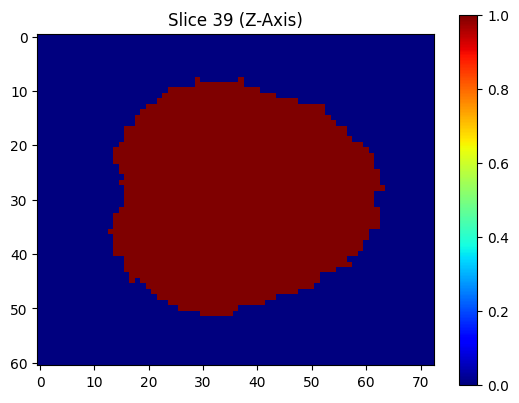

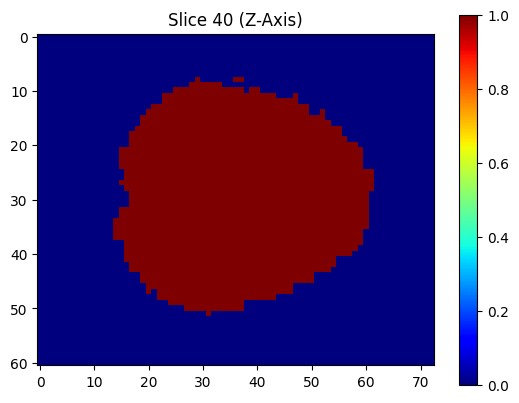

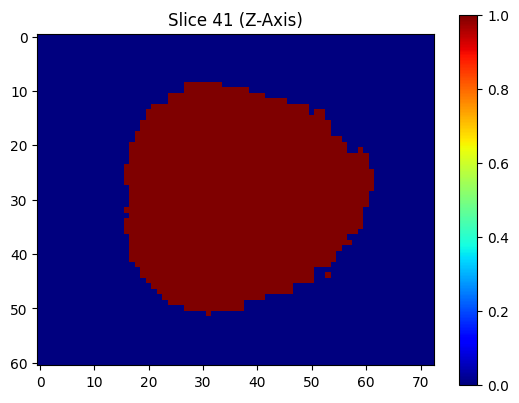

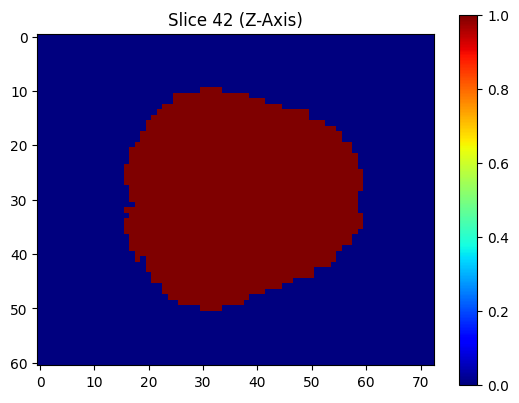

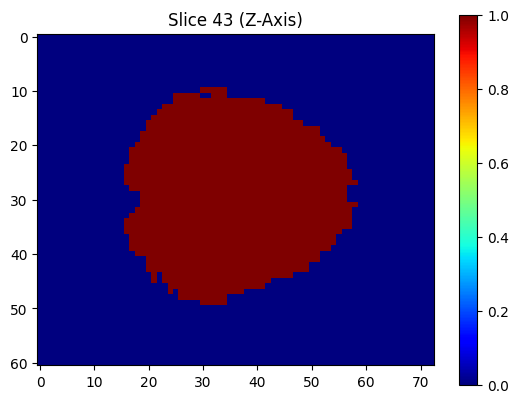

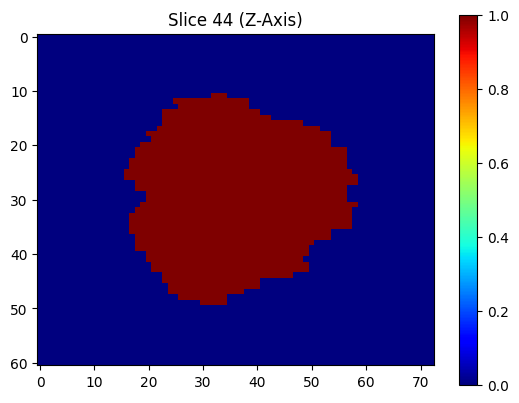

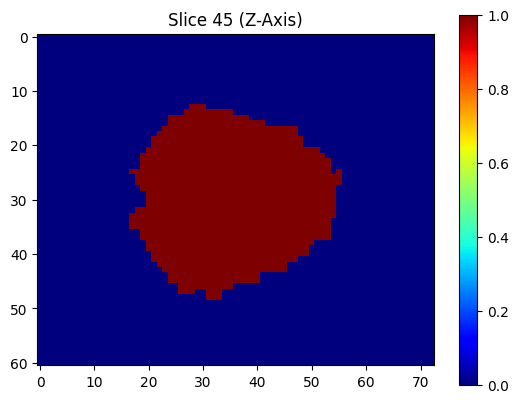

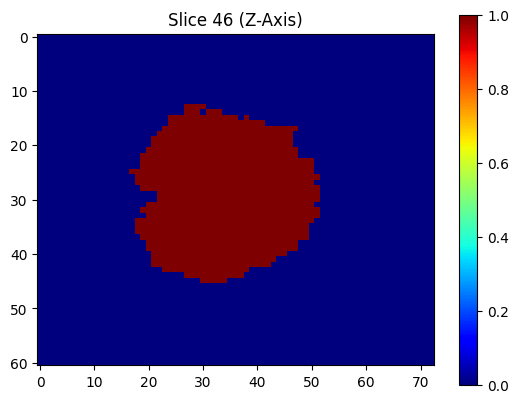

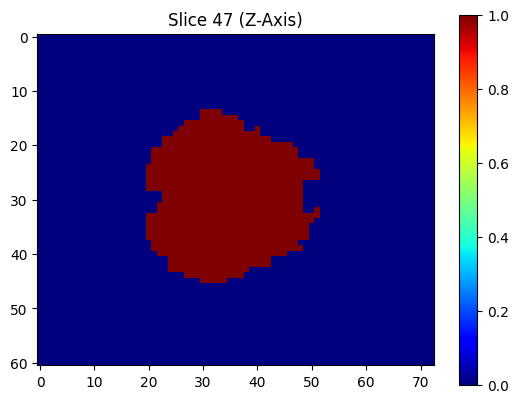

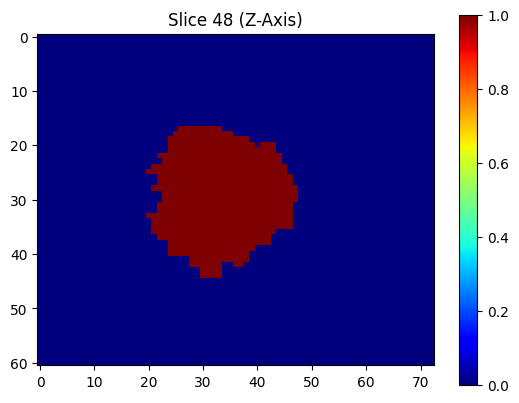

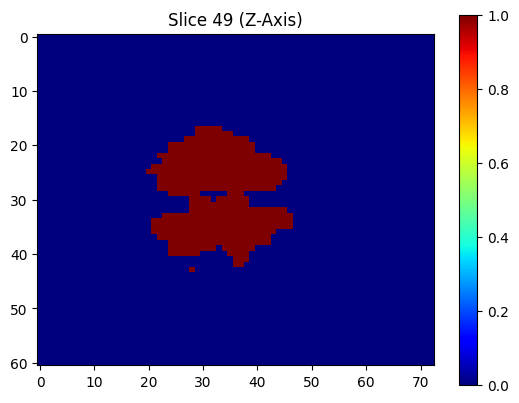

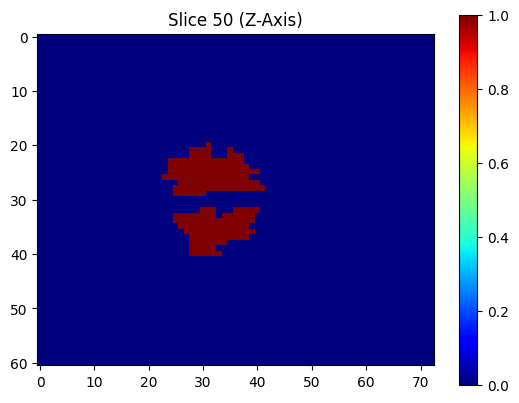

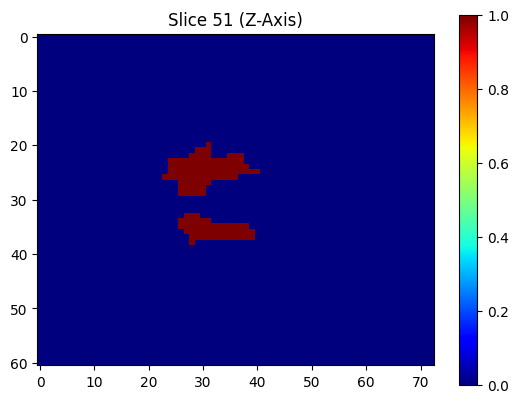

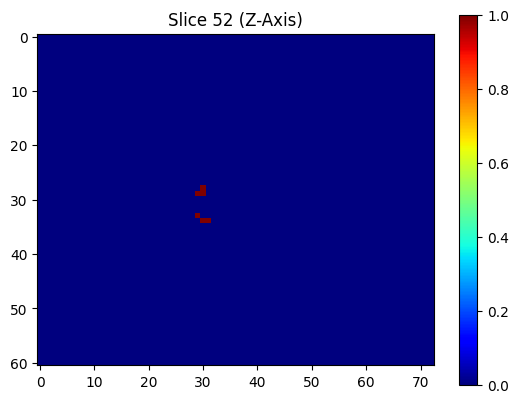

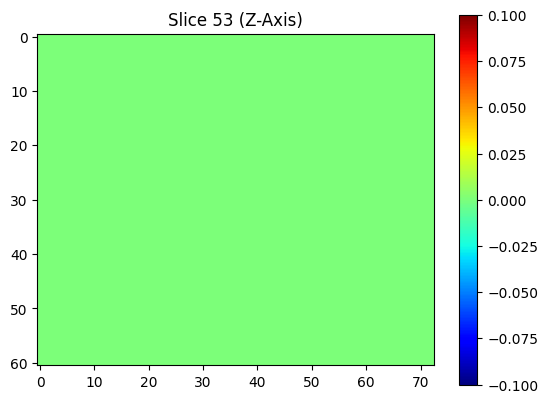

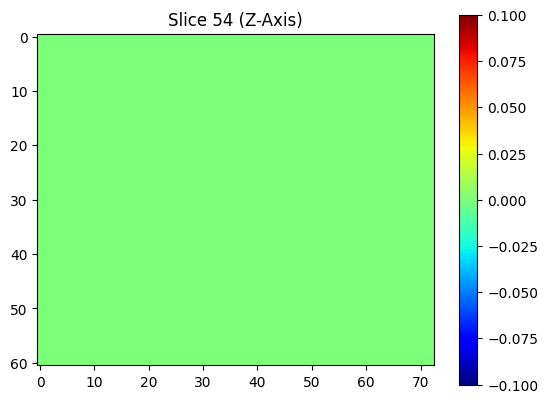

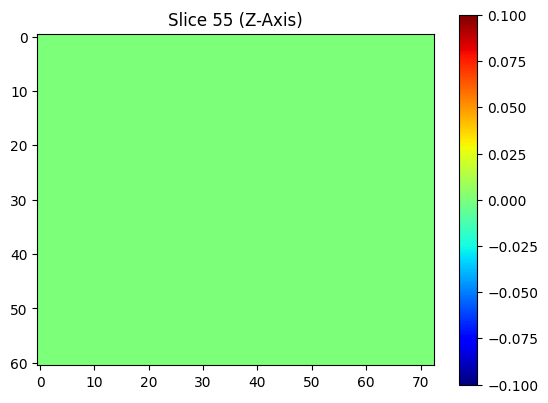

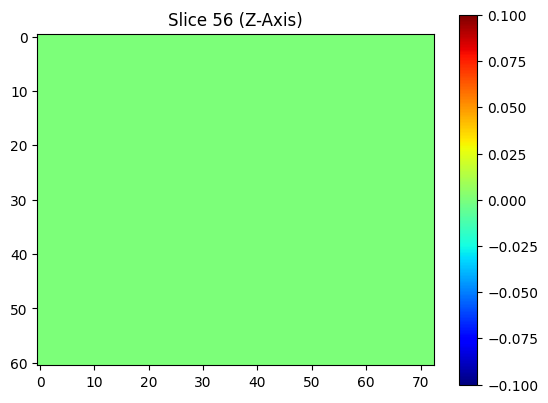

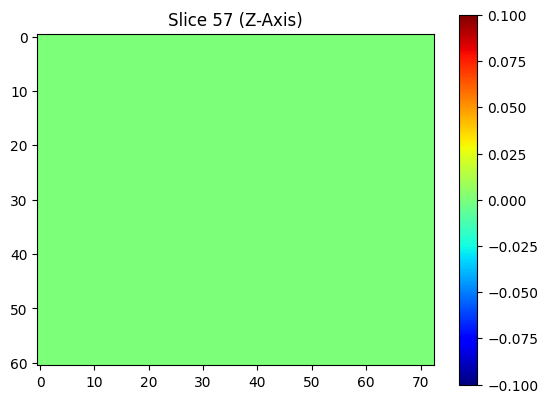

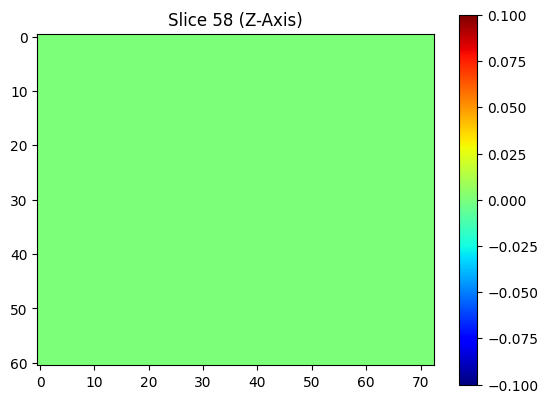

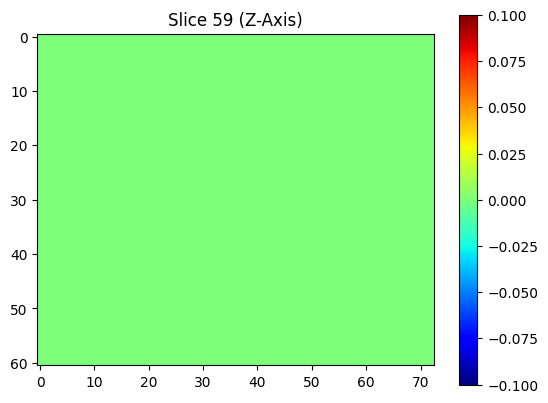

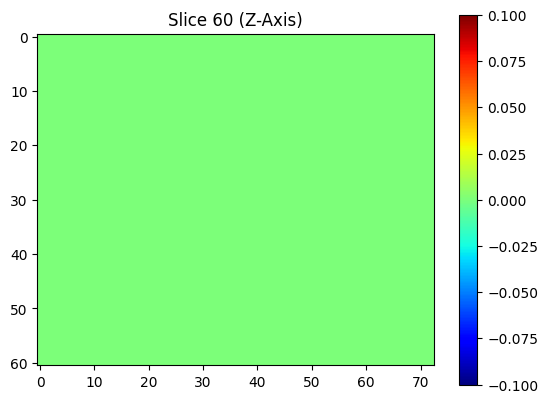

IndexError: ignored

In [ ]:
#A look inside the fMRI data
z = 256  # Z-Axis

for z_axis_index in range(z):
    test_slice = test1[:, :, z_axis_index]
    plt.imshow(test_slice, cmap='jet')  # Display a specific slice from the z-axis
    plt.title('Slice {} (Z-Axis)'.format(z_axis_index))
    plt.colorbar()
    plt.show()



In [ ]:
#Loading fMRI data
test_load = nib.load('/content/Outputs/cpac/filt_noglobal/func_preproc/Pitt_0050011_func_preproc.nii.gz').get_fdata()
test_load.shape


In [ ]:
#A look inside the fMRI data
time_frame_index = 30  # Time frame index. Should be within the range of our data (0 to 179)

test_frame = test_load[:, :, :, time_frame_index]
for z_axis_index in range(60):
    plt.imshow(test_frame[:, :, z_axis_index], cmap='jet')  # Display a specific slice (e.g., at index 16) from the time frame
    plt.title('Time Frame {}'.format(time_frame_index))
    plt.colorbar()
    plt.show()


In [ ]:
import matplotlib.animation as animation

# Define the figure and axis objects
fig, ax = plt.subplots()
cax = ax.imshow(test_load[:, :, 16, 0], cmap='jet')  # Display a specific slice (e.g., at index 16) from the initial frame
plt.title('fMRI Data over Time')
plt.colorbar(cax)

# Update function for animation
def update_frame(i):
    cax.set_array(test_load[:, :, 16, i])  # Update the data for each frame and specific slice
    plt.title('fMRI Data over Time (Frame {})'.format(i))

# Create the animation
ani = animation.FuncAnimation(fig, update_frame, frames=test_load.shape[3], interval=200)

# Set up the writer for saving the animation
Writer = animation.writers['ffmpeg']
writer = Writer(fps=10, metadata=dict(artist='Me'), bitrate=1800)

# Save the animation as an MP4 video
ani.save('fmri_animation.mp4', writer=writer)

plt.show()


# Working with the AAL Brain Atlas Time Series Derivative

In [65]:
#rois_aal
#ASD
!python download_abide_preproc.py -a -d rois_aal -p dparsf -s filt_noglobal -o ./ASD

No upper age threshold specified
No lower age threshold specified
No site specified, using all sites...
No sex specified, using all sexes...
Could not find d:\MSc Data Science PSUT\RA-Project\Code\AAL\ASD, creating now...
b',Unnamed: 0,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,PIQ,FIQ_TEST_TYPE,VIQ_TEST_TYPE,PIQ_TEST_TYPE,ADI_R_SOCIAL_TOTAL_A,ADI_R_VERBAL_TOTAL_BV,ADI_RRB_TOTAL_C,ADI_R_ONSET_TOTAL_D,ADI_R_RSRCH_RELIABLE,ADOS_MODULE,ADOS_TOTAL,ADOS_COMM,ADOS_SOCIAL,ADOS_STEREO_BEHAV,ADOS_RSRCH_RELIABLE,ADOS_GOTHAM_SOCAFFECT,ADOS_GOTHAM_RRB,ADOS_GOTHAM_TOTAL,ADOS_GOTHAM_SEVERITY,SRS_VERSION,SRS_RAW_TOTAL,SRS_AWARENESS,SRS_COGNITION,SRS_COMMUNICATION,SRS_MOTIVATION,SRS_MANNERISMS,SCQ_TOTAL,AQ_TOTAL,COMORBIDITY,CURRENT_MED_STATUS,MEDICATION_NAME,OFF_STIMULANTS_AT_SCAN,VINELAND_RECEPTIVE_V_SCALED,VINELAND_EXPRESSIVE_V_SCALED,VINELAND_WRITTEN_V_SCALED,VINELAND_COMMUNICATION_STANDARD,VINELAND_PERSONAL_V_SCALED,VINELAND_DO

In [66]:
#rois_aal
#TDC
!python download_abide_preproc.py -c -d rois_aal -p dparsf -s filt_noglobal -o ./TDC

Adding https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/dparsf/filt_noglobal/rois_aal/Stanford_0051179_rois_aal.1D to download queue...
Adding https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/dparsf/filt_noglobal/rois_aal/UCLA_1_0051205_rois_aal.1D to download queue...
Adding https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/dparsf/filt_noglobal/rois_aal/UCLA_1_0051206_rois_aal.1D to download queue...
Adding https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/dparsf/filt_noglobal/rois_aal/UCLA_1_0051208_rois_aal.1D to download queue...
Adding https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/dparsf/filt_noglobal/rois_aal/UCLA_1_0051210_rois_aal.1D to download queue...
Adding https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/dparsf/filt_noglobal/rois_aal/UCLA_1_0051211_rois_aal.1D to download queue...
Adding https://s3.amazonaws.com/fcp-indi/data/Proj

In [1]:
2#rois_aal complete
!python download_abide_preproc.py -d rois_aal -p dparsf -s filt_noglobal -o ./

No upper age threshold specified
No lower age threshold specified
No site specified, using all sites...
No sex specified, using all sexes...
b',Unnamed: 0,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,PIQ,FIQ_TEST_TYPE,VIQ_TEST_TYPE,PIQ_TEST_TYPE,ADI_R_SOCIAL_TOTAL_A,ADI_R_VERBAL_TOTAL_BV,ADI_RRB_TOTAL_C,ADI_R_ONSET_TOTAL_D,ADI_R_RSRCH_RELIABLE,ADOS_MODULE,ADOS_TOTAL,ADOS_COMM,ADOS_SOCIAL,ADOS_STEREO_BEHAV,ADOS_RSRCH_RELIABLE,ADOS_GOTHAM_SOCAFFECT,ADOS_GOTHAM_RRB,ADOS_GOTHAM_TOTAL,ADOS_GOTHAM_SEVERITY,SRS_VERSION,SRS_RAW_TOTAL,SRS_AWARENESS,SRS_COGNITION,SRS_COMMUNICATION,SRS_MOTIVATION,SRS_MANNERISMS,SCQ_TOTAL,AQ_TOTAL,COMORBIDITY,CURRENT_MED_STATUS,MEDICATION_NAME,OFF_STIMULANTS_AT_SCAN,VINELAND_RECEPTIVE_V_SCALED,VINELAND_EXPRESSIVE_V_SCALED,VINELAND_WRITTEN_V_SCALED,VINELAND_COMMUNICATION_STANDARD,VINELAND_PERSONAL_V_SCALED,VINELAND_DOMESTIC_V_SCALED,VINELAND_COMMUNITY_V_SCALED,VINELAND_DAILYLVNG_STANDARD,VINELAND_

In [2]:
#!mkdir ./Data
#!mv ASD ./Data/ASD
#!mv TDC ./Data/TDC

In [3]:
#!mv /content/Outputs/dparsf/filt_noglobal/rois_aal/* ./Data

In [67]:
!ls

Adding https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/dparsf/filt_noglobal/rois_aal/UM_1_0050369_rois_aal.1D to download queue...
Adding https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/dparsf/filt_noglobal/rois_aal/UM_1_0050370_rois_aal.1D to download queue...
Adding https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/dparsf/filt_noglobal/rois_aal/UM_1_0050372_rois_aal.1D to download queue...
Adding https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/dparsf/filt_noglobal/rois_aal/UM_1_0050373_rois_aal.1D to download queue...
Adding https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/dparsf/filt_noglobal/rois_aal/UM_1_0050374_rois_aal.1D to download queue...
Adding https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/dparsf/filt_noglobal/rois_aal/UM_1_0050375_rois_aal.1D to download queue...
Adding https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Ini

'ls' is not recognized as an internal or external command,
operable program or batch file.


Retrieving: d:\MSc Data Science PSUT\RA-Project\Code\AAL\TDC\Outputs/dparsf/filt_noglobal/rois_aal/SDSU_0050209_rois_aal.1D
12.605042% percent complete
Retrieving: d:\MSc Data Science PSUT\RA-Project\Code\AAL\TDC\Outputs/dparsf/filt_noglobal/rois_aal/SDSU_0050210_rois_aal.1D
12.815126% percent complete
Retrieving: d:\MSc Data Science PSUT\RA-Project\Code\AAL\TDC\Outputs/dparsf/filt_noglobal/rois_aal/SDSU_0050211_rois_aal.1D
13.025210% percent complete
Retrieving: d:\MSc Data Science PSUT\RA-Project\Code\AAL\TDC\Outputs/dparsf/filt_noglobal/rois_aal/SDSU_0050213_rois_aal.1D
13.235294% percent complete
Retrieving: d:\MSc Data Science PSUT\RA-Project\Code\AAL\TDC\Outputs/dparsf/filt_noglobal/rois_aal/SDSU_0050214_rois_aal.1D
13.445378% percent complete
Retrieving: d:\MSc Data Science PSUT\RA-Project\Code\AAL\TDC\Outputs/dparsf/filt_noglobal/rois_aal/SDSU_0050215_rois_aal.1D
13.655462% percent complete
Retrieving: d:\MSc Data Science PSUT\RA-Project\Code\AAL\TDC\Outputs/dparsf/filt_nogloba

In [68]:
!mkdir ./ASD
!mkdir ./TDC

#ASD patients path
!mv ./ASD/Outputs/dparsf/filt_noglobal/rois_aal/* ./ASD
ASD_Path='./ASD/'

#TDC controls path
!mv ./TDC/Outputs/dparsf/filt_noglobal/rois_aal/* ./TDC
TDC_Path='./TDC/'

26.050420% percent complete
Retrieving: d:\MSc Data Science PSUT\RA-Project\Code\AAL\TDC\Outputs/dparsf/filt_noglobal/rois_aal/UM_1_0050379_rois_aal.1D
26.260504% percent complete
Retrieving: d:\MSc Data Science PSUT\RA-Project\Code\AAL\TDC\Outputs/dparsf/filt_noglobal/rois_aal/UM_2_0050382_rois_aal.1D
26.470588% percent complete
Retrieving: d:\MSc Data Science PSUT\RA-Project\Code\AAL\TDC\Outputs/dparsf/filt_noglobal/rois_aal/UM_2_0050385_rois_aal.1D
26.680672% percent complete
Retrieving: d:\MSc Data Science PSUT\RA-Project\Code\AAL\TDC\Outputs/dparsf/filt_noglobal/rois_aal/UM_2_0050386_rois_aal.1D
26.890756% percent complete
Retrieving: d:\MSc Data Science PSUT\RA-Project\Code\AAL\TDC\Outputs/dparsf/filt_noglobal/rois_aal/UM_2_0050387_rois_aal.1D
27.100840% percent complete
Retrieving: d:\MSc Data Science PSUT\RA-Project\Code\AAL\TDC\Outputs/dparsf/filt_noglobal/rois_aal/UM_2_0050388_rois_aal.1D
27.310924% percent complete
Retrieving: d:\MSc Data Science PSUT\RA-Project\Code\AAL\TDC

The syntax of the command is incorrect.


Retrieving: d:\MSc Data Science PSUT\RA-Project\Code\AAL\TDC\Outputs/dparsf/filt_noglobal/rois_aal/NYU_0051111_rois_aal.1D
68.907563% percent complete
Retrieving: d:\MSc Data Science PSUT\RA-Project\Code\AAL\TDC\Outputs/dparsf/filt_noglobal/rois_aal/NYU_0051112_rois_aal.1D
69.117647% percent complete
Retrieving: d:\MSc Data Science PSUT\RA-Project\Code\AAL\TDC\Outputs/dparsf/filt_noglobal/rois_aal/NYU_0051113_rois_aal.1D
69.327731% percent complete
Retrieving: d:\MSc Data Science PSUT\RA-Project\Code\AAL\TDC\Outputs/dparsf/filt_noglobal/rois_aal/NYU_0051114_rois_aal.1D
69.537815% percent complete
Retrieving: d:\MSc Data Science PSUT\RA-Project\Code\AAL\TDC\Outputs/dparsf/filt_noglobal/rois_aal/NYU_0051116_rois_aal.1D
69.747899% percent complete
Retrieving: d:\MSc Data Science PSUT\RA-Project\Code\AAL\TDC\Outputs/dparsf/filt_noglobal/rois_aal/NYU_0051117_rois_aal.1D
69.957983% percent complete
Retrieving: d:\MSc Data Science PSUT\RA-Project\Code\AAL\TDC\Outputs/dparsf/filt_noglobal/rois

The syntax of the command is incorrect.



88.025210% percent complete
Retrieving: d:\MSc Data Science PSUT\RA-Project\Code\AAL\TDC\Outputs/dparsf/filt_noglobal/rois_aal/UCLA_2_0051314_rois_aal.1D
88.235294% percent complete
Retrieving: d:\MSc Data Science PSUT\RA-Project\Code\AAL\TDC\Outputs/dparsf/filt_noglobal/rois_aal/UCLA_2_0051315_rois_aal.1D
88.445378% percent complete
Retrieving: d:\MSc Data Science PSUT\RA-Project\Code\AAL\TDC\Outputs/dparsf/filt_noglobal/rois_aal/UCLA_2_0051316_rois_aal.1D
88.655462% percent complete
Retrieving: d:\MSc Data Science PSUT\RA-Project\Code\AAL\TDC\Outputs/dparsf/filt_noglobal/rois_aal/MaxMun_c_0051332_rois_aal.1D
88.865546% percent complete
Retrieving: d:\MSc Data Science PSUT\RA-Project\Code\AAL\TDC\Outputs/dparsf/filt_noglobal/rois_aal/MaxMun_c_0051333_rois_aal.1D
89.075630% percent complete
Retrieving: d:\MSc Data Science PSUT\RA-Project\Code\AAL\TDC\Outputs/dparsf/filt_noglobal/rois_aal/MaxMun_c_0051334_rois_aal.1D
89.285714% percent complete
Retrieving: d:\MSc Data Science PSUT\RA-P

'mv' is not recognized as an internal or external command,
operable program or batch file.
'mv' is not recognized as an internal or external command,
operable program or batch file.


In [69]:
#Removing ASD leftover folders
!rm -d ./ASD/Outputs/dparsf/filt_noglobal/rois_aal
!rm -d ./ASD/Outputs/dparsf/filt_noglobal
!rm -d ./ASD/Outputs/dparsf
!rm -d ./ASD/Outputs

#Removing TDC leftover folders
!rm -d ./TDC/Outputs/dparsf/filt_noglobal/rois_aal
!rm -d ./TDC/Outputs/dparsf/filt_noglobal
!rm -d ./TDC/Outputs/dparsf
!rm -d ./TDC/Outputs

'rm' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.


In [70]:
!ls ./Data

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [14]:
import os
import shutil
import pandas as pd
# Load the spreadsheet into a DataFrame
spreadsheet_path = r'./Phenotypic_V1_0b_preprocessed.csv'  # Use a raw string to avoid escape sequences
df = pd.read_csv(spreadsheet_path)
df.head()

Unnamed: 0  SUB_ID  X  subject SITE_ID       FILE_ID  DX_GROUP  DSM_IV_TR  \
0           1   50002  1    50002    PITT   no_filename         1          1   
1           2   50003  2    50003    PITT  Pitt_0050003         1          1   
2           3   50004  3    50004    PITT  Pitt_0050004         1          1   
3           4   50005  4    50005    PITT  Pitt_0050005         1          1   
4           5   50006  5    50006    PITT  Pitt_0050006         1          1   

   AGE_AT_SCAN  SEX  ... qc_rater_1  qc_notes_rater_1  qc_anat_rater_2  \
0        16.77    1  ...       fail               NaN               OK   
1        24.45    1  ...         OK               NaN               OK   
2        19.09    1  ...         OK               NaN               OK   
3        13.73    2  ...         OK               NaN               OK   
4        13.37    1  ...         OK               NaN               OK   

   qc_anat_notes_rater_2  qc_func_rater_2   qc_func_notes_rater_2  \
0                    NaN             fail  ic-parietal-cerebellum   
1                    NaN               OK                     NaN   
2                    NaN               OK                     NaN   
3                    NaN            maybe  ic-parietal-cerebellum   
4                    NaN            maybe      ic-parietal slight   

  qc_anat_rater_3 qc_anat_notes_rater_3  qc_func_rater_3  \
0              OK                   NaN             fail   
1              OK                   NaN               OK   
2              OK                   NaN               OK   
3              OK                   NaN               OK   
4              OK                   NaN               OK   

   qc_func_notes_rater_3  
0              ERROR #24  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  

[5 rows x 104 columns]

In [1]:
#Used on local machine

# Input folder containing the files
input_folder = 'D:/MSc Data Science PSUT/RA-Project/Code/AAL/rois_aal/'  # Replace with your input folder path

# Iterate through the DataFrame and move files to class-specific folders
for index, row in df.iterrows():
    subID = str(row['SUB_ID'])  # Replace 'subID' with the actual column name
    class_label = row['DX_GROUP']  # Replace 'class' with the actual column name
    
    # Create class-specific subfolders if they don't exist
    class_folder = os.path.join(input_folder, str(class_label))
    os.makedirs(class_folder, exist_ok=True)
    
    # Find files in the input folder that contain the subID in their filenames
    matching_files = [filename for filename in os.listdir(input_folder) if subID in filename]
    
    # Move the matching files to the class-specific folder
    for filename in matching_files:
        source_path = os.path.join(input_folder, filename)
        destination_path = os.path.join(class_folder, filename)
        shutil.move(source_path, destination_path)

print("Files have been sorted into class-specific folders.")


NameError: name 'df' is not defined

In [71]:
x=!ls ./Data/ASD

In [12]:
import os

def get_files_in_directory(directory_path):
    file_list = []
    for filename in os.listdir(directory_path):
        if os.path.isfile(os.path.join(directory_path, filename)):
            file_list.append(filename)
    return file_list

directory_path0 = './ASD/'

try:
    ASD_files = get_files_in_directory(directory_path0)
    print("Files in the ASD directory:")
    print(ASD_files)
except FileNotFoundError:
    print("Directory not found.")


directory_path1 = './TDC/'

try:
    TDC_files = get_files_in_directory(directory_path1)
    print("Files in the TDC directory:")
    print(TDC_files)
except FileNotFoundError:
    print("Directory not found.")

Files in the ASD directory:
['Caltech_0051456_rois_aal.1D', 'Caltech_0051457_rois_aal.1D', 'Caltech_0051458_rois_aal.1D', 'Caltech_0051459_rois_aal.1D', 'Caltech_0051460_rois_aal.1D', 'Caltech_0051461_rois_aal.1D', 'Caltech_0051462_rois_aal.1D', 'Caltech_0051463_rois_aal.1D', 'Caltech_0051464_rois_aal.1D', 'Caltech_0051465_rois_aal.1D', 'Caltech_0051466_rois_aal.1D', 'Caltech_0051467_rois_aal.1D', 'Caltech_0051468_rois_aal.1D', 'Caltech_0051469_rois_aal.1D', 'Caltech_0051470_rois_aal.1D', 'Caltech_0051471_rois_aal.1D', 'Caltech_0051472_rois_aal.1D', 'Caltech_0051473_rois_aal.1D', 'Caltech_0051474_rois_aal.1D', 'CMU_a_0050642_rois_aal.1D', 'CMU_a_0050646_rois_aal.1D', 'CMU_a_0050647_rois_aal.1D', 'CMU_a_0050649_rois_aal.1D', 'CMU_a_0050653_rois_aal.1D', 'CMU_a_0050654_rois_aal.1D', 'CMU_b_0050643_rois_aal.1D', 'CMU_b_0050644_rois_aal.1D', 'CMU_b_0050645_rois_aal.1D', 'CMU_b_0050648_rois_aal.1D', 'CMU_b_0050650_rois_aal.1D', 'CMU_b_0050651_rois_aal.1D', 'CMU_b_0050652_rois_aal.1D', 'CMU_

In [75]:
print(len(ASD_files))
print(len(TDC_files))
print("Total number of subjects" ,len(TDC_files)+len(ASD_files))

531
571
Total number of subjects 1102


In [9]:
ls -l ./Data | grep ^- | wc -l

ls: cannot access './Data': No such file or directory
0


In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt

# Set the path to the directory containing the .1D rois_aal data
data_dir = './ASD'

# List the subjects' data files
data_files = [f for f in os.listdir(data_dir) if f.endswith('.1D')]

# Loop through each data file
for data_file in data_files:
    subject_id = data_file.split('_')[0]  # Extract subject ID from file name

    # Load the .1D rois_aal data for the current subject
    data_path = os.path.join(data_dir, data_file)
    roi_data = np.loadtxt(data_path)

    # Print some information about the loaded data
    print(f"Subject ID: {subject_id}")
    print(f"Data shape: {roi_data.shape}")

    # Example: Plot a histogram of ROI values for the first region
    region_values = roi_data[:, 0]  # Change this to the desired region index

    plt.hist(region_values, bins=20, edgecolor='black')
    plt.title(f'Histogram of ROI 1 values for Subject {subject_id}')
    plt.xlabel('ROI Value')
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
import pandas as pd

# Load the "aal_labels" CSV file
aal_labels = pd.read_csv('aal_labels.csv')

# Create a mapping dictionary from label to region
label_to_region = dict(zip(aal_labels['label'], aal_labels['region']))

# Rename the columns in the DataFrame "df" using the mapping
df.rename(columns=label_to_region, inplace=True)

# Display the modified DataFrame "df"
print(df)

# START HERE

In [2]:
import pandas as pd

file_path = r'D:/MSc Data Science PSUT/RA-Project/Code/AAL/rois_aal/1/CMU_a_0050649_rois_aal.1D'  # Replace with the actual path to the file

try:
    # Read the .1D file into a DataFrame
    df = pd.read_csv(file_path, sep='\t')

    # Drop the first row (header row) from the DataFrame
    df = df[1:]

    # Display the DataFrame
    print(df)
except FileNotFoundError:
    print(f"File not found: {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")
df.columns = df.columns.str[1:].astype(int)
df

        #2001     #2002     #2101     #2102     #2111     #2112     #2201  \
1   -0.297823 -0.584684  0.543827 -0.195304 -0.183682 -0.173864  0.232731   
2    0.143495 -0.927462  0.011687 -0.451460 -0.201972 -0.068456  0.538546   
3   -0.265651 -0.105734  0.050713  0.267565  0.789575 -0.007251  0.384605   
4   -0.246449  0.052075  0.320304 -0.457895 -0.036077 -0.516581  0.031004   
5   -0.384400 -0.759353  0.121014 -0.291511 -0.639922 -0.775318 -0.098691   
..        ...       ...       ...       ...       ...       ...       ...   
230  0.028534 -0.076168 -0.313821 -0.025305 -0.672147 -0.059135 -0.329907   
231  0.067944  0.142309 -0.143425 -0.136658 -0.291794 -0.871075  0.128999   
232  0.736650  0.588947 -0.209839 -0.506471 -1.614802 -0.476155  0.287696   
233  0.928325  1.117379 -0.456497  0.261757 -0.264272 -0.552186  0.139190   
234  0.512789  0.786756 -0.632124  0.007290 -0.275226 -0.324907 -0.360514   

        #2202     #2211     #2212  ...     #9081      #9082      #9100  \
1

2001      2002      2101      2102      2111      2112      2201  \
1   -0.297823 -0.584684  0.543827 -0.195304 -0.183682 -0.173864  0.232731   
2    0.143495 -0.927462  0.011687 -0.451460 -0.201972 -0.068456  0.538546   
3   -0.265651 -0.105734  0.050713  0.267565  0.789575 -0.007251  0.384605   
4   -0.246449  0.052075  0.320304 -0.457895 -0.036077 -0.516581  0.031004   
5   -0.384400 -0.759353  0.121014 -0.291511 -0.639922 -0.775318 -0.098691   
..        ...       ...       ...       ...       ...       ...       ...   
230  0.028534 -0.076168 -0.313821 -0.025305 -0.672147 -0.059135 -0.329907   
231  0.067944  0.142309 -0.143425 -0.136658 -0.291794 -0.871075  0.128999   
232  0.736650  0.588947 -0.209839 -0.506471 -1.614802 -0.476155  0.287696   
233  0.928325  1.117379 -0.456497  0.261757 -0.264272 -0.552186  0.139190   
234  0.512789  0.786756 -0.632124  0.007290 -0.275226 -0.324907 -0.360514   

         2202      2211      2212  ...      9081       9082       9100  \
1    0.599688  0.217481  1.657510  ... -2.854246  -4.886880   1.047668   
2    0.592894  0.784254  0.606318  ... -5.329676 -14.841831   0.799342   
3    1.249827  0.513757  0.433781  ... -4.839841 -12.936488  -1.637000   
4    0.417372  0.754469  1.394882  ... -2.650186  -7.517320   1.424407   
5    0.060918  1.138904  1.630857  ... -0.530842  -4.578404   2.704330   
..        ...       ...       ...  ...       ...        ...        ...   
230  0.290999  0.481029 -0.359000  ...  5.211866  13.752148  14.043296   
231 -0.420488  0.256003  0.515134  ... -3.709560  -0.330243  -5.174102   
232  0.047174 -0.152499 -1.148597  ... -3.293800  -7.472758   3.538745   
233  0.888076  0.306041 -0.085498  ...  4.213868  10.630190  -1.009693   
234 -0.230213  0.103369  0.534466  ...  4.710672   4.113930  -2.402506   

          9110      9120      9130      9140      9150       9160       9170  
1     2.670640 -1.321082  0.160328 -0.847910  1.154628   4.572134   4.863238  
2     5.934662  0.103163  2.090682 -0.151111  1.181914  -2.743208  -5.592928  
3    -1.123915 -1.002799 -0.442312 -0.152691 -1.584451  12.491653   1.074084  
4     0.135209  1.406299 -1.823892 -0.512332 -0.482080  -3.265065   1.457485  
5     1.197060  2.447350  1.066207  1.829156 -0.448236   8.274430  -1.696386  
..         ...       ...       ...       ...       ...        ...        ...  
230   1.326356  0.229302  2.029044  1.318695  1.824252  -1.700596  -5.288192  
231  10.113138 -0.386235  0.317658  2.330100  1.060533  26.897234  -3.336168  
232  -2.804505 -2.570872 -1.522178 -0.226280 -1.690443   0.212341   9.967443  
233  -3.949468 -4.653016 -0.359301 -1.919780 -1.088405 -13.149286   3.205712  
234  -0.252257 -0.792032 -1.522562 -0.634476 -1.232498  -2.895190 -10.456323  

[234 rows x 116 columns]

In [27]:
import numpy as np
correlation_matrix = df.corr()

# Get the lower triangle of the correlation matrix
lower_triangle = correlation_matrix.values[np.tril_indices_from(correlation_matrix, k=-1)]

# Create a new DataFrame with the lower triangle values
lower_triangle_df = pd.DataFrame({'Correlation': lower_triangle})

# Display the lower triangle DataFrame
lower_triangle_df=lower_triangle_df.transpose()
lower_triangle_df

0         1         2         3         4         5     \
Correlation  0.389855  0.077427 -0.273583  0.028724  0.167334  0.115902   

                 6         7         8       9     ...      6660      6661  \
Correlation  0.056318  0.053519  0.308229  0.1282  ...  0.215819  0.071148   

                 6662      6663      6664      6665      6666      6667  \
Correlation -0.041655 -0.397512 -0.354952  0.200891  0.066612  0.065936   

                 6668      6669  
Correlation  0.121507  0.389952  

[1 rows x 6670 columns]

In [3]:
import os
import pandas as pd
import numpy as np

# Create an empty DataFrame to store combined results
combined_results_df = pd.DataFrame()

# Folder path containing the ".1D" files
#folder_path = r'D:/MSc Data Science PSUT/RA-Project/Code/AAL/rois_aal/1'  # Replace with the actual path to the folder
folder_path = r'D:/MSc Data Science PSUT/RA-Project/Code/AAL/ASD'  # Replace with the actual path to the folder

# List of ".1D" files in the folder
file_list = [filename for filename in os.listdir(folder_path) if filename.endswith('.1D')]

for filename in file_list:
    file_path = os.path.join(folder_path, filename)

    try:
        # Read the .1D file into a DataFrame
        df = pd.read_csv(file_path, sep='\t')

        # Drop the first row (header row) from the DataFrame
        df = df[1:]

        # Rename columns and calculate correlations
        df.columns = df.columns.str[1:].astype(int)
        correlation_matrix = df.corr()

        # Get the lower triangle of the correlation matrix
        lower_triangle = correlation_matrix.values[np.tril_indices_from(correlation_matrix, k=-1)]

        # Create a DataFrame with the lower triangle values
        lower_triangle_df = pd.DataFrame({'Correlation': lower_triangle})

        # Transpose the DataFrame and add it as a new record
        lower_triangle_df = lower_triangle_df.transpose()
        combined_results_df = combined_results_df.append(lower_triangle_df, ignore_index=True)

    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred for {file_path}: {e}")

# Display the combined results DataFrame
print(combined_results_df)

C:\Users\M\AppData\Local\Temp\ipykernel_15140\355285055.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_results_df = combined_results_df.append(lower_triangle_df, ignore_index=True)
C:\Users\M\AppData\Local\Temp\ipykernel_15140\355285055.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_results_df = combined_results_df.append(lower_triangle_df, ignore_index=True)
C:\Users\M\AppData\Local\Temp\ipykernel_15140\355285055.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_results_df = combined_results_df.append(lower_triangle_df, ignore_index=True)
C:\Users\M\AppData\Local\Temp\ipykernel_15140\355285055.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pand

         0         1         2         3         4         5         6     \
0    0.457715  0.151494  0.152532 -0.009773  0.117378  0.461754 -0.001400   
1    0.308630 -0.434704  0.066984 -0.181079 -0.169339 -0.206779  0.035897   
2    0.323177  0.033346 -0.137461 -0.131129  0.201339  0.372317  0.170806   
3    0.425461 -0.043725  0.005705  0.001139  0.208989  0.261231 -0.001433   
4    0.437938  0.246597  0.138979 -0.232405 -0.046186 -0.075685  0.270532   
..        ...       ...       ...       ...       ...       ...       ...   
526  0.538952 -0.063898 -0.221267 -0.093880  0.301290  0.219224 -0.140500   
527  0.644554 -0.052505 -0.264985 -0.347358  0.030707  0.196614 -0.148433   
528  0.448495  0.208033 -0.035574 -0.292310  0.066432  0.211072 -0.060673   
529  0.540997  0.001476 -0.302465 -0.216999 -0.307709  0.148388 -0.135602   
530  0.299680  0.030909 -0.535540 -0.261669  0.001047 -0.021505 -0.021829   

         7         8         9     ...      6660      6661      6662  \
0  

C:\Users\M\AppData\Local\Temp\ipykernel_15140\355285055.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_results_df = combined_results_df.append(lower_triangle_df, ignore_index=True)
C:\Users\M\AppData\Local\Temp\ipykernel_15140\355285055.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_results_df = combined_results_df.append(lower_triangle_df, ignore_index=True)
C:\Users\M\AppData\Local\Temp\ipykernel_15140\355285055.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_results_df = combined_results_df.append(lower_triangle_df, ignore_index=True)
C:\Users\M\AppData\Local\Temp\ipykernel_15140\355285055.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pand

In [4]:
combined_results_df['label']=0
patients=combined_results_df
patients

0         1         2         3         4         5         6  \
0    0.457715  0.151494  0.152532 -0.009773  0.117378  0.461754 -0.001400   
1    0.308630 -0.434704  0.066984 -0.181079 -0.169339 -0.206779  0.035897   
2    0.323177  0.033346 -0.137461 -0.131129  0.201339  0.372317  0.170806   
3    0.425461 -0.043725  0.005705  0.001139  0.208989  0.261231 -0.001433   
4    0.437938  0.246597  0.138979 -0.232405 -0.046186 -0.075685  0.270532   
..        ...       ...       ...       ...       ...       ...       ...   
526  0.538952 -0.063898 -0.221267 -0.093880  0.301290  0.219224 -0.140500   
527  0.644554 -0.052505 -0.264985 -0.347358  0.030707  0.196614 -0.148433   
528  0.448495  0.208033 -0.035574 -0.292310  0.066432  0.211072 -0.060673   
529  0.540997  0.001476 -0.302465 -0.216999 -0.307709  0.148388 -0.135602   
530  0.299680  0.030909 -0.535540 -0.261669  0.001047 -0.021505 -0.021829   

            7         8         9  ...      6661      6662      6663  \
0   -0.202981  0.199694  0.043522  ...  0.276322  0.244609  0.242334   
1   -0.129194  0.203243 -0.233972  ...  0.204729  0.483675  0.504432   
2    0.161098  0.002253  0.057465  ...  0.002610  0.181879  0.259160   
3   -0.020359  0.314558  0.005110  ...  0.501429  0.322333  0.307977   
4    0.128576  0.269109 -0.186576  ... -0.006035  0.173515  0.149713   
..        ...       ...       ...  ...       ...       ...       ...   
526 -0.458696  0.239842 -0.149722  ...  0.119046  0.254931  0.280538   
527 -0.086089  0.102385 -0.119413  ...  0.005449 -0.032553  0.228784   
528 -0.219268  0.323167  0.143478  ... -0.067681 -0.153090  0.425236   
529 -0.187955  0.158640 -0.085317  ...  0.083878  0.188701 -0.226277   
530 -0.346205  0.486391  0.006353  ... -0.064833  0.193553  0.157224   

         6664      6665      6666      6667      6668      6669  label  
0   -0.116936  0.011473  0.179605  0.118759  0.130634  0.401448      0  
1    0.187195  0.101563  0.033967  0.377679  0.386048  0.437550      0  
2    0.189455  0.157024  0.218115  0.101601  0.367632  0.391789      0  
3    0.276828  0.417669  0.132272  0.130857  0.469707  0.863148      0  
4    0.423978 -0.056289  0.032180 -0.000423  0.132069  0.339740      0  
..        ...       ...       ...       ...       ...       ...    ...  
526  0.358909  0.142919  0.283193  0.288690  0.367170  0.298131      0  
527  0.321742 -0.006290  0.436670  0.001887  0.073302  0.011914      0  
528  0.577515  0.094528  0.293404  0.410144  0.372157  0.526537      0  
529 -0.122594 -0.102984 -0.042066 -0.016105  0.009806  0.126072      0  
530  0.271777  0.139090  0.222113  0.250995  0.172774  0.408784      0  

[531 rows x 6671 columns]

In [5]:
import os
import pandas as pd
import numpy as np

# Create an empty DataFrame to store combined results
combined_results_df_TDC = pd.DataFrame()

# Folder path containing the ".1D" files
#folder_path = r'D:/MSc Data Science PSUT/RA-Project/Code/AAL/rois_aal/2'  # Replace with the actual path to the folder
folder_path = r'D:/MSc Data Science PSUT/RA-Project/Code/AAL/TDC'  # Replace with the actual path to the folder

# List of ".1D" files in the folder
file_list = [filename for filename in os.listdir(folder_path) if filename.endswith('.1D')]

for filename in file_list:
    file_path = os.path.join(folder_path, filename)

    try:
        # Read the .1D file into a DataFrame
        df = pd.read_csv(file_path, sep='\t')

        # Drop the first row (header row) from the DataFrame
        df = df[1:]

        # Rename columns and calculate correlations
        df.columns = df.columns.str[1:].astype(int)
        correlation_matrix = df.corr()

        # Get the lower triangle of the correlation matrix
        lower_triangle = correlation_matrix.values[np.tril_indices_from(correlation_matrix, k=-1)]

        # Create a DataFrame with the lower triangle values
        lower_triangle_df = pd.DataFrame({'Correlation': lower_triangle})

        # Transpose the DataFrame and add it as a new record
        lower_triangle_df = lower_triangle_df.transpose()
        combined_results_df_TDC = combined_results_df_TDC.append(lower_triangle_df, ignore_index=True)

    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred for {file_path}: {e}")

# Display the combined results DataFrame
print(combined_results_df_TDC)

C:\Users\M\AppData\Local\Temp\ipykernel_15140\1027360514.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_results_df_TDC = combined_results_df_TDC.append(lower_triangle_df, ignore_index=True)
C:\Users\M\AppData\Local\Temp\ipykernel_15140\1027360514.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_results_df_TDC = combined_results_df_TDC.append(lower_triangle_df, ignore_index=True)
C:\Users\M\AppData\Local\Temp\ipykernel_15140\1027360514.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_results_df_TDC = combined_results_df_TDC.append(lower_triangle_df, ignore_index=True)
C:\Users\M\AppData\Local\Temp\ipykernel_15140\1027360514.py:37: FutureWarning: The frame.append method is deprecated a

         0         1         2         3         4         5         6     \
0    0.527635  0.165260 -0.136187  0.217387  0.306953 -0.020723 -0.156750   
1    0.417833  0.218700  0.308249 -0.071578  0.402504  0.301917  0.081719   
2    0.443587  0.145416  0.218764  0.305090  0.270985  0.259450  0.199343   
3    0.399441  0.182535 -0.140451 -0.025681  0.229040  0.370247  0.151827   
4    0.414771 -0.049464 -0.066535  0.034369 -0.000308  0.208178 -0.133884   
..        ...       ...       ...       ...       ...       ...       ...   
566  0.388213  0.139809 -0.032611 -0.091060 -0.062772  0.110042 -0.084035   
567  0.009930  0.187773 -0.359463 -0.562221 -0.034813  0.151292  0.102090   
568  0.568216  0.055515  0.110290 -0.324088 -0.261488  0.119470  0.081933   
569  0.414981 -0.257389 -0.292850 -0.052427 -0.193750  0.255037  0.050241   
570  0.646266  0.076636 -0.007316 -0.104528 -0.258930  0.531820 -0.290216   

         7         8         9     ...      6660      6661      6662  \
0  

C:\Users\M\AppData\Local\Temp\ipykernel_15140\1027360514.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_results_df_TDC = combined_results_df_TDC.append(lower_triangle_df, ignore_index=True)
C:\Users\M\AppData\Local\Temp\ipykernel_15140\1027360514.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_results_df_TDC = combined_results_df_TDC.append(lower_triangle_df, ignore_index=True)
C:\Users\M\AppData\Local\Temp\ipykernel_15140\1027360514.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_results_df_TDC = combined_results_df_TDC.append(lower_triangle_df, ignore_index=True)


In [6]:
combined_results_df_TDC['label']=1
controls=combined_results_df_TDC
controls

0         1         2         3         4         5         6  \
0    0.527635  0.165260 -0.136187  0.217387  0.306953 -0.020723 -0.156750   
1    0.417833  0.218700  0.308249 -0.071578  0.402504  0.301917  0.081719   
2    0.443587  0.145416  0.218764  0.305090  0.270985  0.259450  0.199343   
3    0.399441  0.182535 -0.140451 -0.025681  0.229040  0.370247  0.151827   
4    0.414771 -0.049464 -0.066535  0.034369 -0.000308  0.208178 -0.133884   
..        ...       ...       ...       ...       ...       ...       ...   
566  0.388213  0.139809 -0.032611 -0.091060 -0.062772  0.110042 -0.084035   
567  0.009930  0.187773 -0.359463 -0.562221 -0.034813  0.151292  0.102090   
568  0.568216  0.055515  0.110290 -0.324088 -0.261488  0.119470  0.081933   
569  0.414981 -0.257389 -0.292850 -0.052427 -0.193750  0.255037  0.050241   
570  0.646266  0.076636 -0.007316 -0.104528 -0.258930  0.531820 -0.290216   

            7         8         9  ...      6661      6662      6663  \
0   -0.222850  0.162031 -0.086257  ...  0.239804  0.345328  0.555301   
1    0.153270  0.209901  0.173269  ... -0.051204  0.122503  0.337154   
2    0.200740  0.151477 -0.013702  ...  0.350410  0.607810  0.553043   
3   -0.004070  0.072689 -0.120367  ...  0.225099  0.536783  0.532961   
4    0.026566  0.520839  0.116610  ... -0.115447 -0.008007  0.312031   
..        ...       ...       ...  ...       ...       ...       ...   
566 -0.099582  0.190451 -0.226164  ...  0.010588  0.078736  0.349385   
567 -0.001171  0.382199  0.138041  ...  0.048311  0.282824 -0.086415   
568  0.001085  0.203982 -0.199112  ... -0.013047 -0.131388 -0.015765   
569 -0.043645  0.137310  0.121394  ... -0.033142  0.013643  0.342046   
570 -0.211926  0.198580  0.191746  ... -0.174551  0.138775  0.309407   

         6664      6665      6666      6667      6668      6669  label  
0    0.006507  0.166161  0.031456  0.084861  0.283045  0.432264      1  
1   -0.114339 -0.065161 -0.123672 -0.058280  0.119814  0.110993      1  
2    0.110503 -0.038656 -0.040819  0.095653  0.453005  0.678851      1  
3   -0.497432  0.191822 -0.131237 -0.048364  0.718653  0.768907      1  
4    0.298270  0.018371 -0.188893  0.080056 -0.046239  0.014908      1  
..        ...       ...       ...       ...       ...       ...    ...  
566  0.031005  0.143586  0.174335  0.231306  0.150571  0.063124      1  
567 -0.220308  0.201038  0.200297  0.038624  0.174797  0.247583      1  
568  0.167906  0.191261  0.131797 -0.165737  0.072637  0.058772      1  
569  0.209519  0.060222  0.030272  0.013585  0.294144  0.029966      1  
570  0.262761  0.078909  0.029685  0.257198  0.230049  0.561662      1  

[571 rows x 6671 columns]

In [7]:
pd.concat([patients, controls])


0         1         2         3         4         5         6  \
0    0.457715  0.151494  0.152532 -0.009773  0.117378  0.461754 -0.001400   
1    0.308630 -0.434704  0.066984 -0.181079 -0.169339 -0.206779  0.035897   
2    0.323177  0.033346 -0.137461 -0.131129  0.201339  0.372317  0.170806   
3    0.425461 -0.043725  0.005705  0.001139  0.208989  0.261231 -0.001433   
4    0.437938  0.246597  0.138979 -0.232405 -0.046186 -0.075685  0.270532   
..        ...       ...       ...       ...       ...       ...       ...   
566  0.388213  0.139809 -0.032611 -0.091060 -0.062772  0.110042 -0.084035   
567  0.009930  0.187773 -0.359463 -0.562221 -0.034813  0.151292  0.102090   
568  0.568216  0.055515  0.110290 -0.324088 -0.261488  0.119470  0.081933   
569  0.414981 -0.257389 -0.292850 -0.052427 -0.193750  0.255037  0.050241   
570  0.646266  0.076636 -0.007316 -0.104528 -0.258930  0.531820 -0.290216   

            7         8         9  ...      6661      6662      6663  \
0   -0.202981  0.199694  0.043522  ...  0.276322  0.244609  0.242334   
1   -0.129194  0.203243 -0.233972  ...  0.204729  0.483675  0.504432   
2    0.161098  0.002253  0.057465  ...  0.002610  0.181879  0.259160   
3   -0.020359  0.314558  0.005110  ...  0.501429  0.322333  0.307977   
4    0.128576  0.269109 -0.186576  ... -0.006035  0.173515  0.149713   
..        ...       ...       ...  ...       ...       ...       ...   
566 -0.099582  0.190451 -0.226164  ...  0.010588  0.078736  0.349385   
567 -0.001171  0.382199  0.138041  ...  0.048311  0.282824 -0.086415   
568  0.001085  0.203982 -0.199112  ... -0.013047 -0.131388 -0.015765   
569 -0.043645  0.137310  0.121394  ... -0.033142  0.013643  0.342046   
570 -0.211926  0.198580  0.191746  ... -0.174551  0.138775  0.309407   

         6664      6665      6666      6667      6668      6669  label  
0   -0.116936  0.011473  0.179605  0.118759  0.130634  0.401448      0  
1    0.187195  0.101563  0.033967  0.377679  0.386048  0.437550      0  
2    0.189455  0.157024  0.218115  0.101601  0.367632  0.391789      0  
3    0.276828  0.417669  0.132272  0.130857  0.469707  0.863148      0  
4    0.423978 -0.056289  0.032180 -0.000423  0.132069  0.339740      0  
..        ...       ...       ...       ...       ...       ...    ...  
566  0.031005  0.143586  0.174335  0.231306  0.150571  0.063124      1  
567 -0.220308  0.201038  0.200297  0.038624  0.174797  0.247583      1  
568  0.167906  0.191261  0.131797 -0.165737  0.072637  0.058772      1  
569  0.209519  0.060222  0.030272  0.013585  0.294144  0.029966      1  
570  0.262761  0.078909  0.029685  0.257198  0.230049  0.561662      1  

[1102 rows x 6671 columns]

In [8]:
DF=pd.concat([patients, controls])
DF.reset_index(drop=True,inplace=True)

In [9]:
DF.dropna(inplace=True)
DF.reset_index(drop=True,inplace=True)
DF

0         1         2         3         4         5         6  \
0     0.457715  0.151494  0.152532 -0.009773  0.117378  0.461754 -0.001400   
1     0.308630 -0.434704  0.066984 -0.181079 -0.169339 -0.206779  0.035897   
2     0.323177  0.033346 -0.137461 -0.131129  0.201339  0.372317  0.170806   
3     0.425461 -0.043725  0.005705  0.001139  0.208989  0.261231 -0.001433   
4     0.437938  0.246597  0.138979 -0.232405 -0.046186 -0.075685  0.270532   
...        ...       ...       ...       ...       ...       ...       ...   
1050  0.388213  0.139809 -0.032611 -0.091060 -0.062772  0.110042 -0.084035   
1051  0.009930  0.187773 -0.359463 -0.562221 -0.034813  0.151292  0.102090   
1052  0.568216  0.055515  0.110290 -0.324088 -0.261488  0.119470  0.081933   
1053  0.414981 -0.257389 -0.292850 -0.052427 -0.193750  0.255037  0.050241   
1054  0.646266  0.076636 -0.007316 -0.104528 -0.258930  0.531820 -0.290216   

             7         8         9  ...      6661      6662      6663  \
0    -0.202981  0.199694  0.043522  ...  0.276322  0.244609  0.242334   
1    -0.129194  0.203243 -0.233972  ...  0.204729  0.483675  0.504432   
2     0.161098  0.002253  0.057465  ...  0.002610  0.181879  0.259160   
3    -0.020359  0.314558  0.005110  ...  0.501429  0.322333  0.307977   
4     0.128576  0.269109 -0.186576  ... -0.006035  0.173515  0.149713   
...        ...       ...       ...  ...       ...       ...       ...   
1050 -0.099582  0.190451 -0.226164  ...  0.010588  0.078736  0.349385   
1051 -0.001171  0.382199  0.138041  ...  0.048311  0.282824 -0.086415   
1052  0.001085  0.203982 -0.199112  ... -0.013047 -0.131388 -0.015765   
1053 -0.043645  0.137310  0.121394  ... -0.033142  0.013643  0.342046   
1054 -0.211926  0.198580  0.191746  ... -0.174551  0.138775  0.309407   

          6664      6665      6666      6667      6668      6669  label  
0    -0.116936  0.011473  0.179605  0.118759  0.130634  0.401448      0  
1     0.187195  0.101563  0.033967  0.377679  0.386048  0.437550      0  
2     0.189455  0.157024  0.218115  0.101601  0.367632  0.391789      0  
3     0.276828  0.417669  0.132272  0.130857  0.469707  0.863148      0  
4     0.423978 -0.056289  0.032180 -0.000423  0.132069  0.339740      0  
...        ...       ...       ...       ...       ...       ...    ...  
1050  0.031005  0.143586  0.174335  0.231306  0.150571  0.063124      1  
1051 -0.220308  0.201038  0.200297  0.038624  0.174797  0.247583      1  
1052  0.167906  0.191261  0.131797 -0.165737  0.072637  0.058772      1  
1053  0.209519  0.060222  0.030272  0.013585  0.294144  0.029966      1  
1054  0.262761  0.078909  0.029685  0.257198  0.230049  0.561662      1  

[1055 rows x 6671 columns]

In [10]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Load your dataset
# Replace 'dataset.csv' with the actual path to your dataset
df = DF

# Split dataset into features (X) and target (y)
X = df.drop('label', axis=1)  # Adjust 'target_column' to your target column name
y = df['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear')

# Create the RFE model with SVM as the estimator
num_features_to_select = 1000  # Adjust the number of features you want to select
rfe = RFE(estimator=svm_classifier, n_features_to_select=num_features_to_select)

# Fit the RFE model on the training data
rfe.fit(X_train, y_train)

# Get the ranking of features based on SVM weights
feature_ranking = rfe.ranking_

# Get the indices of selected features
selected_feature_indices = [index for index, rank in enumerate(feature_ranking) if rank == 1]

# Display the selected feature indices
print("Selected feature indices:", selected_feature_indices)

Selected feature indices: [0, 18, 23, 27, 31, 33, 37, 46, 56, 61, 64, 65, 72, 80, 81, 82, 85, 87, 96, 97, 100, 106, 109, 110, 124, 132, 145, 149, 157, 163, 168, 170, 174, 175, 183, 194, 195, 197, 199, 209, 217, 219, 228, 232, 244, 246, 247, 251, 258, 260, 271, 273, 274, 277, 286, 295, 297, 305, 311, 314, 316, 333, 336, 342, 345, 347, 359, 361, 364, 370, 371, 375, 376, 377, 387, 388, 397, 405, 412, 423, 426, 427, 431, 440, 441, 444, 447, 448, 466, 471, 474, 478, 479, 481, 486, 500, 503, 504, 520, 530, 536, 547, 550, 571, 595, 597, 619, 632, 636, 645, 647, 663, 672, 679, 683, 690, 692, 701, 702, 706, 717, 718, 720, 725, 728, 733, 739, 754, 756, 787, 797, 802, 814, 816, 819, 824, 828, 833, 842, 879, 896, 901, 922, 938, 956, 970, 975, 976, 977, 981, 989, 996, 1000, 1006, 1019, 1021, 1023, 1025, 1032, 1033, 1037, 1039, 1044, 1047, 1058, 1070, 1071, 1072, 1075, 1083, 1084, 1088, 1090, 1093, 1105, 1110, 1119, 1124, 1128, 1141, 1142, 1144, 1146, 1155, 1157, 1160, 1161, 1189, 1201, 1218, 1219, 

In [27]:
#Best 1000 features SVM-RFE
# Latest, with 1051 samples filt_global=
# Selected feature indices =[0, 18, 23, 27, 31, 33, 37, 46, 56, 61, 64, 65, 72, 80, 81, 82, 85, 87, 96, 97, 100, 106, 109, 110, 124, 132, 145, 149, 157, 163, 168, 170, 174, 175, 183, 194, 195, 197, 199, 209, 217, 219, 228, 232, 244, 246, 247, 251, 258, 260, 271, 273, 274, 277, 286, 295, 297, 305, 311, 314, 316, 333, 336, 342, 345, 347, 359, 361, 364, 370, 371, 375, 376, 377, 387, 388, 397, 405, 412, 423, 426, 427, 431, 440, 441, 444, 447, 448, 466, 471, 474, 478, 479, 481, 486, 500, 503, 504, 520, 530, 536, 547, 550, 571, 595, 597, 619, 632, 636, 645, 647, 663, 672, 679, 683, 690, 692, 701, 702, 706, 717, 718, 720, 725, 728, 733, 739, 754, 756, 787, 797, 802, 814, 816, 819, 824, 828, 833, 842, 879, 896, 901, 922, 938, 956, 970, 975, 976, 977, 981, 989, 996, 1000, 1006, 1019, 1021, 1023, 1025, 1032, 1033, 1037, 1039, 1044, 1047, 1058, 1070, 1071, 1072, 1075, 1083, 1084, 1088, 1090, 1093, 1105, 1110, 1119, 1124, 1128, 1141, 1142, 1144, 1146, 1155, 1157, 1160, 1161, 1189, 1201, 1218, 1219, 1224, 1249, 1253, 1257, 1258, 1259, 1261, 1286, 1296, 1300, 1307, 1308, 1317, 1320, 1330, 1340, 1349, 1361, 1363, 1365, 1373, 1385, 1387, 1390, 1395, 1396, 1398, 1399, 1404, 1414, 1418, 1430, 1431, 1446, 1450, 1459, 1462, 1474, 1482, 1485, 1487, 1494, 1496, 1500, 1503, 1507, 1522, 1528, 1532, 1533, 1534, 1536, 1537, 1548, 1552, 1554, 1555, 1563, 1571, 1575, 1590, 1593, 1604, 1606, 1607, 1613, 1627, 1630, 1631, 1644, 1661, 1667, 1676, 1684, 1701, 1706, 1723, 1725, 1729, 1734, 1739, 1746, 1776, 1777, 1781, 1782, 1793, 1794, 1795, 1796, 1802, 1804, 1805, 1809, 1825, 1827, 1829, 1830, 1831, 1847, 1853, 1864, 1873, 1879, 1886, 1887, 1889, 1897, 1899, 1902, 1912, 1919, 1920, 1923, 1926, 1928, 1931, 1937, 1939, 1946, 1948, 1951, 1952, 1969, 1971, 1979, 1980, 1986, 1992, 1998, 2006, 2008, 2019, 2022, 2026, 2027, 2030, 2043, 2044, 2048, 2049, 2052, 2064, 2071, 2076, 2078, 2080, 2093, 2094, 2095, 2098, 2105, 2107, 2113, 2115, 2117, 2119, 2120, 2131, 2150, 2155, 2162, 2173, 2184, 2185, 2192, 2200, 2203, 2205, 2206, 2210, 2214, 2218, 2225, 2229, 2238, 2249, 2258, 2282, 2283, 2286, 2287, 2295, 2301, 2303, 2308, 2310, 2315, 2316, 2326, 2335, 2336, 2337, 2342, 2354, 2372, 2377, 2379, 2384, 2387, 2389, 2394, 2395, 2400, 2402, 2409, 2424, 2435, 2439, 2461, 2479, 2486, 2487, 2491, 2494, 2504, 2510, 2512, 2529, 2530, 2535, 2536, 2541, 2545, 2548, 2550, 2551, 2554, 2557, 2565, 2567, 2576, 2618, 2622, 2623, 2625, 2633, 2634, 2635, 2637, 2643, 2653, 2674, 2676, 2678, 2682, 2687, 2691, 2693, 2708, 2719, 2720, 2726, 2749, 2751, 2755, 2778, 2779, 2792, 2800, 2802, 2804, 2806, 2812, 2822, 2823, 2826, 2844, 2855, 2857, 2864, 2867, 2887, 2892, 2902, 2903, 2912, 2915, 2932, 2939, 2943, 2945, 2953, 2964, 2965, 2967, 2982, 2987, 2996, 3010, 3012, 3014, 3015, 3016, 3023, 3025, 3028, 3030, 3046, 3048, 3064, 3080, 3088, 3096, 3106, 3107, 3109, 3110, 3123, 3134, 3137, 3139, 3155, 3156, 3197, 3203, 3208, 3217, 3223, 3239, 3243, 3244, 3247, 3262, 3276, 3290, 3310, 3313, 3321, 3322, 3336, 3345, 3346, 3358, 3368, 3373, 3375, 3383, 3392, 3396, 3399, 3402, 3403, 3407, 3413, 3415, 3427, 3428, 3436, 3443, 3447, 3452, 3454, 3457, 3458, 3465, 3474, 3477, 3478, 3483, 3490, 3494, 3495, 3500, 3501, 3514, 3515, 3526, 3527, 3534, 3537, 3544, 3546, 3553, 3556, 3557, 3561, 3563, 3564, 3567, 3572, 3574, 3576, 3587, 3591, 3593, 3615, 3628, 3630, 3634, 3643, 3644, 3647, 3648, 3656, 3660, 3662, 3665, 3667, 3668, 3670, 3679, 3697, 3703, 3704, 3717, 3720, 3730, 3733, 3735, 3736, 3738, 3743, 3747, 3749, 3764, 3769, 3771, 3784, 3789, 3794, 3798, 3800, 3814, 3823, 3826, 3828, 3834, 3838, 3839, 3847, 3856, 3858, 3878, 3880, 3881, 3882, 3888, 3900, 3902, 3912, 3932, 3933, 3941, 3950, 3961, 3967, 3969, 3971, 3978, 3980, 3981, 3983, 3990, 4009, 4011, 4030, 4045, 4048, 4049, 4050, 4065, 4067, 4079, 4098, 4100, 4104, 4105, 4112, 4122, 4124, 4138, 4145, 4160, 4171, 4178, 4180, 4188, 4189, 4195, 4201, 4204, 4215, 4228, 4229, 4231, 4240, 4252, 4254, 4260, 4269, 4289, 4290, 4306, 4307, 4312, 4320, 4324, 4338, 4365, 4408, 4415, 4423, 4428, 4444, 4445, 4446, 4448, 4453, 4454, 4455, 4456, 4477, 4481, 4485, 4487, 4518, 4538, 4539, 4544, 4555, 4559, 4569, 4575, 4578, 4591, 4600, 4633, 4642, 4649, 4654, 4659, 4669, 4688, 4690, 4695, 4697, 4702, 4727, 4729, 4750, 4762, 4784, 4788, 4800, 4816, 4819, 4822, 4824, 4829, 4834, 4839, 4843, 4858, 4868, 4880, 4882, 4890, 4894, 4898, 4899, 4900, 4902, 4904, 4905, 4910, 4911, 4917, 4922, 4942, 4943, 4948, 4960, 4979, 4980, 4988, 5018, 5027, 5032, 5036, 5040, 5041, 5045, 5048, 5058, 5064, 5083, 5084, 5085, 5089, 5096, 5100, 5103, 5121, 5123, 5129, 5140, 5144, 5146, 5164, 5177, 5188, 5202, 5232, 5244, 5265, 5266, 5268, 5273, 5283, 5291, 5292, 5296, 5315, 5317, 5319, 5320, 5343, 5344, 5350, 5354, 5357, 5366, 5396, 5397, 5409, 5413, 5424, 5431, 5433, 5440, 5441, 5443, 5445, 5446, 5474, 5501, 5518, 5524, 5534, 5536, 5537, 5538, 5546, 5547, 5549, 5550, 5559, 5561, 5562, 5567, 5571, 5585, 5586, 5594, 5597, 5602, 5617, 5647, 5661, 5666, 5672, 5680, 5686, 5689, 5691, 5701, 5702, 5708, 5712, 5715, 5716, 5718, 5722, 5731, 5737, 5739, 5744, 5746, 5758, 5761, 5765, 5771, 5774, 5780, 5781, 5786, 5814, 5827, 5851, 5855, 5856, 5857, 5860, 5861, 5863, 5872, 5877, 5883, 5885, 5890, 5897, 5909, 5916, 5920, 5939, 5942, 5957, 5969, 5992, 6000, 6001, 6004, 6012, 6014, 6020, 6023, 6033, 6038, 6046, 6048, 6051, 6064, 6066, 6068, 6069, 6070, 6072, 6076, 6088, 6089, 6090, 6093, 6094, 6099, 6102, 6106, 6107, 6113, 6115, 6119, 6120, 6164, 6166, 6180, 6181, 6185, 6188, 6190, 6192, 6199, 6200, 6208, 6214, 6225, 6227, 6277, 6285, 6326, 6333, 6339, 6342, 6350, 6352, 6375, 6397, 6412, 6413, 6418, 6425, 6431, 6436, 6439, 6442, 6446, 6457, 6459, 6461, 6464, 6465, 6474, 6490, 6491, 6494, 6503, 6526, 6534, 6540, 6543, 6548, 6553, 6555, 6559, 6569, 6572, 6578, 6592, 6600, 6613, 6614, 6633, 6634, 6641, 6643, 6651, 6652, 6654, 6655, 6666]

#ON FILT_NOGLOBAL selected_feature_indices= [1, 3, 10, 22, 23, 26, 30, 31, 33, 41, 48, 61, 62, 78, 80, 82, 93, 96, 106, 109, 112, 117, 122, 141, 143, 149, 155, 163, 178, 183, 184, 196, 201, 205, 207, 209, 228, 230, 233, 238, 239, 241, 244, 247, 250, 260, 271, 280, 286, 301, 308, 315, 325, 333, 334, 344, 353, 355, 359, 360, 361, 375, 387, 388, 389, 407, 417, 420, 421, 423, 425, 433, 436, 439, 440, 441, 443, 446, 457, 466, 471, 473, 476, 477, 495, 498, 499, 531, 546, 547, 555, 569, 571, 573, 575, 580, 587, 603, 612, 613, 614, 616, 617, 623, 624, 625, 627, 629, 648, 650, 651, 662, 664, 683, 694, 700, 720, 722, 724, 727, 730, 775, 783, 784, 785, 787, 792, 794, 799, 804, 813, 819, 824, 828, 842, 848, 850, 854, 861, 870, 875, 888, 898, 923, 937, 939, 940, 945, 947, 956, 975, 977, 983, 988, 989, 996, 1000, 1003, 1017, 1023, 1032, 1033, 1038, 1039, 1048, 1069, 1083, 1118, 1152, 1157, 1162, 1169, 1172, 1173, 1174, 1190, 1196, 1200, 1201, 1202, 1208, 1209, 1212, 1213, 1218, 1219, 1224, 1229, 1256, 1259, 1269, 1299, 1301, 1306, 1310, 1316, 1318, 1321, 1327, 1328, 1339, 1346, 1349, 1351, 1358, 1374, 1381, 1387, 1398, 1424, 1439, 1448, 1463, 1475, 1477, 1480, 1482, 1490, 1517, 1519, 1524, 1531, 1533, 1536, 1539, 1541, 1542, 1544, 1557, 1558, 1572, 1574, 1577, 1593, 1617, 1633, 1639, 1644, 1650, 1659, 1669, 1684, 1685, 1686, 1700, 1707, 1728, 1741, 1745, 1746, 1751, 1752, 1765, 1767, 1773, 1776, 1783, 1786, 1787, 1789, 1790, 1795, 1796, 1798, 1801, 1811, 1816, 1827, 1829, 1832, 1838, 1845, 1847, 1849, 1850, 1851, 1852, 1869, 1885, 1891, 1900, 1908, 1911, 1915, 1925, 1930, 1931, 1932, 1933, 1935, 1936, 1937, 1938, 1941, 1949, 1951, 1952, 1953, 1958, 1964, 1981, 1982, 1985, 1986, 1991, 1992, 1994, 2010, 2011, 2019, 2020, 2029, 2038, 2039, 2043, 2052, 2056, 2071, 2076, 2077, 2081, 2085, 2095, 2108, 2117, 2119, 2139, 2143, 2151, 2156, 2162, 2166, 2179, 2195, 2215, 2218, 2220, 2221, 2226, 2238, 2260, 2262, 2263, 2273, 2276, 2283, 2287, 2295, 2303, 2304, 2309, 2311, 2312, 2313, 2318, 2335, 2338, 2341, 2353, 2363, 2376, 2377, 2389, 2391, 2404, 2405, 2412, 2414, 2420, 2422, 2426, 2429, 2445, 2448, 2450, 2456, 2463, 2501, 2502, 2505, 2512, 2523, 2530, 2533, 2543, 2545, 2554, 2556, 2567, 2569, 2580, 2590, 2604, 2607, 2616, 2618, 2619, 2620, 2622, 2625, 2626, 2627, 2663, 2666, 2674, 2676, 2679, 2687, 2698, 2705, 2713, 2717, 2721, 2729, 2736, 2741, 2749, 2751, 2772, 2786, 2792, 2797, 2799, 2801, 2802, 2809, 2823, 2826, 2834, 2838, 2839, 2845, 2851, 2868, 2869, 2872, 2885, 2914, 2928, 2934, 2937, 2939, 2958, 2959, 2964, 2967, 2976, 2982, 2985, 2988, 2990, 2993, 3011, 3012, 3018, 3022, 3023, 3028, 3030, 3032, 3051, 3053, 3057, 3067, 3080, 3087, 3098, 3106, 3110, 3116, 3119, 3123, 3134, 3154, 3156, 3166, 3171, 3194, 3237, 3239, 3250, 3278, 3290, 3298, 3326, 3336, 3337, 3341, 3345, 3366, 3368, 3372, 3373, 3392, 3399, 3400, 3407, 3419, 3423, 3424, 3427, 3429, 3443, 3447, 3461, 3465, 3469, 3472, 3473, 3477, 3480, 3483, 3497, 3522, 3526, 3527, 3528, 3529, 3531, 3544, 3553, 3562, 3563, 3564, 3565, 3567, 3572, 3576, 3583, 3587, 3589, 3590, 3602, 3603, 3606, 3609, 3612, 3613, 3614, 3615, 3616, 3620, 3634, 3643, 3644, 3646, 3647, 3648, 3651, 3656, 3664, 3666, 3681, 3686, 3697, 3703, 3720, 3723, 3728, 3732, 3735, 3737, 3751, 3762, 3763, 3771, 3772, 3774, 3776, 3778, 3780, 3781, 3803, 3806, 3812, 3815, 3818, 3819, 3820, 3821, 3825, 3829, 3839, 3844, 3847, 3863, 3870, 3881, 3882, 3886, 3887, 3893, 3900, 3917, 3929, 3930, 3931, 3932, 3954, 3960, 3962, 3975, 3980, 3982, 3992, 3998, 4006, 4015, 4030, 4049, 4061, 4062, 4074, 4083, 4084, 4087, 4088, 4098, 4100, 4122, 4125, 4127, 4130, 4133, 4134, 4142, 4165, 4166, 4191, 4201, 4225, 4230, 4231, 4232, 4234, 4235, 4243, 4249, 4250, 4251, 4252, 4260, 4264, 4277, 4282, 4283, 4284, 4306, 4307, 4308, 4309, 4312, 4314, 4324, 4331, 4334, 4356, 4361, 4371, 4373, 4377, 4382, 4388, 4397, 4409, 4426, 4440, 4447, 4457, 4458, 4464, 4466, 4470, 4474, 4482, 4489, 4501, 4504, 4506, 4507, 4522, 4526, 4530, 4544, 4558, 4563, 4565, 4571, 4577, 4592, 4632, 4649, 4651, 4662, 4665, 4667, 4672, 4676, 4688, 4695, 4707, 4709, 4715, 4727, 4732, 4739, 4746, 4766, 4773, 4787, 4816, 4831, 4854, 4883, 4905, 4922, 4939, 4943, 4955, 4956, 4960, 4962, 4971, 4975, 4983, 4996, 4998, 5003, 5010, 5011, 5020, 5029, 5031, 5053, 5056, 5069, 5085, 5086, 5096, 5098, 5099, 5100, 5135, 5137, 5139, 5140, 5151, 5156, 5161, 5168, 5169, 5170, 5175, 5177, 5178, 5183, 5184, 5197, 5204, 5230, 5232, 5239, 5247, 5254, 5258, 5266, 5273, 5277, 5290, 5295, 5299, 5300, 5307, 5314, 5317, 5333, 5339, 5343, 5354, 5355, 5360, 5374, 5386, 5426, 5433, 5434, 5436, 5437, 5441, 5443, 5450, 5474, 5480, 5483, 5494, 5495, 5500, 5514, 5523, 5529, 5533, 5534, 5536, 5538, 5539, 5545, 5548, 5549, 5555, 5561, 5564, 5570, 5582, 5585, 5589, 5592, 5593, 5597, 5604, 5611, 5615, 5617, 5619, 5620, 5626, 5631, 5640, 5650, 5658, 5662, 5663, 5666, 5671, 5682, 5685, 5686, 5689, 5690, 5691, 5705, 5706, 5710, 5716, 5740, 5746, 5754, 5762, 5764, 5777, 5789, 5799, 5801, 5809, 5839, 5841, 5843, 5855, 5870, 5875, 5876, 5877, 5895, 5897, 5898, 5905, 5906, 5922, 5939, 5943, 5947, 5951, 5953, 5957, 5960, 5977, 5988, 5990, 5991, 5992, 5994, 6020, 6022, 6024, 6025, 6029, 6030, 6040, 6056, 6060, 6061, 6062, 6068, 6072, 6088, 6089, 6090, 6099, 6101, 6103, 6112, 6126, 6134, 6135, 6137, 6138, 6143, 6144, 6163, 6173, 6196, 6200, 6208, 6209, 6212, 6213, 6214, 6218, 6220, 6241, 6247, 6255, 6275, 6280, 6286, 6287, 6297, 6317, 6322, 6323, 6333, 6334, 6339, 6360, 6361, 6364, 6372, 6373, 6380, 6387, 6394, 6399, 6406, 6410, 6412, 6421, 6422, 6428, 6431, 6433, 6434, 6435, 6437, 6440, 6443, 6445, 6449, 6450, 6455, 6461, 6466, 6475, 6477, 6481, 6482, 6483, 6491, 6504, 6506, 6509, 6510, 6511, 6512, 6514, 6537, 6546, 6548, 6553, 6556, 6569, 6576, 6577, 6582, 6589, 6590, 6594, 6599, 6612, 6615, 6620, 6623, 6629, 6631, 6634, 6642, 6652, 6658, 6659, 6662, 6663, 6669]
#ON FILT_GLOBAL Selected feature indices =[17, 27, 29, 39, 41, 46, 47, 48, 55, 57, 61, 62, 78, 82, 83, 86, 89, 90, 96, 100, 106, 116, 118, 133, 136, 149, 151, 153, 159, 183, 201, 205, 209, 225, 228, 236, 241, 251, 255, 256, 261, 268, 275, 280, 284, 286, 295, 299, 301, 316, 321, 323, 324, 329, 333, 345, 347, 353, 355, 359, 366, 370, 375, 385, 387, 388, 389, 391, 420, 423, 426, 440, 441, 444, 445, 447, 448, 468, 471, 477, 481, 502, 517, 520, 531, 546, 575, 580, 588, 598, 611, 613, 614, 618, 628, 630, 632, 636, 638, 643, 645, 651, 661, 662, 663, 672, 675, 679, 683, 693, 697, 705, 706, 707, 716, 717, 727, 738, 744, 774, 784, 792, 795, 799, 802, 824, 828, 837, 842, 847, 858, 859, 860, 861, 883, 888, 899, 903, 921, 931, 937, 947, 951, 970, 975, 984, 988, 1008, 1019, 1032, 1033, 1035, 1039, 1048, 1080, 1105, 1115, 1119, 1126, 1146, 1154, 1168, 1171, 1190, 1200, 1201, 1218, 1223, 1224, 1232, 1249, 1264, 1273, 1293, 1308, 1310, 1314, 1327, 1332, 1334, 1340, 1344, 1349, 1365, 1366, 1371, 1373, 1374, 1377, 1387, 1392, 1398, 1412, 1425, 1426, 1432, 1439, 1443, 1459, 1462, 1466, 1479, 1482, 1483, 1485, 1487, 1490, 1499, 1501, 1503, 1506, 1519, 1528, 1533, 1536, 1539, 1549, 1554, 1558, 1572, 1576, 1586, 1590, 1593, 1596, 1600, 1602, 1604, 1606, 1616, 1627, 1636, 1644, 1650, 1669, 1684, 1686, 1701, 1722, 1746, 1776, 1780, 1790, 1795, 1800, 1801, 1803, 1814, 1818, 1819, 1825, 1827, 1831, 1832, 1838, 1847, 1849, 1857, 1868, 1873, 1886, 1887, 1891, 1895, 1899, 1906, 1908, 1912, 1919, 1920, 1927, 1931, 1936, 1937, 1938, 1939, 1952, 1953, 1972, 1980, 1985, 1986, 1991, 1993, 1994, 1995, 2001, 2007, 2019, 2027, 2030, 2038, 2039, 2041, 2043, 2045, 2047, 2052, 2055, 2071, 2072, 2080, 2089, 2094, 2095, 2097, 2098, 2102, 2107, 2108, 2116, 2117, 2131, 2159, 2173, 2174, 2178, 2193, 2195, 2218, 2234, 2240, 2247, 2250, 2262, 2263, 2272, 2276, 2286, 2287, 2293, 2310, 2311, 2323, 2326, 2331, 2332, 2335, 2338, 2341, 2342, 2343, 2344, 2352, 2353, 2355, 2359, 2363, 2377, 2383, 2386, 2391, 2402, 2411, 2412, 2414, 2415, 2425, 2428, 2437, 2447, 2449, 2450, 2452, 2455, 2456, 2461, 2474, 2479, 2486, 2489, 2502, 2505, 2506, 2522, 2523, 2529, 2530, 2538, 2541, 2547, 2554, 2563, 2567, 2571, 2580, 2589, 2590, 2610, 2612, 2618, 2621, 2622, 2626, 2630, 2645, 2674, 2679, 2683, 2708, 2716, 2720, 2727, 2731, 2744, 2751, 2775, 2786, 2792, 2802, 2812, 2813, 2823, 2826, 2845, 2850, 2864, 2866, 2869, 2871, 2872, 2882, 2892, 2893, 2903, 2908, 2912, 2915, 2917, 2921, 2928, 2939, 2953, 2956, 2964, 2966, 2982, 2983, 2993, 2994, 3002, 3011, 3012, 3018, 3019, 3020, 3030, 3032, 3033, 3040, 3041, 3053, 3058, 3059, 3062, 3067, 3069, 3080, 3089, 3098, 3128, 3134, 3138, 3147, 3153, 3156, 3173, 3186, 3192, 3194, 3197, 3199, 3226, 3227, 3239, 3247, 3250, 3268, 3285, 3306, 3310, 3314, 3318, 3326, 3330, 3336, 3345, 3346, 3351, 3373, 3377, 3389, 3390, 3392, 3399, 3401, 3407, 3408, 3419, 3421, 3424, 3427, 3428, 3431, 3438, 3440, 3447, 3448, 3473, 3475, 3477, 3478, 3495, 3502, 3507, 3518, 3523, 3540, 3544, 3546, 3547, 3551, 3553, 3563, 3564, 3566, 3572, 3574, 3576, 3587, 3589, 3591, 3634, 3640, 3643, 3644, 3646, 3647, 3650, 3651, 3656, 3659, 3663, 3670, 3678, 3679, 3717, 3720, 3724, 3730, 3734, 3735, 3738, 3757, 3771, 3772, 3775, 3777, 3783, 3789, 3803, 3806, 3829, 3831, 3834, 3836, 3839, 3844, 3856, 3870, 3882, 3883, 3884, 3885, 3886, 3888, 3890, 3893, 3897, 3898, 3917, 3927, 3928, 3930, 3932, 3933, 3938, 3962, 3977, 3980, 3982, 3989, 3990, 3992, 3993, 3998, 4011, 4012, 4019, 4020, 4022, 4036, 4046, 4049, 4050, 4061, 4062, 4063, 4067, 4075, 4079, 4084, 4093, 4112, 4124, 4159, 4165, 4169, 4174, 4180, 4187, 4189, 4194, 4201, 4204, 4231, 4235, 4238, 4239, 4240, 4243, 4245, 4252, 4254, 4256, 4269, 4298, 4306, 4312, 4336, 4346, 4356, 4358, 4359, 4360, 4366, 4368, 4377, 4388, 4395, 4396, 4400, 4409, 4415, 4424, 4425, 4434, 4447, 4454, 4455, 4459, 4462, 4492, 4497, 4504, 4518, 4522, 4528, 4535, 4537, 4539, 4544, 4547, 4564, 4565, 4571, 4574, 4588, 4593, 4594, 4632, 4635, 4639, 4641, 4645, 4647, 4654, 4657, 4661, 4665, 4667, 4672, 4677, 4688, 4694, 4709, 4713, 4714, 4725, 4730, 4742, 4750, 4759, 4774, 4780, 4789, 4802, 4816, 4821, 4824, 4829, 4831, 4838, 4844, 4850, 4858, 4865, 4868, 4871, 4884, 4888, 4893, 4897, 4899, 4900, 4902, 4904, 4905, 4912, 4916, 4917, 4919, 4922, 4927, 4928, 4939, 4944, 4948, 4952, 4954, 4955, 4956, 4958, 4960, 4962, 4964, 4998, 4999, 5011, 5012, 5018, 5026, 5027, 5029, 5035, 5052, 5054, 5056, 5058, 5059, 5065, 5078, 5080, 5081, 5083, 5087, 5093, 5096, 5098, 5099, 5100, 5120, 5123, 5137, 5151, 5154, 5155, 5156, 5178, 5183, 5190, 5200, 5201, 5219, 5221, 5227, 5228, 5239, 5241, 5247, 5248, 5252, 5263, 5273, 5277, 5292, 5299, 5307, 5314, 5317, 5324, 5330, 5339, 5343, 5344, 5357, 5374, 5387, 5433, 5443, 5446, 5451, 5456, 5469, 5493, 5496, 5497, 5533, 5536, 5537, 5540, 5549, 5550, 5552, 5553, 5570, 5585, 5599, 5604, 5607, 5618, 5621, 5626, 5628, 5641, 5642, 5650, 5657, 5659, 5660, 5665, 5666, 5672, 5682, 5686, 5710, 5716, 5723, 5727, 5730, 5732, 5734, 5746, 5768, 5786, 5787, 5791, 5799, 5805, 5812, 5835, 5864, 5867, 5871, 5872, 5873, 5876, 5877, 5884, 5886, 5888, 5895, 5897, 5899, 5901, 5905, 5913, 5939, 5953, 5955, 5960, 5961, 5964, 5968, 5971, 5981, 5986, 5990, 5991, 5998, 5999, 6000, 6001, 6016, 6020, 6022, 6023, 6025, 6026, 6033, 6034, 6046, 6049, 6053, 6068, 6075, 6076, 6088, 6090, 6099, 6103, 6104, 6115, 6120, 6121, 6126, 6134, 6135, 6136, 6140, 6144, 6150, 6164, 6165, 6173, 6196, 6200, 6208, 6211, 6212, 6214, 6218, 6231, 6239, 6269, 6271, 6275, 6280, 6282, 6287, 6305, 6322, 6323, 6325, 6333, 6339, 6349, 6367, 6372, 6376, 6380, 6385, 6387, 6394, 6412, 6413, 6418, 6421, 6425, 6431, 6434, 6442, 6448, 6449, 6455, 6457, 6460, 6461, 6481, 6483, 6489, 6491, 6510, 6514, 6519, 6523, 6525, 6526, 6532, 6533, 6542, 6546, 6547, 6548, 6552, 6563, 6569, 6582, 6589, 6592, 6600, 6613, 6628, 6629, 6630, 6631, 6642, 6650, 6659, 6662]


In [95]:
DF

0         1         2         3         4         5         6  \
0     0.457715  0.151494  0.152532 -0.009773  0.117378  0.461754 -0.001400   
1     0.308630 -0.434704  0.066984 -0.181079 -0.169339 -0.206779  0.035897   
2     0.323177  0.033346 -0.137461 -0.131129  0.201339  0.372317  0.170806   
3     0.425461 -0.043725  0.005705  0.001139  0.208989  0.261231 -0.001433   
4     0.437938  0.246597  0.138979 -0.232405 -0.046186 -0.075685  0.270532   
...        ...       ...       ...       ...       ...       ...       ...   
1050  0.388213  0.139809 -0.032611 -0.091060 -0.062772  0.110042 -0.084035   
1051  0.009930  0.187773 -0.359463 -0.562221 -0.034813  0.151292  0.102090   
1052  0.568216  0.055515  0.110290 -0.324088 -0.261488  0.119470  0.081933   
1053  0.414981 -0.257389 -0.292850 -0.052427 -0.193750  0.255037  0.050241   
1054  0.646266  0.076636 -0.007316 -0.104528 -0.258930  0.531820 -0.290216   

             7         8         9  ...      6661      6662      6663  \
0    -0.202981  0.199694  0.043522  ...  0.276322  0.244609  0.242334   
1    -0.129194  0.203243 -0.233972  ...  0.204729  0.483675  0.504432   
2     0.161098  0.002253  0.057465  ...  0.002610  0.181879  0.259160   
3    -0.020359  0.314558  0.005110  ...  0.501429  0.322333  0.307977   
4     0.128576  0.269109 -0.186576  ... -0.006035  0.173515  0.149713   
...        ...       ...       ...  ...       ...       ...       ...   
1050 -0.099582  0.190451 -0.226164  ...  0.010588  0.078736  0.349385   
1051 -0.001171  0.382199  0.138041  ...  0.048311  0.282824 -0.086415   
1052  0.001085  0.203982 -0.199112  ... -0.013047 -0.131388 -0.015765   
1053 -0.043645  0.137310  0.121394  ... -0.033142  0.013643  0.342046   
1054 -0.211926  0.198580  0.191746  ... -0.174551  0.138775  0.309407   

          6664      6665      6666      6667      6668      6669  label  
0    -0.116936  0.011473  0.179605  0.118759  0.130634  0.401448      0  
1     0.187195  0.101563  0.033967  0.377679  0.386048  0.437550      0  
2     0.189455  0.157024  0.218115  0.101601  0.367632  0.391789      0  
3     0.276828  0.417669  0.132272  0.130857  0.469707  0.863148      0  
4     0.423978 -0.056289  0.032180 -0.000423  0.132069  0.339740      0  
...        ...       ...       ...       ...       ...       ...    ...  
1050  0.031005  0.143586  0.174335  0.231306  0.150571  0.063124      1  
1051 -0.220308  0.201038  0.200297  0.038624  0.174797  0.247583      1  
1052  0.167906  0.191261  0.131797 -0.165737  0.072637  0.058772      1  
1053  0.209519  0.060222  0.030272  0.013585  0.294144  0.029966      1  
1054  0.262761  0.078909  0.029685  0.257198  0.230049  0.561662      1  

[1055 rows x 6671 columns]

In [11]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#selected_feature_indices=[1, 3, 10, 22, 23, 26, 30, 31, 33, 41, 48, 61, 62, 78, 80, 82, 93, 96, 106, 109, 112, 117, 122, 141, 143, 149, 155, 163, 178, 183, 184, 196, 201, 205, 207, 209, 228, 230, 233, 238, 239, 241, 244, 247, 250, 260, 271, 280, 286, 301, 308, 315, 325, 333, 334, 344, 353, 355, 359, 360, 361, 375, 387, 388, 389, 407, 417, 420, 421, 423, 425, 433, 436, 439, 440, 441, 443, 446, 457, 466, 471, 473, 476, 477, 495, 498, 499, 531, 546, 547, 555, 569, 571, 573, 575, 580, 587, 603, 612, 613, 614, 616, 617, 623, 624, 625, 627, 629, 648, 650, 651, 662, 664, 683, 694, 700, 720, 722, 724, 727, 730, 775, 783, 784, 785, 787, 792, 794, 799, 804, 813, 819, 824, 828, 842, 848, 850, 854, 861, 870, 875, 888, 898, 923, 937, 939, 940, 945, 947, 956, 975, 977, 983, 988, 989, 996, 1000, 1003, 1017, 1023, 1032, 1033, 1038, 1039, 1048, 1069, 1083, 1118, 1152, 1157, 1162, 1169, 1172, 1173, 1174, 1190, 1196, 1200, 1201, 1202, 1208, 1209, 1212, 1213, 1218, 1219, 1224, 1229, 1256, 1259, 1269, 1299, 1301, 1306, 1310, 1316, 1318, 1321, 1327, 1328, 1339, 1346, 1349, 1351, 1358, 1374, 1381, 1387, 1398, 1424, 1439, 1448, 1463, 1475, 1477, 1480, 1482, 1490, 1517, 1519, 1524, 1531, 1533, 1536, 1539, 1541, 1542, 1544, 1557, 1558, 1572, 1574, 1577, 1593, 1617, 1633, 1639, 1644, 1650, 1659, 1669, 1684, 1685, 1686, 1700, 1707, 1728, 1741, 1745, 1746, 1751, 1752, 1765, 1767, 1773, 1776, 1783, 1786, 1787, 1789, 1790, 1795, 1796, 1798, 1801, 1811, 1816, 1827, 1829, 1832, 1838, 1845, 1847, 1849, 1850, 1851, 1852, 1869, 1885, 1891, 1900, 1908, 1911, 1915, 1925, 1930, 1931, 1932, 1933, 1935, 1936, 1937, 1938, 1941, 1949, 1951, 1952, 1953, 1958, 1964, 1981, 1982, 1985, 1986, 1991, 1992, 1994, 2010, 2011, 2019, 2020, 2029, 2038, 2039, 2043, 2052, 2056, 2071, 2076, 2077, 2081, 2085, 2095, 2108, 2117, 2119, 2139, 2143, 2151, 2156, 2162, 2166, 2179, 2195, 2215, 2218, 2220, 2221, 2226, 2238, 2260, 2262, 2263, 2273, 2276, 2283, 2287, 2295, 2303, 2304, 2309, 2311, 2312, 2313, 2318, 2335, 2338, 2341, 2353, 2363, 2376, 2377, 2389, 2391, 2404, 2405, 2412, 2414, 2420, 2422, 2426, 2429, 2445, 2448, 2450, 2456, 2463, 2501, 2502, 2505, 2512, 2523, 2530, 2533, 2543, 2545, 2554, 2556, 2567, 2569, 2580, 2590, 2604, 2607, 2616, 2618, 2619, 2620, 2622, 2625, 2626, 2627, 2663, 2666, 2674, 2676, 2679, 2687, 2698, 2705, 2713, 2717, 2721, 2729, 2736, 2741, 2749, 2751, 2772, 2786, 2792, 2797, 2799, 2801, 2802, 2809, 2823, 2826, 2834, 2838, 2839, 2845, 2851, 2868, 2869, 2872, 2885, 2914, 2928, 2934, 2937, 2939, 2958, 2959, 2964, 2967, 2976, 2982, 2985, 2988, 2990, 2993, 3011, 3012, 3018, 3022, 3023, 3028, 3030, 3032, 3051, 3053, 3057, 3067, 3080, 3087, 3098, 3106, 3110, 3116, 3119, 3123, 3134, 3154, 3156, 3166, 3171, 3194, 3237, 3239, 3250, 3278, 3290, 3298, 3326, 3336, 3337, 3341, 3345, 3366, 3368, 3372, 3373, 3392, 3399, 3400, 3407, 3419, 3423, 3424, 3427, 3429, 3443, 3447, 3461, 3465, 3469, 3472, 3473, 3477, 3480, 3483, 3497, 3522, 3526, 3527, 3528, 3529, 3531, 3544, 3553, 3562, 3563, 3564, 3565, 3567, 3572, 3576, 3583, 3587, 3589, 3590, 3602, 3603, 3606, 3609, 3612, 3613, 3614, 3615, 3616, 3620, 3634, 3643, 3644, 3646, 3647, 3648, 3651, 3656, 3664, 3666, 3681, 3686, 3697, 3703, 3720, 3723, 3728, 3732, 3735, 3737, 3751, 3762, 3763, 3771, 3772, 3774, 3776, 3778, 3780, 3781, 3803, 3806, 3812, 3815, 3818, 3819, 3820, 3821, 3825, 3829, 3839, 3844, 3847, 3863, 3870, 3881, 3882, 3886, 3887, 3893, 3900, 3917, 3929, 3930, 3931, 3932, 3954, 3960, 3962, 3975, 3980, 3982, 3992, 3998, 4006, 4015, 4030, 4049, 4061, 4062, 4074, 4083, 4084, 4087, 4088, 4098, 4100, 4122, 4125, 4127, 4130, 4133, 4134, 4142, 4165, 4166, 4191, 4201, 4225, 4230, 4231, 4232, 4234, 4235, 4243, 4249, 4250, 4251, 4252, 4260, 4264, 4277, 4282, 4283, 4284, 4306, 4307, 4308, 4309, 4312, 4314, 4324, 4331, 4334, 4356, 4361, 4371, 4373, 4377, 4382, 4388, 4397, 4409, 4426, 4440, 4447, 4457, 4458, 4464, 4466, 4470, 4474, 4482, 4489, 4501, 4504, 4506, 4507, 4522, 4526, 4530, 4544, 4558, 4563, 4565, 4571, 4577, 4592, 4632, 4649, 4651, 4662, 4665, 4667, 4672, 4676, 4688, 4695, 4707, 4709, 4715, 4727, 4732, 4739, 4746, 4766, 4773, 4787, 4816, 4831, 4854, 4883, 4905, 4922, 4939, 4943, 4955, 4956, 4960, 4962, 4971, 4975, 4983, 4996, 4998, 5003, 5010, 5011, 5020, 5029, 5031, 5053, 5056, 5069, 5085, 5086, 5096, 5098, 5099, 5100, 5135, 5137, 5139, 5140, 5151, 5156, 5161, 5168, 5169, 5170, 5175, 5177, 5178, 5183, 5184, 5197, 5204, 5230, 5232, 5239, 5247, 5254, 5258, 5266, 5273, 5277, 5290, 5295, 5299, 5300, 5307, 5314, 5317, 5333, 5339, 5343, 5354, 5355, 5360, 5374, 5386, 5426, 5433, 5434, 5436, 5437, 5441, 5443, 5450, 5474, 5480, 5483, 5494, 5495, 5500, 5514, 5523, 5529, 5533, 5534, 5536, 5538, 5539, 5545, 5548, 5549, 5555, 5561, 5564, 5570, 5582, 5585, 5589, 5592, 5593, 5597, 5604, 5611, 5615, 5617, 5619, 5620, 5626, 5631, 5640, 5650, 5658, 5662, 5663, 5666, 5671, 5682, 5685, 5686, 5689, 5690, 5691, 5705, 5706, 5710, 5716, 5740, 5746, 5754, 5762, 5764, 5777, 5789, 5799, 5801, 5809, 5839, 5841, 5843, 5855, 5870, 5875, 5876, 5877, 5895, 5897, 5898, 5905, 5906, 5922, 5939, 5943, 5947, 5951, 5953, 5957, 5960, 5977, 5988, 5990, 5991, 5992, 5994, 6020, 6022, 6024, 6025, 6029, 6030, 6040, 6056, 6060, 6061, 6062, 6068, 6072, 6088, 6089, 6090, 6099, 6101, 6103, 6112, 6126, 6134, 6135, 6137, 6138, 6143, 6144, 6163, 6173, 6196, 6200, 6208, 6209, 6212, 6213, 6214, 6218, 6220, 6241, 6247, 6255, 6275, 6280, 6286, 6287, 6297, 6317, 6322, 6323, 6333, 6334, 6339, 6360, 6361, 6364, 6372, 6373, 6380, 6387, 6394, 6399, 6406, 6410, 6412, 6421, 6422, 6428, 6431, 6433, 6434, 6435, 6437, 6440, 6443, 6445, 6449, 6450, 6455, 6461, 6466, 6475, 6477, 6481, 6482, 6483, 6491, 6504, 6506, 6509, 6510, 6511, 6512, 6514, 6537, 6546, 6548, 6553, 6556, 6569, 6576, 6577, 6582, 6589, 6590, 6594, 6599, 6612, 6615, 6620, 6623, 6629, 6631, 6634, 6642, 6652, 6658, 6659, 6662, 6663, 6669]
#selected_feature_indices=[17, 27, 29, 39, 41, 46, 47, 48, 55, 57, 61, 62, 78, 82, 83, 86, 89, 90, 96, 100, 106, 116, 118, 133, 136, 149, 151, 153, 159, 183, 201, 205, 209, 225, 228, 236, 241, 251, 255, 256, 261, 268, 275, 280, 284, 286, 295, 299, 301, 316, 321, 323, 324, 329, 333, 345, 347, 353, 355, 359, 366, 370, 375, 385, 387, 388, 389, 391, 420, 423, 426, 440, 441, 444, 445, 447, 448, 468, 471, 477, 481, 502, 517, 520, 531, 546, 575, 580, 588, 598, 611, 613, 614, 618, 628, 630, 632, 636, 638, 643, 645, 651, 661, 662, 663, 672, 675, 679, 683, 693, 697, 705, 706, 707, 716, 717, 727, 738, 744, 774, 784, 792, 795, 799, 802, 824, 828, 837, 842, 847, 858, 859, 860, 861, 883, 888, 899, 903, 921, 931, 937, 947, 951, 970, 975, 984, 988, 1008, 1019, 1032, 1033, 1035, 1039, 1048, 1080, 1105, 1115, 1119, 1126, 1146, 1154, 1168, 1171, 1190, 1200, 1201, 1218, 1223, 1224, 1232, 1249, 1264, 1273, 1293, 1308, 1310, 1314, 1327, 1332, 1334, 1340, 1344, 1349, 1365, 1366, 1371, 1373, 1374, 1377, 1387, 1392, 1398, 1412, 1425, 1426, 1432, 1439, 1443, 1459, 1462, 1466, 1479, 1482, 1483, 1485, 1487, 1490, 1499, 1501, 1503, 1506, 1519, 1528, 1533, 1536, 1539, 1549, 1554, 1558, 1572, 1576, 1586, 1590, 1593, 1596, 1600, 1602, 1604, 1606, 1616, 1627, 1636, 1644, 1650, 1669, 1684, 1686, 1701, 1722, 1746, 1776, 1780, 1790, 1795, 1800, 1801, 1803, 1814, 1818, 1819, 1825, 1827, 1831, 1832, 1838, 1847, 1849, 1857, 1868, 1873, 1886, 1887, 1891, 1895, 1899, 1906, 1908, 1912, 1919, 1920, 1927, 1931, 1936, 1937, 1938, 1939, 1952, 1953, 1972, 1980, 1985, 1986, 1991, 1993, 1994, 1995, 2001, 2007, 2019, 2027, 2030, 2038, 2039, 2041, 2043, 2045, 2047, 2052, 2055, 2071, 2072, 2080, 2089, 2094, 2095, 2097, 2098, 2102, 2107, 2108, 2116, 2117, 2131, 2159, 2173, 2174, 2178, 2193, 2195, 2218, 2234, 2240, 2247, 2250, 2262, 2263, 2272, 2276, 2286, 2287, 2293, 2310, 2311, 2323, 2326, 2331, 2332, 2335, 2338, 2341, 2342, 2343, 2344, 2352, 2353, 2355, 2359, 2363, 2377, 2383, 2386, 2391, 2402, 2411, 2412, 2414, 2415, 2425, 2428, 2437, 2447, 2449, 2450, 2452, 2455, 2456, 2461, 2474, 2479, 2486, 2489, 2502, 2505, 2506, 2522, 2523, 2529, 2530, 2538, 2541, 2547, 2554, 2563, 2567, 2571, 2580, 2589, 2590, 2610, 2612, 2618, 2621, 2622, 2626, 2630, 2645, 2674, 2679, 2683, 2708, 2716, 2720, 2727, 2731, 2744, 2751, 2775, 2786, 2792, 2802, 2812, 2813, 2823, 2826, 2845, 2850, 2864, 2866, 2869, 2871, 2872, 2882, 2892, 2893, 2903, 2908, 2912, 2915, 2917, 2921, 2928, 2939, 2953, 2956, 2964, 2966, 2982, 2983, 2993, 2994, 3002, 3011, 3012, 3018, 3019, 3020, 3030, 3032, 3033, 3040, 3041, 3053, 3058, 3059, 3062, 3067, 3069, 3080, 3089, 3098, 3128, 3134, 3138, 3147, 3153, 3156, 3173, 3186, 3192, 3194, 3197, 3199, 3226, 3227, 3239, 3247, 3250, 3268, 3285, 3306, 3310, 3314, 3318, 3326, 3330, 3336, 3345, 3346, 3351, 3373, 3377, 3389, 3390, 3392, 3399, 3401, 3407, 3408, 3419, 3421, 3424, 3427, 3428, 3431, 3438, 3440, 3447, 3448, 3473, 3475, 3477, 3478, 3495, 3502, 3507, 3518, 3523, 3540, 3544, 3546, 3547, 3551, 3553, 3563, 3564, 3566, 3572, 3574, 3576, 3587, 3589, 3591, 3634, 3640, 3643, 3644, 3646, 3647, 3650, 3651, 3656, 3659, 3663, 3670, 3678, 3679, 3717, 3720, 3724, 3730, 3734, 3735, 3738, 3757, 3771, 3772, 3775, 3777, 3783, 3789, 3803, 3806, 3829, 3831, 3834, 3836, 3839, 3844, 3856, 3870, 3882, 3883, 3884, 3885, 3886, 3888, 3890, 3893, 3897, 3898, 3917, 3927, 3928, 3930, 3932, 3933, 3938, 3962, 3977, 3980, 3982, 3989, 3990, 3992, 3993, 3998, 4011, 4012, 4019, 4020, 4022, 4036, 4046, 4049, 4050, 4061, 4062, 4063, 4067, 4075, 4079, 4084, 4093, 4112, 4124, 4159, 4165, 4169, 4174, 4180, 4187, 4189, 4194, 4201, 4204, 4231, 4235, 4238, 4239, 4240, 4243, 4245, 4252, 4254, 4256, 4269, 4298, 4306, 4312, 4336, 4346, 4356, 4358, 4359, 4360, 4366, 4368, 4377, 4388, 4395, 4396, 4400, 4409, 4415, 4424, 4425, 4434, 4447, 4454, 4455, 4459, 4462, 4492, 4497, 4504, 4518, 4522, 4528, 4535, 4537, 4539, 4544, 4547, 4564, 4565, 4571, 4574, 4588, 4593, 4594, 4632, 4635, 4639, 4641, 4645, 4647, 4654, 4657, 4661, 4665, 4667, 4672, 4677, 4688, 4694, 4709, 4713, 4714, 4725, 4730, 4742, 4750, 4759, 4774, 4780, 4789, 4802, 4816, 4821, 4824, 4829, 4831, 4838, 4844, 4850, 4858, 4865, 4868, 4871, 4884, 4888, 4893, 4897, 4899, 4900, 4902, 4904, 4905, 4912, 4916, 4917, 4919, 4922, 4927, 4928, 4939, 4944, 4948, 4952, 4954, 4955, 4956, 4958, 4960, 4962, 4964, 4998, 4999, 5011, 5012, 5018, 5026, 5027, 5029, 5035, 5052, 5054, 5056, 5058, 5059, 5065, 5078, 5080, 5081, 5083, 5087, 5093, 5096, 5098, 5099, 5100, 5120, 5123, 5137, 5151, 5154, 5155, 5156, 5178, 5183, 5190, 5200, 5201, 5219, 5221, 5227, 5228, 5239, 5241, 5247, 5248, 5252, 5263, 5273, 5277, 5292, 5299, 5307, 5314, 5317, 5324, 5330, 5339, 5343, 5344, 5357, 5374, 5387, 5433, 5443, 5446, 5451, 5456, 5469, 5493, 5496, 5497, 5533, 5536, 5537, 5540, 5549, 5550, 5552, 5553, 5570, 5585, 5599, 5604, 5607, 5618, 5621, 5626, 5628, 5641, 5642, 5650, 5657, 5659, 5660, 5665, 5666, 5672, 5682, 5686, 5710, 5716, 5723, 5727, 5730, 5732, 5734, 5746, 5768, 5786, 5787, 5791, 5799, 5805, 5812, 5835, 5864, 5867, 5871, 5872, 5873, 5876, 5877, 5884, 5886, 5888, 5895, 5897, 5899, 5901, 5905, 5913, 5939, 5953, 5955, 5960, 5961, 5964, 5968, 5971, 5981, 5986, 5990, 5991, 5998, 5999, 6000, 6001, 6016, 6020, 6022, 6023, 6025, 6026, 6033, 6034, 6046, 6049, 6053, 6068, 6075, 6076, 6088, 6090, 6099, 6103, 6104, 6115, 6120, 6121, 6126, 6134, 6135, 6136, 6140, 6144, 6150, 6164, 6165, 6173, 6196, 6200, 6208, 6211, 6212, 6214, 6218, 6231, 6239, 6269, 6271, 6275, 6280, 6282, 6287, 6305, 6322, 6323, 6325, 6333, 6339, 6349, 6367, 6372, 6376, 6380, 6385, 6387, 6394, 6412, 6413, 6418, 6421, 6425, 6431, 6434, 6442, 6448, 6449, 6455, 6457, 6460, 6461, 6481, 6483, 6489, 6491, 6510, 6514, 6519, 6523, 6525, 6526, 6532, 6533, 6542, 6546, 6547, 6548, 6552, 6563, 6569, 6582, 6589, 6592, 6600, 6613, 6628, 6629, 6630, 6631, 6642, 6650, 6659, 6662]
#selected_feature_indices =[0, 18, 23, 27, 31, 33, 37, 46, 56, 61, 64, 65, 72, 80, 81, 82, 85, 87, 96, 97, 100, 106, 109, 110, 124, 132, 145, 149, 157, 163, 168, 170, 174, 175, 183, 194, 195, 197, 199, 209, 217, 219, 228, 232, 244, 246, 247, 251, 258, 260, 271, 273, 274, 277, 286, 295, 297, 305, 311, 314, 316, 333, 336, 342, 345, 347, 359, 361, 364, 370, 371, 375, 376, 377, 387, 388, 397, 405, 412, 423, 426, 427, 431, 440, 441, 444, 447, 448, 466, 471, 474, 478, 479, 481, 486, 500, 503, 504, 520, 530, 536, 547, 550, 571, 595, 597, 619, 632, 636, 645, 647, 663, 672, 679, 683, 690, 692, 701, 702, 706, 717, 718, 720, 725, 728, 733, 739, 754, 756, 787, 797, 802, 814, 816, 819, 824, 828, 833, 842, 879, 896, 901, 922, 938, 956, 970, 975, 976, 977, 981, 989, 996, 1000, 1006, 1019, 1021, 1023, 1025, 1032, 1033, 1037, 1039, 1044, 1047, 1058, 1070, 1071, 1072, 1075, 1083, 1084, 1088, 1090, 1093, 1105, 1110, 1119, 1124, 1128, 1141, 1142, 1144, 1146, 1155, 1157, 1160, 1161, 1189, 1201, 1218, 1219, 1224, 1249, 1253, 1257, 1258, 1259, 1261, 1286, 1296, 1300, 1307, 1308, 1317, 1320, 1330, 1340, 1349, 1361, 1363, 1365, 1373, 1385, 1387, 1390, 1395, 1396, 1398, 1399, 1404, 1414, 1418, 1430, 1431, 1446, 1450, 1459, 1462, 1474, 1482, 1485, 1487, 1494, 1496, 1500, 1503, 1507, 1522, 1528, 1532, 1533, 1534, 1536, 1537, 1548, 1552, 1554, 1555, 1563, 1571, 1575, 1590, 1593, 1604, 1606, 1607, 1613, 1627, 1630, 1631, 1644, 1661, 1667, 1676, 1684, 1701, 1706, 1723, 1725, 1729, 1734, 1739, 1746, 1776, 1777, 1781, 1782, 1793, 1794, 1795, 1796, 1802, 1804, 1805, 1809, 1825, 1827, 1829, 1830, 1831, 1847, 1853, 1864, 1873, 1879, 1886, 1887, 1889, 1897, 1899, 1902, 1912, 1919, 1920, 1923, 1926, 1928, 1931, 1937, 1939, 1946, 1948, 1951, 1952, 1969, 1971, 1979, 1980, 1986, 1992, 1998, 2006, 2008, 2019, 2022, 2026, 2027, 2030, 2043, 2044, 2048, 2049, 2052, 2064, 2071, 2076, 2078, 2080, 2093, 2094, 2095, 2098, 2105, 2107, 2113, 2115, 2117, 2119, 2120, 2131, 2150, 2155, 2162, 2173, 2184, 2185, 2192, 2200, 2203, 2205, 2206, 2210, 2214, 2218, 2225, 2229, 2238, 2249, 2258, 2282, 2283, 2286, 2287, 2295, 2301, 2303, 2308, 2310, 2315, 2316, 2326, 2335, 2336, 2337, 2342, 2354, 2372, 2377, 2379, 2384, 2387, 2389, 2394, 2395, 2400, 2402, 2409, 2424, 2435, 2439, 2461, 2479, 2486, 2487, 2491, 2494, 2504, 2510, 2512, 2529, 2530, 2535, 2536, 2541, 2545, 2548, 2550, 2551, 2554, 2557, 2565, 2567, 2576, 2618, 2622, 2623, 2625, 2633, 2634, 2635, 2637, 2643, 2653, 2674, 2676, 2678, 2682, 2687, 2691, 2693, 2708, 2719, 2720, 2726, 2749, 2751, 2755, 2778, 2779, 2792, 2800, 2802, 2804, 2806, 2812, 2822, 2823, 2826, 2844, 2855, 2857, 2864, 2867, 2887, 2892, 2902, 2903, 2912, 2915, 2932, 2939, 2943, 2945, 2953, 2964, 2965, 2967, 2982, 2987, 2996, 3010, 3012, 3014, 3015, 3016, 3023, 3025, 3028, 3030, 3046, 3048, 3064, 3080, 3088, 3096, 3106, 3107, 3109, 3110, 3123, 3134, 3137, 3139, 3155, 3156, 3197, 3203, 3208, 3217, 3223, 3239, 3243, 3244, 3247, 3262, 3276, 3290, 3310, 3313, 3321, 3322, 3336, 3345, 3346, 3358, 3368, 3373, 3375, 3383, 3392, 3396, 3399, 3402, 3403, 3407, 3413, 3415, 3427, 3428, 3436, 3443, 3447, 3452, 3454, 3457, 3458, 3465, 3474, 3477, 3478, 3483, 3490, 3494, 3495, 3500, 3501, 3514, 3515, 3526, 3527, 3534, 3537, 3544, 3546, 3553, 3556, 3557, 3561, 3563, 3564, 3567, 3572, 3574, 3576, 3587, 3591, 3593, 3615, 3628, 3630, 3634, 3643, 3644, 3647, 3648, 3656, 3660, 3662, 3665, 3667, 3668, 3670, 3679, 3697, 3703, 3704, 3717, 3720, 3730, 3733, 3735, 3736, 3738, 3743, 3747, 3749, 3764, 3769, 3771, 3784, 3789, 3794, 3798, 3800, 3814, 3823, 3826, 3828, 3834, 3838, 3839, 3847, 3856, 3858, 3878, 3880, 3881, 3882, 3888, 3900, 3902, 3912, 3932, 3933, 3941, 3950, 3961, 3967, 3969, 3971, 3978, 3980, 3981, 3983, 3990, 4009, 4011, 4030, 4045, 4048, 4049, 4050, 4065, 4067, 4079, 4098, 4100, 4104, 4105, 4112, 4122, 4124, 4138, 4145, 4160, 4171, 4178, 4180, 4188, 4189, 4195, 4201, 4204, 4215, 4228, 4229, 4231, 4240, 4252, 4254, 4260, 4269, 4289, 4290, 4306, 4307, 4312, 4320, 4324, 4338, 4365, 4408, 4415, 4423, 4428, 4444, 4445, 4446, 4448, 4453, 4454, 4455, 4456, 4477, 4481, 4485, 4487, 4518, 4538, 4539, 4544, 4555, 4559, 4569, 4575, 4578, 4591, 4600, 4633, 4642, 4649, 4654, 4659, 4669, 4688, 4690, 4695, 4697, 4702, 4727, 4729, 4750, 4762, 4784, 4788, 4800, 4816, 4819, 4822, 4824, 4829, 4834, 4839, 4843, 4858, 4868, 4880, 4882, 4890, 4894, 4898, 4899, 4900, 4902, 4904, 4905, 4910, 4911, 4917, 4922, 4942, 4943, 4948, 4960, 4979, 4980, 4988, 5018, 5027, 5032, 5036, 5040, 5041, 5045, 5048, 5058, 5064, 5083, 5084, 5085, 5089, 5096, 5100, 5103, 5121, 5123, 5129, 5140, 5144, 5146, 5164, 5177, 5188, 5202, 5232, 5244, 5265, 5266, 5268, 5273, 5283, 5291, 5292, 5296, 5315, 5317, 5319, 5320, 5343, 5344, 5350, 5354, 5357, 5366, 5396, 5397, 5409, 5413, 5424, 5431, 5433, 5440, 5441, 5443, 5445, 5446, 5474, 5501, 5518, 5524, 5534, 5536, 5537, 5538, 5546, 5547, 5549, 5550, 5559, 5561, 5562, 5567, 5571, 5585, 5586, 5594, 5597, 5602, 5617, 5647, 5661, 5666, 5672, 5680, 5686, 5689, 5691, 5701, 5702, 5708, 5712, 5715, 5716, 5718, 5722, 5731, 5737, 5739, 5744, 5746, 5758, 5761, 5765, 5771, 5774, 5780, 5781, 5786, 5814, 5827, 5851, 5855, 5856, 5857, 5860, 5861, 5863, 5872, 5877, 5883, 5885, 5890, 5897, 5909, 5916, 5920, 5939, 5942, 5957, 5969, 5992, 6000, 6001, 6004, 6012, 6014, 6020, 6023, 6033, 6038, 6046, 6048, 6051, 6064, 6066, 6068, 6069, 6070, 6072, 6076, 6088, 6089, 6090, 6093, 6094, 6099, 6102, 6106, 6107, 6113, 6115, 6119, 6120, 6164, 6166, 6180, 6181, 6185, 6188, 6190, 6192, 6199, 6200, 6208, 6214, 6225, 6227, 6277, 6285, 6326, 6333, 6339, 6342, 6350, 6352, 6375, 6397, 6412, 6413, 6418, 6425, 6431, 6436, 6439, 6442, 6446, 6457, 6459, 6461, 6464, 6465, 6474, 6490, 6491, 6494, 6503, 6526, 6534, 6540, 6543, 6548, 6553, 6555, 6559, 6569, 6572, 6578, 6592, 6600, 6613, 6614, 6633, 6634, 6641, 6643, 6651, 6652, 6654, 6655, 6666]

df = DF

# Split dataset into features (X) and target (y)
X = df.drop('label', axis=1)  # Adjust 'target_column' to your target column name
y = df['label']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_feature_indices], y, test_size=0.2, random_state=42)

# Create the CNN model
model = Sequential()
model.add(Dense(200, input_shape=(1000,), activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=80, batch_size=20, validation_split=0.2)

# Evaluate the model on the testing data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)

Epoch 1/80
34/34 [==============================] - 1s 7ms/step - loss: 0.6261 - accuracy: 0.6385 - val_loss: 0.4969 - val_accuracy: 0.7751
Epoch 2/80
34/34 [==============================] - 0s 3ms/step - loss: 0.3403 - accuracy: 0.8844 - val_loss: 0.2816 - val_accuracy: 0.8935
Epoch 3/80
34/34 [==============================] - 0s 3ms/step - loss: 0.1189 - accuracy: 0.9807 - val_loss: 0.1436 - val_accuracy: 0.9645
Epoch 4/80
34/34 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 1.0000 - val_loss: 0.1024 - val_accuracy: 0.9882
Epoch 5/80
34/34 [==============================] - 0s 4ms/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 0.0716 - val_accuracy: 0.9882
Epoch 6/80
34/34 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0587 - val_accuracy: 0.9941
Epoch 7/80
34/34 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0525 - val_accuracy: 0.9941
Epoch 8/80
34/34 [==

In [107]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#selected_feature_indices=[1, 3, 10, 22, 23, 26, 30, 31, 33, 41, 48, 61, 62, 78, 80, 82, 93, 96, 106, 109, 112, 117, 122, 141, 143, 149, 155, 163, 178, 183, 184, 196, 201, 205, 207, 209, 228, 230, 233, 238, 239, 241, 244, 247, 250, 260, 271, 280, 286, 301, 308, 315, 325, 333, 334, 344, 353, 355, 359, 360, 361, 375, 387, 388, 389, 407, 417, 420, 421, 423, 425, 433, 436, 439, 440, 441, 443, 446, 457, 466, 471, 473, 476, 477, 495, 498, 499, 531, 546, 547, 555, 569, 571, 573, 575, 580, 587, 603, 612, 613, 614, 616, 617, 623, 624, 625, 627, 629, 648, 650, 651, 662, 664, 683, 694, 700, 720, 722, 724, 727, 730, 775, 783, 784, 785, 787, 792, 794, 799, 804, 813, 819, 824, 828, 842, 848, 850, 854, 861, 870, 875, 888, 898, 923, 937, 939, 940, 945, 947, 956, 975, 977, 983, 988, 989, 996, 1000, 1003, 1017, 1023, 1032, 1033, 1038, 1039, 1048, 1069, 1083, 1118, 1152, 1157, 1162, 1169, 1172, 1173, 1174, 1190, 1196, 1200, 1201, 1202, 1208, 1209, 1212, 1213, 1218, 1219, 1224, 1229, 1256, 1259, 1269, 1299, 1301, 1306, 1310, 1316, 1318, 1321, 1327, 1328, 1339, 1346, 1349, 1351, 1358, 1374, 1381, 1387, 1398, 1424, 1439, 1448, 1463, 1475, 1477, 1480, 1482, 1490, 1517, 1519, 1524, 1531, 1533, 1536, 1539, 1541, 1542, 1544, 1557, 1558, 1572, 1574, 1577, 1593, 1617, 1633, 1639, 1644, 1650, 1659, 1669, 1684, 1685, 1686, 1700, 1707, 1728, 1741, 1745, 1746, 1751, 1752, 1765, 1767, 1773, 1776, 1783, 1786, 1787, 1789, 1790, 1795, 1796, 1798, 1801, 1811, 1816, 1827, 1829, 1832, 1838, 1845, 1847, 1849, 1850, 1851, 1852, 1869, 1885, 1891, 1900, 1908, 1911, 1915, 1925, 1930, 1931, 1932, 1933, 1935, 1936, 1937, 1938, 1941, 1949, 1951, 1952, 1953, 1958, 1964, 1981, 1982, 1985, 1986, 1991, 1992, 1994, 2010, 2011, 2019, 2020, 2029, 2038, 2039, 2043, 2052, 2056, 2071, 2076, 2077, 2081, 2085, 2095, 2108, 2117, 2119, 2139, 2143, 2151, 2156, 2162, 2166, 2179, 2195, 2215, 2218, 2220, 2221, 2226, 2238, 2260, 2262, 2263, 2273, 2276, 2283, 2287, 2295, 2303, 2304, 2309, 2311, 2312, 2313, 2318, 2335, 2338, 2341, 2353, 2363, 2376, 2377, 2389, 2391, 2404, 2405, 2412, 2414, 2420, 2422, 2426, 2429, 2445, 2448, 2450, 2456, 2463, 2501, 2502, 2505, 2512, 2523, 2530, 2533, 2543, 2545, 2554, 2556, 2567, 2569, 2580, 2590, 2604, 2607, 2616, 2618, 2619, 2620, 2622, 2625, 2626, 2627, 2663, 2666, 2674, 2676, 2679, 2687, 2698, 2705, 2713, 2717, 2721, 2729, 2736, 2741, 2749, 2751, 2772, 2786, 2792, 2797, 2799, 2801, 2802, 2809, 2823, 2826, 2834, 2838, 2839, 2845, 2851, 2868, 2869, 2872, 2885, 2914, 2928, 2934, 2937, 2939, 2958, 2959, 2964, 2967, 2976, 2982, 2985, 2988, 2990, 2993, 3011, 3012, 3018, 3022, 3023, 3028, 3030, 3032, 3051, 3053, 3057, 3067, 3080, 3087, 3098, 3106, 3110, 3116, 3119, 3123, 3134, 3154, 3156, 3166, 3171, 3194, 3237, 3239, 3250, 3278, 3290, 3298, 3326, 3336, 3337, 3341, 3345, 3366, 3368, 3372, 3373, 3392, 3399, 3400, 3407, 3419, 3423, 3424, 3427, 3429, 3443, 3447, 3461, 3465, 3469, 3472, 3473, 3477, 3480, 3483, 3497, 3522, 3526, 3527, 3528, 3529, 3531, 3544, 3553, 3562, 3563, 3564, 3565, 3567, 3572, 3576, 3583, 3587, 3589, 3590, 3602, 3603, 3606, 3609, 3612, 3613, 3614, 3615, 3616, 3620, 3634, 3643, 3644, 3646, 3647, 3648, 3651, 3656, 3664, 3666, 3681, 3686, 3697, 3703, 3720, 3723, 3728, 3732, 3735, 3737, 3751, 3762, 3763, 3771, 3772, 3774, 3776, 3778, 3780, 3781, 3803, 3806, 3812, 3815, 3818, 3819, 3820, 3821, 3825, 3829, 3839, 3844, 3847, 3863, 3870, 3881, 3882, 3886, 3887, 3893, 3900, 3917, 3929, 3930, 3931, 3932, 3954, 3960, 3962, 3975, 3980, 3982, 3992, 3998, 4006, 4015, 4030, 4049, 4061, 4062, 4074, 4083, 4084, 4087, 4088, 4098, 4100, 4122, 4125, 4127, 4130, 4133, 4134, 4142, 4165, 4166, 4191, 4201, 4225, 4230, 4231, 4232, 4234, 4235, 4243, 4249, 4250, 4251, 4252, 4260, 4264, 4277, 4282, 4283, 4284, 4306, 4307, 4308, 4309, 4312, 4314, 4324, 4331, 4334, 4356, 4361, 4371, 4373, 4377, 4382, 4388, 4397, 4409, 4426, 4440, 4447, 4457, 4458, 4464, 4466, 4470, 4474, 4482, 4489, 4501, 4504, 4506, 4507, 4522, 4526, 4530, 4544, 4558, 4563, 4565, 4571, 4577, 4592, 4632, 4649, 4651, 4662, 4665, 4667, 4672, 4676, 4688, 4695, 4707, 4709, 4715, 4727, 4732, 4739, 4746, 4766, 4773, 4787, 4816, 4831, 4854, 4883, 4905, 4922, 4939, 4943, 4955, 4956, 4960, 4962, 4971, 4975, 4983, 4996, 4998, 5003, 5010, 5011, 5020, 5029, 5031, 5053, 5056, 5069, 5085, 5086, 5096, 5098, 5099, 5100, 5135, 5137, 5139, 5140, 5151, 5156, 5161, 5168, 5169, 5170, 5175, 5177, 5178, 5183, 5184, 5197, 5204, 5230, 5232, 5239, 5247, 5254, 5258, 5266, 5273, 5277, 5290, 5295, 5299, 5300, 5307, 5314, 5317, 5333, 5339, 5343, 5354, 5355, 5360, 5374, 5386, 5426, 5433, 5434, 5436, 5437, 5441, 5443, 5450, 5474, 5480, 5483, 5494, 5495, 5500, 5514, 5523, 5529, 5533, 5534, 5536, 5538, 5539, 5545, 5548, 5549, 5555, 5561, 5564, 5570, 5582, 5585, 5589, 5592, 5593, 5597, 5604, 5611, 5615, 5617, 5619, 5620, 5626, 5631, 5640, 5650, 5658, 5662, 5663, 5666, 5671, 5682, 5685, 5686, 5689, 5690, 5691, 5705, 5706, 5710, 5716, 5740, 5746, 5754, 5762, 5764, 5777, 5789, 5799, 5801, 5809, 5839, 5841, 5843, 5855, 5870, 5875, 5876, 5877, 5895, 5897, 5898, 5905, 5906, 5922, 5939, 5943, 5947, 5951, 5953, 5957, 5960, 5977, 5988, 5990, 5991, 5992, 5994, 6020, 6022, 6024, 6025, 6029, 6030, 6040, 6056, 6060, 6061, 6062, 6068, 6072, 6088, 6089, 6090, 6099, 6101, 6103, 6112, 6126, 6134, 6135, 6137, 6138, 6143, 6144, 6163, 6173, 6196, 6200, 6208, 6209, 6212, 6213, 6214, 6218, 6220, 6241, 6247, 6255, 6275, 6280, 6286, 6287, 6297, 6317, 6322, 6323, 6333, 6334, 6339, 6360, 6361, 6364, 6372, 6373, 6380, 6387, 6394, 6399, 6406, 6410, 6412, 6421, 6422, 6428, 6431, 6433, 6434, 6435, 6437, 6440, 6443, 6445, 6449, 6450, 6455, 6461, 6466, 6475, 6477, 6481, 6482, 6483, 6491, 6504, 6506, 6509, 6510, 6511, 6512, 6514, 6537, 6546, 6548, 6553, 6556, 6569, 6576, 6577, 6582, 6589, 6590, 6594, 6599, 6612, 6615, 6620, 6623, 6629, 6631, 6634, 6642, 6652, 6658, 6659, 6662, 6663, 6669]
df = DF

# Split dataset into features (X) and target (y)
X = df.drop('label', axis=1)  # Adjust 'target_column' to your target column name
y = df['label']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the CNN model
model = Sequential()
model.add(Dense(200, input_shape=(6670,), activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=160, batch_size=20, validation_split=0.2)

# Evaluate the model on the testing data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)

Epoch 1/160
34/34 [==============================] - 2s 24ms/step - loss: 0.7116 - accuracy: 0.5630 - val_loss: 0.6546 - val_accuracy: 0.5740
Epoch 2/160
34/34 [==============================] - 0s 13ms/step - loss: 0.5570 - accuracy: 0.7244 - val_loss: 0.6643 - val_accuracy: 0.6391
Epoch 3/160
34/34 [==============================] - 0s 14ms/step - loss: 0.3752 - accuracy: 0.8519 - val_loss: 0.6396 - val_accuracy: 0.6864
Epoch 4/160
34/34 [==============================] - 1s 17ms/step - loss: 0.2146 - accuracy: 0.9319 - val_loss: 0.7484 - val_accuracy: 0.6805
Epoch 5/160
34/34 [==============================] - 0s 15ms/step - loss: 0.0907 - accuracy: 0.9778 - val_loss: 0.9018 - val_accuracy: 0.6627
Epoch 6/160
34/34 [==============================] - 0s 14ms/step - loss: 0.0601 - accuracy: 0.9837 - val_loss: 0.9614 - val_accuracy: 0.6982
Epoch 7/160
34/34 [==============================] - 0s 15ms/step - loss: 0.0349 - accuracy: 0.9985 - val_loss: 1.0872 - val_accuracy: 0.6627
Epoch 

In [90]:
#exp3
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
selected_feature_indices=[1, 3, 10, 22, 23, 26, 30, 31, 33, 41, 48, 61, 62, 78, 80, 82, 93, 96, 106, 109, 112, 117, 122, 141, 143, 149, 155, 163, 178, 183, 184, 196, 201, 205, 207, 209, 228, 230, 233, 238, 239, 241, 244, 247, 250, 260, 271, 280, 286, 301, 308, 315, 325, 333, 334, 344, 353, 355, 359, 360, 361, 375, 387, 388, 389, 407, 417, 420, 421, 423, 425, 433, 436, 439, 440, 441, 443, 446, 457, 466, 471, 473, 476, 477, 495, 498, 499, 531, 546, 547, 555, 569, 571, 573, 575, 580, 587, 603, 612, 613, 614, 616, 617, 623, 624, 625, 627, 629, 648, 650, 651, 662, 664, 683, 694, 700, 720, 722, 724, 727, 730, 775, 783, 784, 785, 787, 792, 794, 799, 804, 813, 819, 824, 828, 842, 848, 850, 854, 861, 870, 875, 888, 898, 923, 937, 939, 940, 945, 947, 956, 975, 977, 983, 988, 989, 996, 1000, 1003, 1017, 1023, 1032, 1033, 1038, 1039, 1048, 1069, 1083, 1118, 1152, 1157, 1162, 1169, 1172, 1173, 1174, 1190, 1196, 1200, 1201, 1202, 1208, 1209, 1212, 1213, 1218, 1219, 1224, 1229, 1256, 1259, 1269, 1299, 1301, 1306, 1310, 1316, 1318, 1321, 1327, 1328, 1339, 1346, 1349, 1351, 1358, 1374, 1381, 1387, 1398, 1424, 1439, 1448, 1463, 1475, 1477, 1480, 1482, 1490, 1517, 1519, 1524, 1531, 1533, 1536, 1539, 1541, 1542, 1544, 1557, 1558, 1572, 1574, 1577, 1593, 1617, 1633, 1639, 1644, 1650, 1659, 1669, 1684, 1685, 1686, 1700, 1707, 1728, 1741, 1745, 1746, 1751, 1752, 1765, 1767, 1773, 1776, 1783, 1786, 1787, 1789, 1790, 1795, 1796, 1798, 1801, 1811, 1816, 1827, 1829, 1832, 1838, 1845, 1847, 1849, 1850, 1851, 1852, 1869, 1885, 1891, 1900, 1908, 1911, 1915, 1925, 1930, 1931, 1932, 1933, 1935, 1936, 1937, 1938, 1941, 1949, 1951, 1952, 1953, 1958, 1964, 1981, 1982, 1985, 1986, 1991, 1992, 1994, 2010, 2011, 2019, 2020, 2029, 2038, 2039, 2043, 2052, 2056, 2071, 2076, 2077, 2081, 2085, 2095, 2108, 2117, 2119, 2139, 2143, 2151, 2156, 2162, 2166, 2179, 2195, 2215, 2218, 2220, 2221, 2226, 2238, 2260, 2262, 2263, 2273, 2276, 2283, 2287, 2295, 2303, 2304, 2309, 2311, 2312, 2313, 2318, 2335, 2338, 2341, 2353, 2363, 2376, 2377, 2389, 2391, 2404, 2405, 2412, 2414, 2420, 2422, 2426, 2429, 2445, 2448, 2450, 2456, 2463, 2501, 2502, 2505, 2512, 2523, 2530, 2533, 2543, 2545, 2554, 2556, 2567, 2569, 2580, 2590, 2604, 2607, 2616, 2618, 2619, 2620, 2622, 2625, 2626, 2627, 2663, 2666, 2674, 2676, 2679, 2687, 2698, 2705, 2713, 2717, 2721, 2729, 2736, 2741, 2749, 2751, 2772, 2786, 2792, 2797, 2799, 2801, 2802, 2809, 2823, 2826, 2834, 2838, 2839, 2845, 2851, 2868, 2869, 2872, 2885, 2914, 2928, 2934, 2937, 2939, 2958, 2959, 2964, 2967, 2976, 2982, 2985, 2988, 2990, 2993, 3011, 3012, 3018, 3022, 3023, 3028, 3030, 3032, 3051, 3053, 3057, 3067, 3080, 3087, 3098, 3106, 3110, 3116, 3119, 3123, 3134, 3154, 3156, 3166, 3171, 3194, 3237, 3239, 3250, 3278, 3290, 3298, 3326, 3336, 3337, 3341, 3345, 3366, 3368, 3372, 3373, 3392, 3399, 3400, 3407, 3419, 3423, 3424, 3427, 3429, 3443, 3447, 3461, 3465, 3469, 3472, 3473, 3477, 3480, 3483, 3497, 3522, 3526, 3527, 3528, 3529, 3531, 3544, 3553, 3562, 3563, 3564, 3565, 3567, 3572, 3576, 3583, 3587, 3589, 3590, 3602, 3603, 3606, 3609, 3612, 3613, 3614, 3615, 3616, 3620, 3634, 3643, 3644, 3646, 3647, 3648, 3651, 3656, 3664, 3666, 3681, 3686, 3697, 3703, 3720, 3723, 3728, 3732, 3735, 3737, 3751, 3762, 3763, 3771, 3772, 3774, 3776, 3778, 3780, 3781, 3803, 3806, 3812, 3815, 3818, 3819, 3820, 3821, 3825, 3829, 3839, 3844, 3847, 3863, 3870, 3881, 3882, 3886, 3887, 3893, 3900, 3917, 3929, 3930, 3931, 3932, 3954, 3960, 3962, 3975, 3980, 3982, 3992, 3998, 4006, 4015, 4030, 4049, 4061, 4062, 4074, 4083, 4084, 4087, 4088, 4098, 4100, 4122, 4125, 4127, 4130, 4133, 4134, 4142, 4165, 4166, 4191, 4201, 4225, 4230, 4231, 4232, 4234, 4235, 4243, 4249, 4250, 4251, 4252, 4260, 4264, 4277, 4282, 4283, 4284, 4306, 4307, 4308, 4309, 4312, 4314, 4324, 4331, 4334, 4356, 4361, 4371, 4373, 4377, 4382, 4388, 4397, 4409, 4426, 4440, 4447, 4457, 4458, 4464, 4466, 4470, 4474, 4482, 4489, 4501, 4504, 4506, 4507, 4522, 4526, 4530, 4544, 4558, 4563, 4565, 4571, 4577, 4592, 4632, 4649, 4651, 4662, 4665, 4667, 4672, 4676, 4688, 4695, 4707, 4709, 4715, 4727, 4732, 4739, 4746, 4766, 4773, 4787, 4816, 4831, 4854, 4883, 4905, 4922, 4939, 4943, 4955, 4956, 4960, 4962, 4971, 4975, 4983, 4996, 4998, 5003, 5010, 5011, 5020, 5029, 5031, 5053, 5056, 5069, 5085, 5086, 5096, 5098, 5099, 5100, 5135, 5137, 5139, 5140, 5151, 5156, 5161, 5168, 5169, 5170, 5175, 5177, 5178, 5183, 5184, 5197, 5204, 5230, 5232, 5239, 5247, 5254, 5258, 5266, 5273, 5277, 5290, 5295, 5299, 5300, 5307, 5314, 5317, 5333, 5339, 5343, 5354, 5355, 5360, 5374, 5386, 5426, 5433, 5434, 5436, 5437, 5441, 5443, 5450, 5474, 5480, 5483, 5494, 5495, 5500, 5514, 5523, 5529, 5533, 5534, 5536, 5538, 5539, 5545, 5548, 5549, 5555, 5561, 5564, 5570, 5582, 5585, 5589, 5592, 5593, 5597, 5604, 5611, 5615, 5617, 5619, 5620, 5626, 5631, 5640, 5650, 5658, 5662, 5663, 5666, 5671, 5682, 5685, 5686, 5689, 5690, 5691, 5705, 5706, 5710, 5716, 5740, 5746, 5754, 5762, 5764, 5777, 5789, 5799, 5801, 5809, 5839, 5841, 5843, 5855, 5870, 5875, 5876, 5877, 5895, 5897, 5898, 5905, 5906, 5922, 5939, 5943, 5947, 5951, 5953, 5957, 5960, 5977, 5988, 5990, 5991, 5992, 5994, 6020, 6022, 6024, 6025, 6029, 6030, 6040, 6056, 6060, 6061, 6062, 6068, 6072, 6088, 6089, 6090, 6099, 6101, 6103, 6112, 6126, 6134, 6135, 6137, 6138, 6143, 6144, 6163, 6173, 6196, 6200, 6208, 6209, 6212, 6213, 6214, 6218, 6220, 6241, 6247, 6255, 6275, 6280, 6286, 6287, 6297, 6317, 6322, 6323, 6333, 6334, 6339, 6360, 6361, 6364, 6372, 6373, 6380, 6387, 6394, 6399, 6406, 6410, 6412, 6421, 6422, 6428, 6431, 6433, 6434, 6435, 6437, 6440, 6443, 6445, 6449, 6450, 6455, 6461, 6466, 6475, 6477, 6481, 6482, 6483, 6491, 6504, 6506, 6509, 6510, 6511, 6512, 6514, 6537, 6546, 6548, 6553, 6556, 6569, 6576, 6577, 6582, 6589, 6590, 6594, 6599, 6612, 6615, 6620, 6623, 6629, 6631, 6634, 6642, 6652, 6658, 6659, 6662, 6663, 6669]
df = DF

# Split dataset into features (X) and target (y)
X = df.drop('label', axis=1)  # Adjust 'target_column' to your target column name
y = df['label']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_feature_indices], y, test_size=0.2, random_state=42)

# Create the CNN model
model = Sequential()
model.add(Dense(200, input_shape=(1000,), activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=160, batch_size=20, validation_split=0.2)

# Evaluate the model on the testing data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)

Epoch 1/160
34/34 [==============================] - 1s 7ms/step - loss: 0.7115 - accuracy: 0.4726 - val_loss: 0.6913 - val_accuracy: 0.5444
Epoch 2/160
34/34 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.5274 - val_loss: 0.6865 - val_accuracy: 0.5621
Epoch 3/160
34/34 [==============================] - 0s 4ms/step - loss: 0.6846 - accuracy: 0.5615 - val_loss: 0.6830 - val_accuracy: 0.5740
Epoch 4/160
34/34 [==============================] - 0s 4ms/step - loss: 0.6781 - accuracy: 0.5941 - val_loss: 0.6801 - val_accuracy: 0.5680
Epoch 5/160
34/34 [==============================] - 0s 4ms/step - loss: 0.6727 - accuracy: 0.6252 - val_loss: 0.6772 - val_accuracy: 0.5562
Epoch 6/160
34/34 [==============================] - 0s 4ms/step - loss: 0.6666 - accuracy: 0.6044 - val_loss: 0.6743 - val_accuracy: 0.5976
Epoch 7/160
34/34 [==============================] - 0s 4ms/step - loss: 0.6607 - accuracy: 0.6311 - val_loss: 0.6714 - val_accuracy: 0.6213
Epoch 8/160
3

In [91]:
#exp4 SOTA retest
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset
selected_feature_indices=[1, 3, 10, 22, 23, 26, 30, 31, 33, 41, 48, 61, 62, 78, 80, 82, 93, 96, 106, 109, 112, 117, 122, 141, 143, 149, 155, 163, 178, 183, 184, 196, 201, 205, 207, 209, 228, 230, 233, 238, 239, 241, 244, 247, 250, 260, 271, 280, 286, 301, 308, 315, 325, 333, 334, 344, 353, 355, 359, 360, 361, 375, 387, 388, 389, 407, 417, 420, 421, 423, 425, 433, 436, 439, 440, 441, 443, 446, 457, 466, 471, 473, 476, 477, 495, 498, 499, 531, 546, 547, 555, 569, 571, 573, 575, 580, 587, 603, 612, 613, 614, 616, 617, 623, 624, 625, 627, 629, 648, 650, 651, 662, 664, 683, 694, 700, 720, 722, 724, 727, 730, 775, 783, 784, 785, 787, 792, 794, 799, 804, 813, 819, 824, 828, 842, 848, 850, 854, 861, 870, 875, 888, 898, 923, 937, 939, 940, 945, 947, 956, 975, 977, 983, 988, 989, 996, 1000, 1003, 1017, 1023, 1032, 1033, 1038, 1039, 1048, 1069, 1083, 1118, 1152, 1157, 1162, 1169, 1172, 1173, 1174, 1190, 1196, 1200, 1201, 1202, 1208, 1209, 1212, 1213, 1218, 1219, 1224, 1229, 1256, 1259, 1269, 1299, 1301, 1306, 1310, 1316, 1318, 1321, 1327, 1328, 1339, 1346, 1349, 1351, 1358, 1374, 1381, 1387, 1398, 1424, 1439, 1448, 1463, 1475, 1477, 1480, 1482, 1490, 1517, 1519, 1524, 1531, 1533, 1536, 1539, 1541, 1542, 1544, 1557, 1558, 1572, 1574, 1577, 1593, 1617, 1633, 1639, 1644, 1650, 1659, 1669, 1684, 1685, 1686, 1700, 1707, 1728, 1741, 1745, 1746, 1751, 1752, 1765, 1767, 1773, 1776, 1783, 1786, 1787, 1789, 1790, 1795, 1796, 1798, 1801, 1811, 1816, 1827, 1829, 1832, 1838, 1845, 1847, 1849, 1850, 1851, 1852, 1869, 1885, 1891, 1900, 1908, 1911, 1915, 1925, 1930, 1931, 1932, 1933, 1935, 1936, 1937, 1938, 1941, 1949, 1951, 1952, 1953, 1958, 1964, 1981, 1982, 1985, 1986, 1991, 1992, 1994, 2010, 2011, 2019, 2020, 2029, 2038, 2039, 2043, 2052, 2056, 2071, 2076, 2077, 2081, 2085, 2095, 2108, 2117, 2119, 2139, 2143, 2151, 2156, 2162, 2166, 2179, 2195, 2215, 2218, 2220, 2221, 2226, 2238, 2260, 2262, 2263, 2273, 2276, 2283, 2287, 2295, 2303, 2304, 2309, 2311, 2312, 2313, 2318, 2335, 2338, 2341, 2353, 2363, 2376, 2377, 2389, 2391, 2404, 2405, 2412, 2414, 2420, 2422, 2426, 2429, 2445, 2448, 2450, 2456, 2463, 2501, 2502, 2505, 2512, 2523, 2530, 2533, 2543, 2545, 2554, 2556, 2567, 2569, 2580, 2590, 2604, 2607, 2616, 2618, 2619, 2620, 2622, 2625, 2626, 2627, 2663, 2666, 2674, 2676, 2679, 2687, 2698, 2705, 2713, 2717, 2721, 2729, 2736, 2741, 2749, 2751, 2772, 2786, 2792, 2797, 2799, 2801, 2802, 2809, 2823, 2826, 2834, 2838, 2839, 2845, 2851, 2868, 2869, 2872, 2885, 2914, 2928, 2934, 2937, 2939, 2958, 2959, 2964, 2967, 2976, 2982, 2985, 2988, 2990, 2993, 3011, 3012, 3018, 3022, 3023, 3028, 3030, 3032, 3051, 3053, 3057, 3067, 3080, 3087, 3098, 3106, 3110, 3116, 3119, 3123, 3134, 3154, 3156, 3166, 3171, 3194, 3237, 3239, 3250, 3278, 3290, 3298, 3326, 3336, 3337, 3341, 3345, 3366, 3368, 3372, 3373, 3392, 3399, 3400, 3407, 3419, 3423, 3424, 3427, 3429, 3443, 3447, 3461, 3465, 3469, 3472, 3473, 3477, 3480, 3483, 3497, 3522, 3526, 3527, 3528, 3529, 3531, 3544, 3553, 3562, 3563, 3564, 3565, 3567, 3572, 3576, 3583, 3587, 3589, 3590, 3602, 3603, 3606, 3609, 3612, 3613, 3614, 3615, 3616, 3620, 3634, 3643, 3644, 3646, 3647, 3648, 3651, 3656, 3664, 3666, 3681, 3686, 3697, 3703, 3720, 3723, 3728, 3732, 3735, 3737, 3751, 3762, 3763, 3771, 3772, 3774, 3776, 3778, 3780, 3781, 3803, 3806, 3812, 3815, 3818, 3819, 3820, 3821, 3825, 3829, 3839, 3844, 3847, 3863, 3870, 3881, 3882, 3886, 3887, 3893, 3900, 3917, 3929, 3930, 3931, 3932, 3954, 3960, 3962, 3975, 3980, 3982, 3992, 3998, 4006, 4015, 4030, 4049, 4061, 4062, 4074, 4083, 4084, 4087, 4088, 4098, 4100, 4122, 4125, 4127, 4130, 4133, 4134, 4142, 4165, 4166, 4191, 4201, 4225, 4230, 4231, 4232, 4234, 4235, 4243, 4249, 4250, 4251, 4252, 4260, 4264, 4277, 4282, 4283, 4284, 4306, 4307, 4308, 4309, 4312, 4314, 4324, 4331, 4334, 4356, 4361, 4371, 4373, 4377, 4382, 4388, 4397, 4409, 4426, 4440, 4447, 4457, 4458, 4464, 4466, 4470, 4474, 4482, 4489, 4501, 4504, 4506, 4507, 4522, 4526, 4530, 4544, 4558, 4563, 4565, 4571, 4577, 4592, 4632, 4649, 4651, 4662, 4665, 4667, 4672, 4676, 4688, 4695, 4707, 4709, 4715, 4727, 4732, 4739, 4746, 4766, 4773, 4787, 4816, 4831, 4854, 4883, 4905, 4922, 4939, 4943, 4955, 4956, 4960, 4962, 4971, 4975, 4983, 4996, 4998, 5003, 5010, 5011, 5020, 5029, 5031, 5053, 5056, 5069, 5085, 5086, 5096, 5098, 5099, 5100, 5135, 5137, 5139, 5140, 5151, 5156, 5161, 5168, 5169, 5170, 5175, 5177, 5178, 5183, 5184, 5197, 5204, 5230, 5232, 5239, 5247, 5254, 5258, 5266, 5273, 5277, 5290, 5295, 5299, 5300, 5307, 5314, 5317, 5333, 5339, 5343, 5354, 5355, 5360, 5374, 5386, 5426, 5433, 5434, 5436, 5437, 5441, 5443, 5450, 5474, 5480, 5483, 5494, 5495, 5500, 5514, 5523, 5529, 5533, 5534, 5536, 5538, 5539, 5545, 5548, 5549, 5555, 5561, 5564, 5570, 5582, 5585, 5589, 5592, 5593, 5597, 5604, 5611, 5615, 5617, 5619, 5620, 5626, 5631, 5640, 5650, 5658, 5662, 5663, 5666, 5671, 5682, 5685, 5686, 5689, 5690, 5691, 5705, 5706, 5710, 5716, 5740, 5746, 5754, 5762, 5764, 5777, 5789, 5799, 5801, 5809, 5839, 5841, 5843, 5855, 5870, 5875, 5876, 5877, 5895, 5897, 5898, 5905, 5906, 5922, 5939, 5943, 5947, 5951, 5953, 5957, 5960, 5977, 5988, 5990, 5991, 5992, 5994, 6020, 6022, 6024, 6025, 6029, 6030, 6040, 6056, 6060, 6061, 6062, 6068, 6072, 6088, 6089, 6090, 6099, 6101, 6103, 6112, 6126, 6134, 6135, 6137, 6138, 6143, 6144, 6163, 6173, 6196, 6200, 6208, 6209, 6212, 6213, 6214, 6218, 6220, 6241, 6247, 6255, 6275, 6280, 6286, 6287, 6297, 6317, 6322, 6323, 6333, 6334, 6339, 6360, 6361, 6364, 6372, 6373, 6380, 6387, 6394, 6399, 6406, 6410, 6412, 6421, 6422, 6428, 6431, 6433, 6434, 6435, 6437, 6440, 6443, 6445, 6449, 6450, 6455, 6461, 6466, 6475, 6477, 6481, 6482, 6483, 6491, 6504, 6506, 6509, 6510, 6511, 6512, 6514, 6537, 6546, 6548, 6553, 6556, 6569, 6576, 6577, 6582, 6589, 6590, 6594, 6599, 6612, 6615, 6620, 6623, 6629, 6631, 6634, 6642, 6652, 6658, 6659, 6662, 6663, 6669]
df = DF

# Normalize the features
scaler = StandardScaler()
X = df.drop('label', axis=1)  # Adjust 'target_column' to your target column name
y = df['label']

#----------------------------------------------------------------------------


# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X[selected_feature_indices])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the architecture of the SSAE
input_layer = Input(shape=(1000,))
encoder = Dense(200, activation='relu')(input_layer)
encoded = Dense(100, activation='relu')(encoder)
output_layer = Dense(1, activation='sigmoid')(encoded)  # Output layer for binary classification

# Create the SSAE model
ssae = Model(inputs=input_layer, outputs=output_layer)

# Compile the SSAE model
ssae.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the SSAE model
ssae.fit(X_train, y_train, epochs=160, batch_size=20, validation_split=0.2)

# Evaluate the SSAE model on the testing data
test_loss, test_accuracy = ssae.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)



Epoch 1/160
34/34 [==============================] - 1s 7ms/step - loss: 0.7017 - accuracy: 0.6074 - val_loss: 0.5997 - val_accuracy: 0.7337
Epoch 2/160
34/34 [==============================] - 0s 4ms/step - loss: 0.1920 - accuracy: 0.9659 - val_loss: 0.5155 - val_accuracy: 0.7337
Epoch 3/160
34/34 [==============================] - 0s 4ms/step - loss: 0.0590 - accuracy: 0.9970 - val_loss: 0.5511 - val_accuracy: 0.7396
Epoch 4/160
34/34 [==============================] - 0s 4ms/step - loss: 0.0241 - accuracy: 0.9985 - val_loss: 0.5775 - val_accuracy: 0.7574
Epoch 5/160
34/34 [==============================] - 0s 4ms/step - loss: 0.0141 - accuracy: 0.9985 - val_loss: 0.6082 - val_accuracy: 0.7515
Epoch 6/160
34/34 [==============================] - 0s 4ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.6290 - val_accuracy: 0.7574
Epoch 7/160
34/34 [==============================] - 0s 5ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.6454 - val_accuracy: 0.7633
Epoch 8/160
3

In [92]:
DF.shape

(1055, 6671)

In [113]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
selected_feature_indices=[17, 27, 29, 39, 41, 46, 47, 48, 55, 57, 61, 62, 78, 82, 83, 86, 89, 90, 96, 100, 106, 116, 118, 133, 136, 149, 151, 153, 159, 183, 201, 205, 209, 225, 228, 236, 241, 251, 255, 256, 261, 268, 275, 280, 284, 286, 295, 299, 301, 316, 321, 323, 324, 329, 333, 345, 347, 353, 355, 359, 366, 370, 375, 385, 387, 388, 389, 391, 420, 423, 426, 440, 441, 444, 445, 447, 448, 468, 471, 477, 481, 502, 517, 520, 531, 546, 575, 580, 588, 598, 611, 613, 614, 618, 628, 630, 632, 636, 638, 643, 645, 651, 661, 662, 663, 672, 675, 679, 683, 693, 697, 705, 706, 707, 716, 717, 727, 738, 744, 774, 784, 792, 795, 799, 802, 824, 828, 837, 842, 847, 858, 859, 860, 861, 883, 888, 899, 903, 921, 931, 937, 947, 951, 970, 975, 984, 988, 1008, 1019, 1032, 1033, 1035, 1039, 1048, 1080, 1105, 1115, 1119, 1126, 1146, 1154, 1168, 1171, 1190, 1200, 1201, 1218, 1223, 1224, 1232, 1249, 1264, 1273, 1293, 1308, 1310, 1314, 1327, 1332, 1334, 1340, 1344, 1349, 1365, 1366, 1371, 1373, 1374, 1377, 1387, 1392, 1398, 1412, 1425, 1426, 1432, 1439, 1443, 1459, 1462, 1466, 1479, 1482, 1483, 1485, 1487, 1490, 1499, 1501, 1503, 1506, 1519, 1528, 1533, 1536, 1539, 1549, 1554, 1558, 1572, 1576, 1586, 1590, 1593, 1596, 1600, 1602, 1604, 1606, 1616, 1627, 1636, 1644, 1650, 1669, 1684, 1686, 1701, 1722, 1746, 1776, 1780, 1790, 1795, 1800, 1801, 1803, 1814, 1818, 1819, 1825, 1827, 1831, 1832, 1838, 1847, 1849, 1857, 1868, 1873, 1886, 1887, 1891, 1895, 1899, 1906, 1908, 1912, 1919, 1920, 1927, 1931, 1936, 1937, 1938, 1939, 1952, 1953, 1972, 1980, 1985, 1986, 1991, 1993, 1994, 1995, 2001, 2007, 2019, 2027, 2030, 2038, 2039, 2041, 2043, 2045, 2047, 2052, 2055, 2071, 2072, 2080, 2089, 2094, 2095, 2097, 2098, 2102, 2107, 2108, 2116, 2117, 2131, 2159, 2173, 2174, 2178, 2193, 2195, 2218, 2234, 2240, 2247, 2250, 2262, 2263, 2272, 2276, 2286, 2287, 2293, 2310, 2311, 2323, 2326, 2331, 2332, 2335, 2338, 2341, 2342, 2343, 2344, 2352, 2353, 2355, 2359, 2363, 2377, 2383, 2386, 2391, 2402, 2411, 2412, 2414, 2415, 2425, 2428, 2437, 2447, 2449, 2450, 2452, 2455, 2456, 2461, 2474, 2479, 2486, 2489, 2502, 2505, 2506, 2522, 2523, 2529, 2530, 2538, 2541, 2547, 2554, 2563, 2567, 2571, 2580, 2589, 2590, 2610, 2612, 2618, 2621, 2622, 2626, 2630, 2645, 2674, 2679, 2683, 2708, 2716, 2720, 2727, 2731, 2744, 2751, 2775, 2786, 2792, 2802, 2812, 2813, 2823, 2826, 2845, 2850, 2864, 2866, 2869, 2871, 2872, 2882, 2892, 2893, 2903, 2908, 2912, 2915, 2917, 2921, 2928, 2939, 2953, 2956, 2964, 2966, 2982, 2983, 2993, 2994, 3002, 3011, 3012, 3018, 3019, 3020, 3030, 3032, 3033, 3040, 3041, 3053, 3058, 3059, 3062, 3067, 3069, 3080, 3089, 3098, 3128, 3134, 3138, 3147, 3153, 3156, 3173, 3186, 3192, 3194, 3197, 3199, 3226, 3227, 3239, 3247, 3250, 3268, 3285, 3306, 3310, 3314, 3318, 3326, 3330, 3336, 3345, 3346, 3351, 3373, 3377, 3389, 3390, 3392, 3399, 3401, 3407, 3408, 3419, 3421, 3424, 3427, 3428, 3431, 3438, 3440, 3447, 3448, 3473, 3475, 3477, 3478, 3495, 3502, 3507, 3518, 3523, 3540, 3544, 3546, 3547, 3551, 3553, 3563, 3564, 3566, 3572, 3574, 3576, 3587, 3589, 3591, 3634, 3640, 3643, 3644, 3646, 3647, 3650, 3651, 3656, 3659, 3663, 3670, 3678, 3679, 3717, 3720, 3724, 3730, 3734, 3735, 3738, 3757, 3771, 3772, 3775, 3777, 3783, 3789, 3803, 3806, 3829, 3831, 3834, 3836, 3839, 3844, 3856, 3870, 3882, 3883, 3884, 3885, 3886, 3888, 3890, 3893, 3897, 3898, 3917, 3927, 3928, 3930, 3932, 3933, 3938, 3962, 3977, 3980, 3982, 3989, 3990, 3992, 3993, 3998, 4011, 4012, 4019, 4020, 4022, 4036, 4046, 4049, 4050, 4061, 4062, 4063, 4067, 4075, 4079, 4084, 4093, 4112, 4124, 4159, 4165, 4169, 4174, 4180, 4187, 4189, 4194, 4201, 4204, 4231, 4235, 4238, 4239, 4240, 4243, 4245, 4252, 4254, 4256, 4269, 4298, 4306, 4312, 4336, 4346, 4356, 4358, 4359, 4360, 4366, 4368, 4377, 4388, 4395, 4396, 4400, 4409, 4415, 4424, 4425, 4434, 4447, 4454, 4455, 4459, 4462, 4492, 4497, 4504, 4518, 4522, 4528, 4535, 4537, 4539, 4544, 4547, 4564, 4565, 4571, 4574, 4588, 4593, 4594, 4632, 4635, 4639, 4641, 4645, 4647, 4654, 4657, 4661, 4665, 4667, 4672, 4677, 4688, 4694, 4709, 4713, 4714, 4725, 4730, 4742, 4750, 4759, 4774, 4780, 4789, 4802, 4816, 4821, 4824, 4829, 4831, 4838, 4844, 4850, 4858, 4865, 4868, 4871, 4884, 4888, 4893, 4897, 4899, 4900, 4902, 4904, 4905, 4912, 4916, 4917, 4919, 4922, 4927, 4928, 4939, 4944, 4948, 4952, 4954, 4955, 4956, 4958, 4960, 4962, 4964, 4998, 4999, 5011, 5012, 5018, 5026, 5027, 5029, 5035, 5052, 5054, 5056, 5058, 5059, 5065, 5078, 5080, 5081, 5083, 5087, 5093, 5096, 5098, 5099, 5100, 5120, 5123, 5137, 5151, 5154, 5155, 5156, 5178, 5183, 5190, 5200, 5201, 5219, 5221, 5227, 5228, 5239, 5241, 5247, 5248, 5252, 5263, 5273, 5277, 5292, 5299, 5307, 5314, 5317, 5324, 5330, 5339, 5343, 5344, 5357, 5374, 5387, 5433, 5443, 5446, 5451, 5456, 5469, 5493, 5496, 5497, 5533, 5536, 5537, 5540, 5549, 5550, 5552, 5553, 5570, 5585, 5599, 5604, 5607, 5618, 5621, 5626, 5628, 5641, 5642, 5650, 5657, 5659, 5660, 5665, 5666, 5672, 5682, 5686, 5710, 5716, 5723, 5727, 5730, 5732, 5734, 5746, 5768, 5786, 5787, 5791, 5799, 5805, 5812, 5835, 5864, 5867, 5871, 5872, 5873, 5876, 5877, 5884, 5886, 5888, 5895, 5897, 5899, 5901, 5905, 5913, 5939, 5953, 5955, 5960, 5961, 5964, 5968, 5971, 5981, 5986, 5990, 5991, 5998, 5999, 6000, 6001, 6016, 6020, 6022, 6023, 6025, 6026, 6033, 6034, 6046, 6049, 6053, 6068, 6075, 6076, 6088, 6090, 6099, 6103, 6104, 6115, 6120, 6121, 6126, 6134, 6135, 6136, 6140, 6144, 6150, 6164, 6165, 6173, 6196, 6200, 6208, 6211, 6212, 6214, 6218, 6231, 6239, 6269, 6271, 6275, 6280, 6282, 6287, 6305, 6322, 6323, 6325, 6333, 6339, 6349, 6367, 6372, 6376, 6380, 6385, 6387, 6394, 6412, 6413, 6418, 6421, 6425, 6431, 6434, 6442, 6448, 6449, 6455, 6457, 6460, 6461, 6481, 6483, 6489, 6491, 6510, 6514, 6519, 6523, 6525, 6526, 6532, 6533, 6542, 6546, 6547, 6548, 6552, 6563, 6569, 6582, 6589, 6592, 6600, 6613, 6628, 6629, 6630, 6631, 6642, 6650, 6659, 6662]

# Load your dataset as 'df' and set the target column name
# Assuming you have X and y as features and labels
X = df.drop('label', axis=1)
y = df['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_feature_indices], y, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(1000, 1)))  # 1D convolutional layer
model.add(MaxPooling1D(pool_size=2))  # Max pooling layer

model.add(Flatten())  # Flatten the output
model.add(Dense(128, activation='sigmoid'))  # Fully connected layer

model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Reshape your data to have the required input shape (1000, 1)
X_train = X_train.values.reshape(-1, 1000, 1)
X_test = X_test.values.reshape(-1, 1000, 1)

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2)

# Evaluate the model on the testing data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)


Epoch 1/20
43/43 [==============================] - 1s 20ms/step - loss: 0.6726 - accuracy: 0.5719 - val_loss: 0.6123 - val_accuracy: 0.6272
Epoch 2/20
43/43 [==============================] - 1s 17ms/step - loss: 0.5454 - accuracy: 0.7719 - val_loss: 0.5527 - val_accuracy: 0.6805
Epoch 3/20
43/43 [==============================] - 1s 17ms/step - loss: 0.4723 - accuracy: 0.7748 - val_loss: 0.5823 - val_accuracy: 0.6746
Epoch 4/20
43/43 [==============================] - 1s 17ms/step - loss: 0.3463 - accuracy: 0.8874 - val_loss: 0.5561 - val_accuracy: 0.7396
Epoch 5/20
43/43 [==============================] - 1s 17ms/step - loss: 0.2738 - accuracy: 0.8993 - val_loss: 0.5323 - val_accuracy: 0.7515
Epoch 6/20
43/43 [==============================] - 1s 17ms/step - loss: 0.2258 - accuracy: 0.9230 - val_loss: 0.5384 - val_accuracy: 0.7515
Epoch 7/20
43/43 [==============================] - 1s 17ms/step - loss: 0.1528 - accuracy: 0.9644 - val_loss: 0.5530 - val_accuracy: 0.7278
Epoch 8/20
43

# Stop Here

In [ ]:
import os
import pandas as pd
import numpy as np

# Create a list to store individual DataFrames
data_frames = []

# Folder path containing the ".1D" files
folder_path = './ASD'

# List of ".1D" files in the folder
file_list = [filename for filename in os.listdir(folder_path) if filename.endswith('.1D')]

for filename in file_list:
    # Step 2: Load a single file into a data frame
    file_path = os.path.join(folder_path, filename)
    df = pd.read_csv(file_path, sep='\t')

    # Step 3: Calculate the correlation matrix
    correlation_matrix = df.corr()

    # Step 4: Take the lower triangle of the matrix
    lower_triangle = correlation_matrix.values[np.tril_indices_from(correlation_matrix, k=-1)]

    # Step 5: Transpose results
    correlation_vector = lower_triangle.reshape(1, -1)

    # Append correlation vector DataFrame to the list
    data_frames.append(pd.DataFrame(correlation_vector, columns=correlation_matrix.columns))

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(data_frames, ignore_index=True)

# Display the combined DataFrame
print(combined_df)

ValueError: ignored

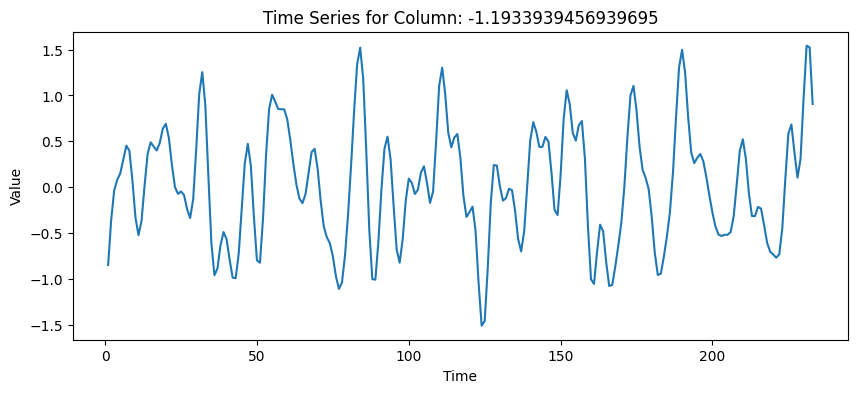

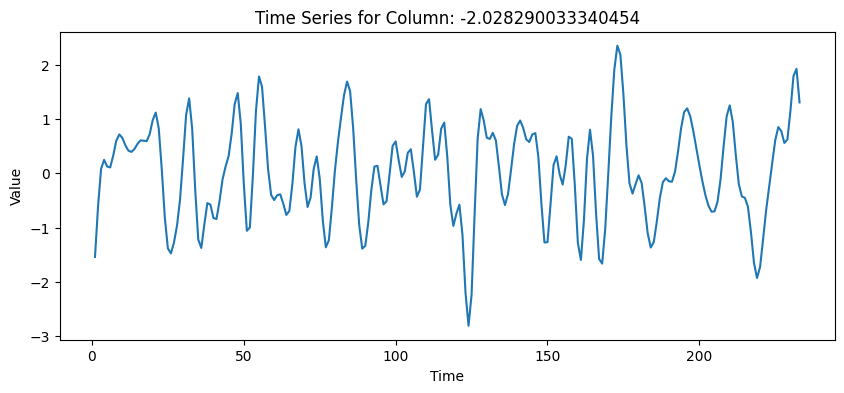

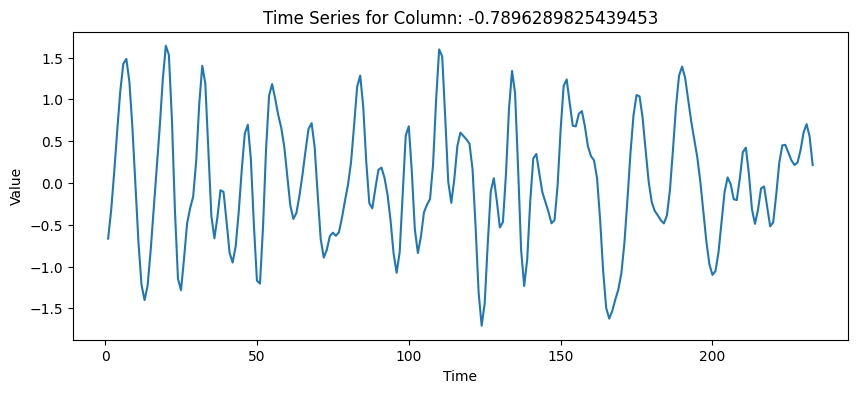

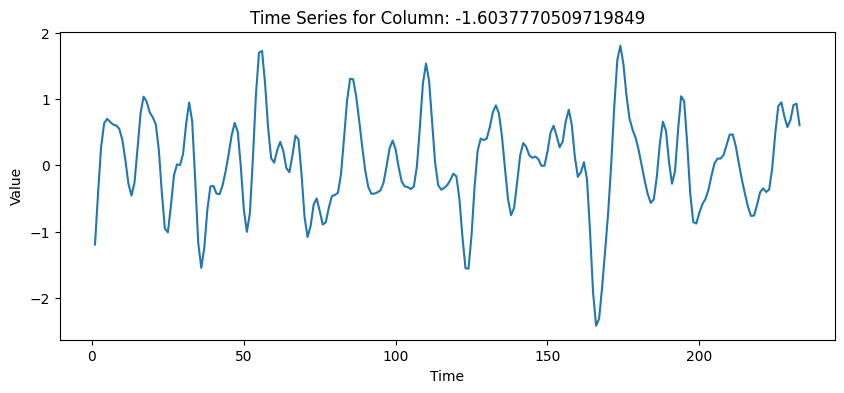

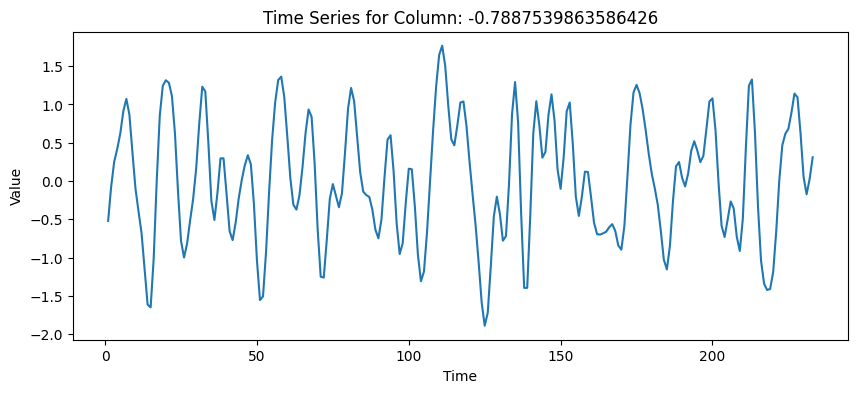

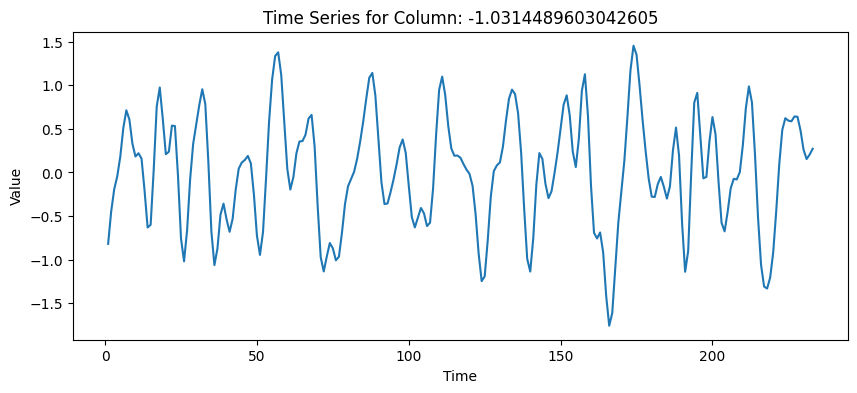

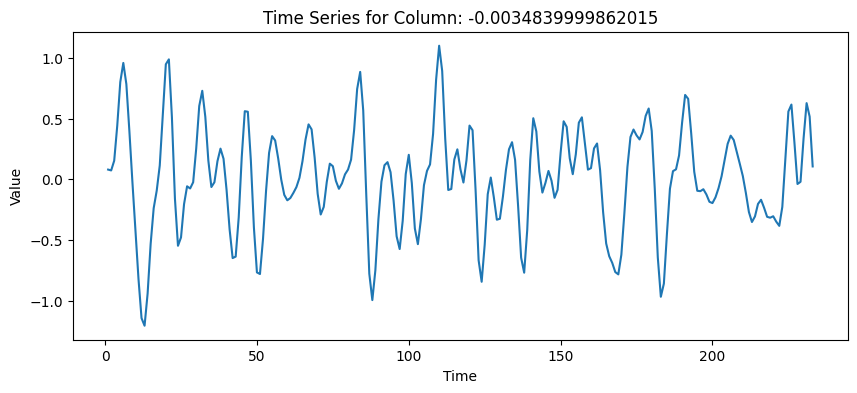

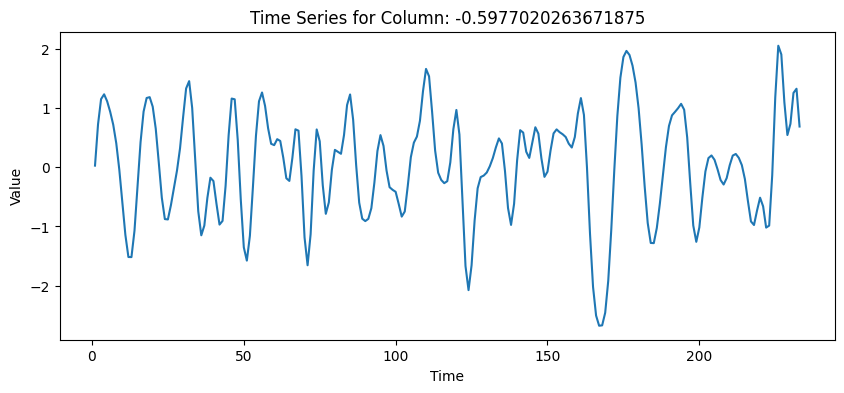

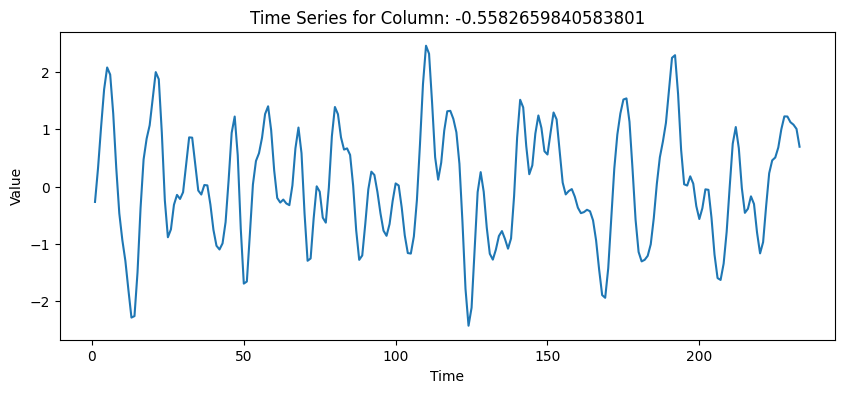

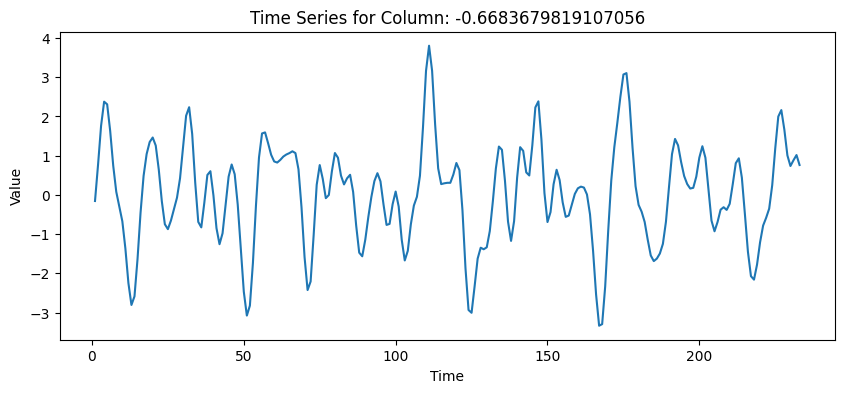

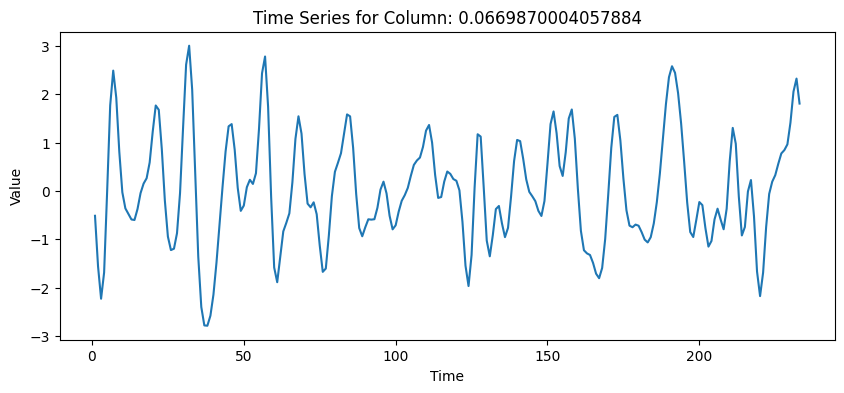

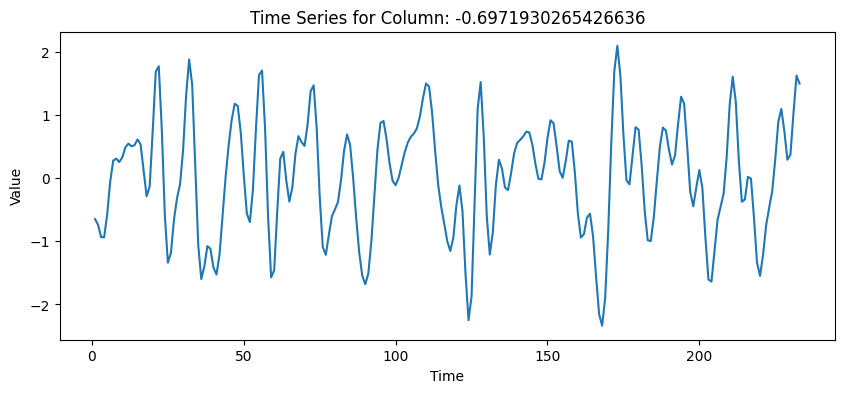

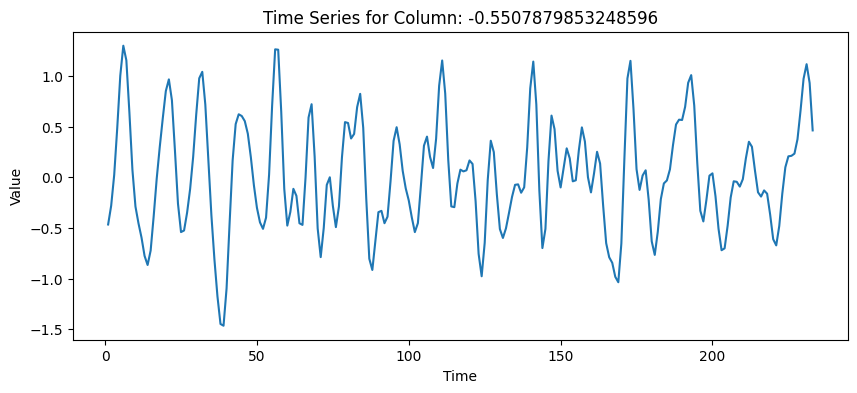

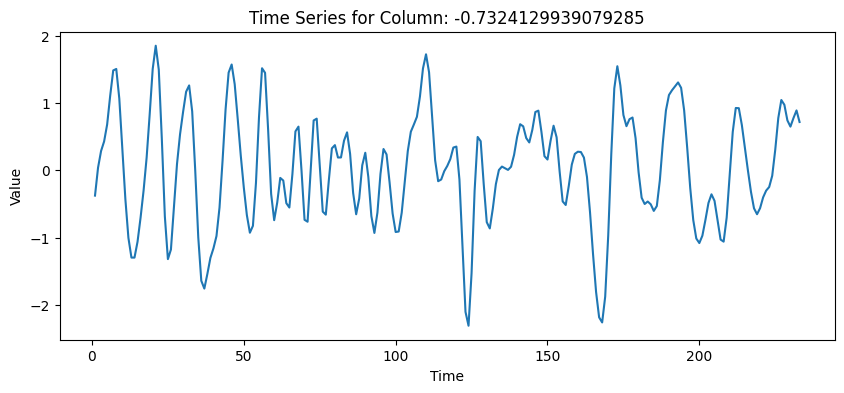

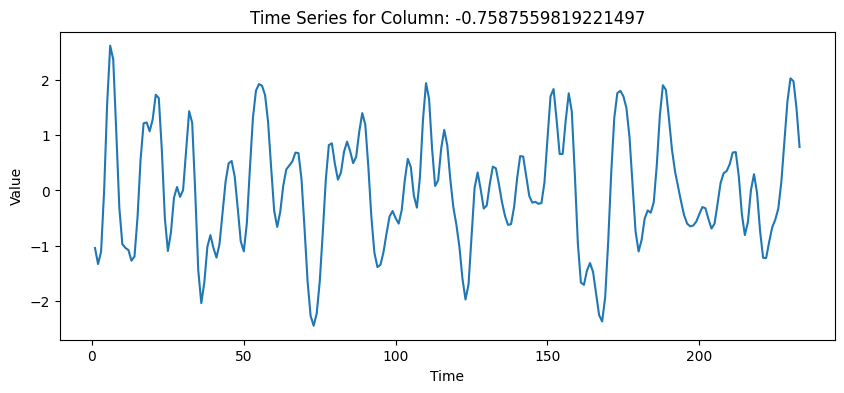

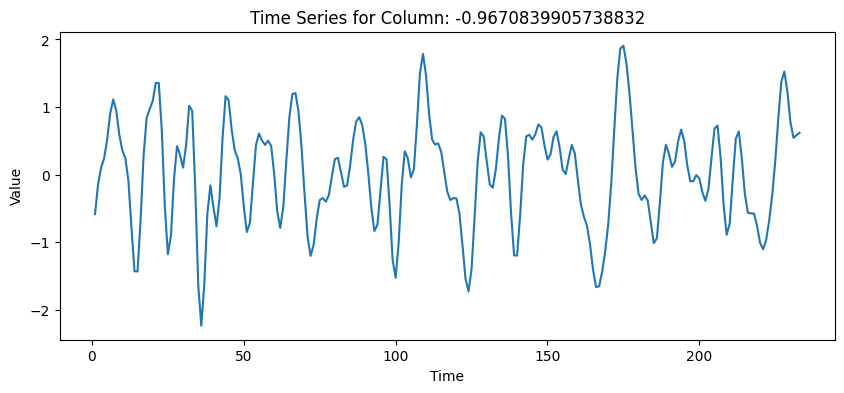

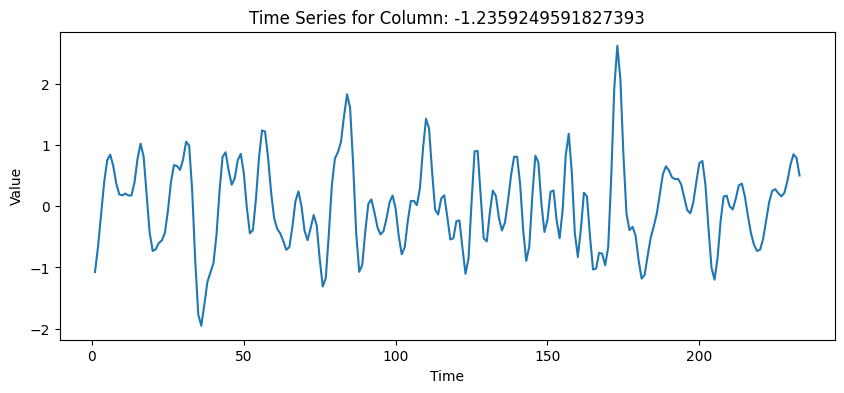

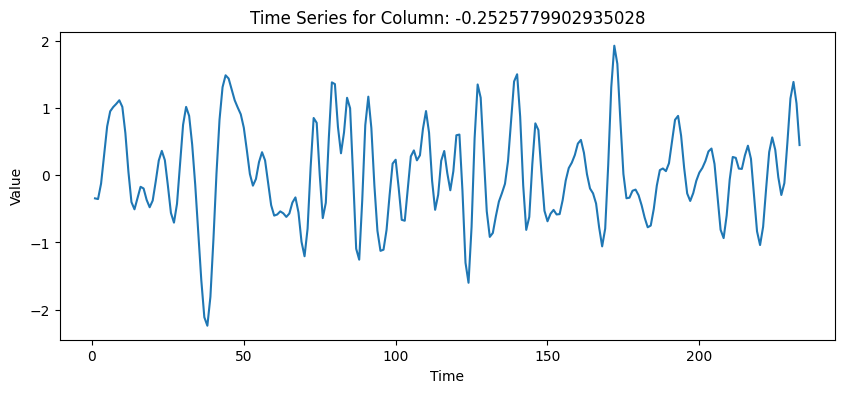

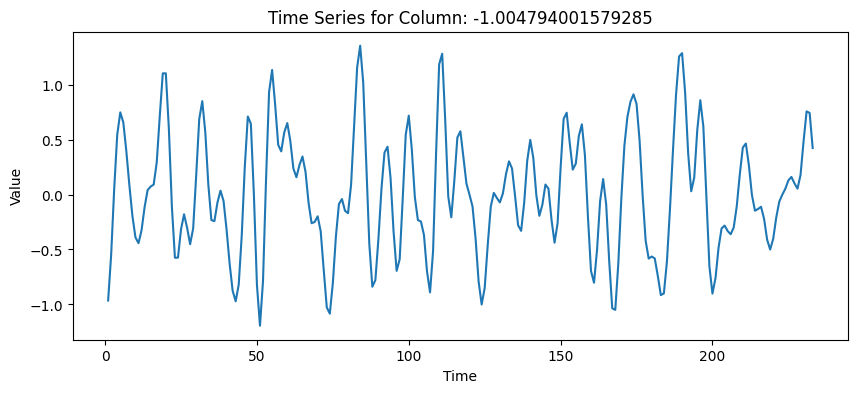

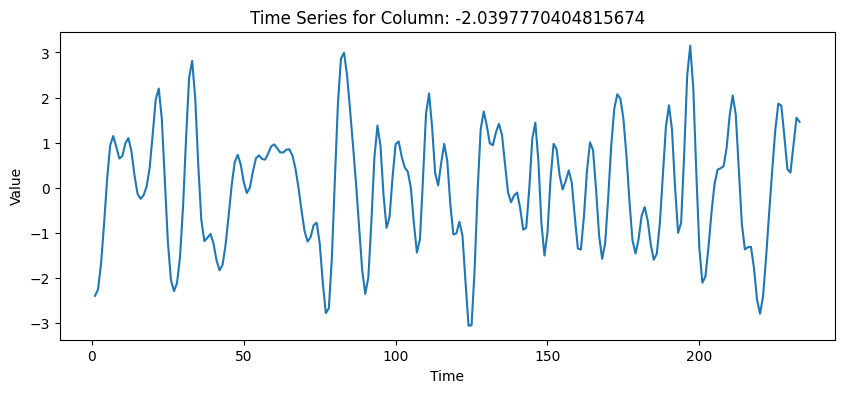

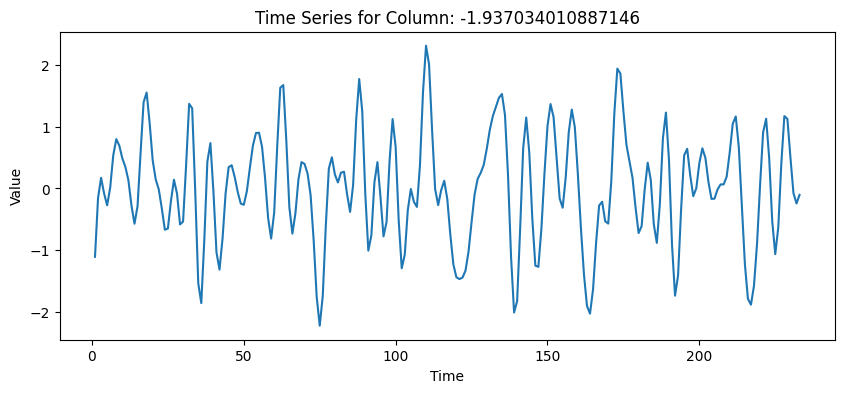

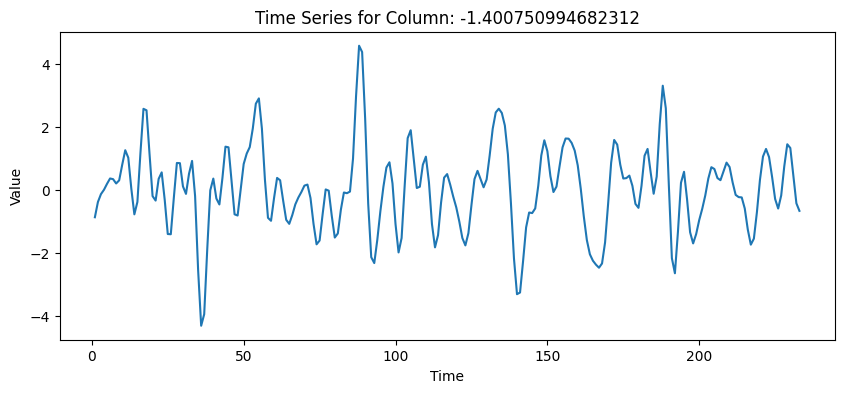

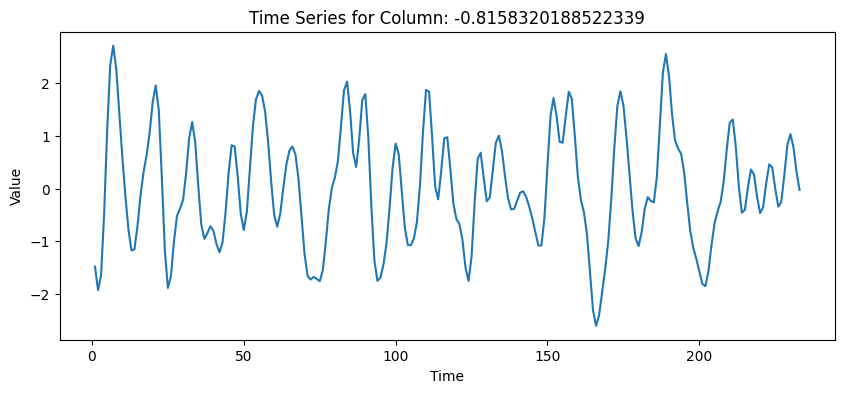

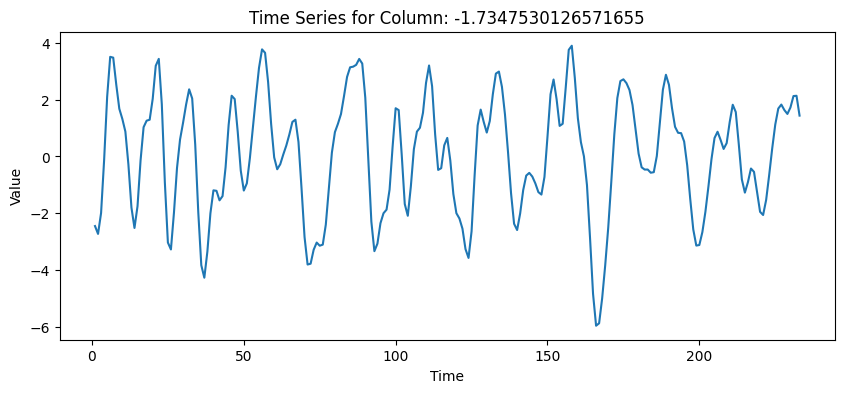

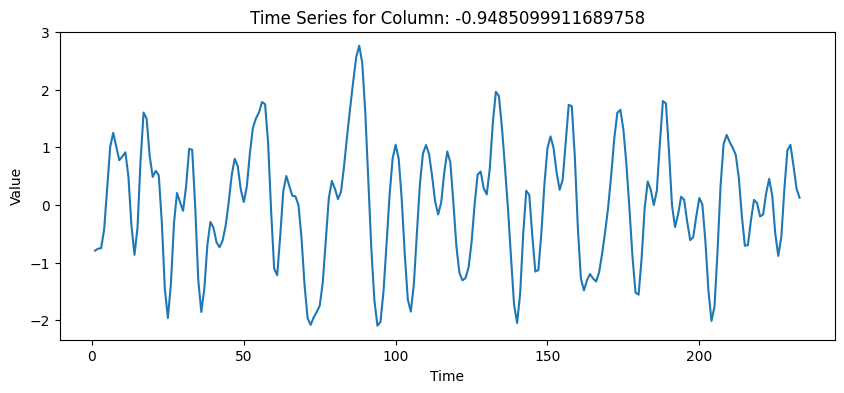

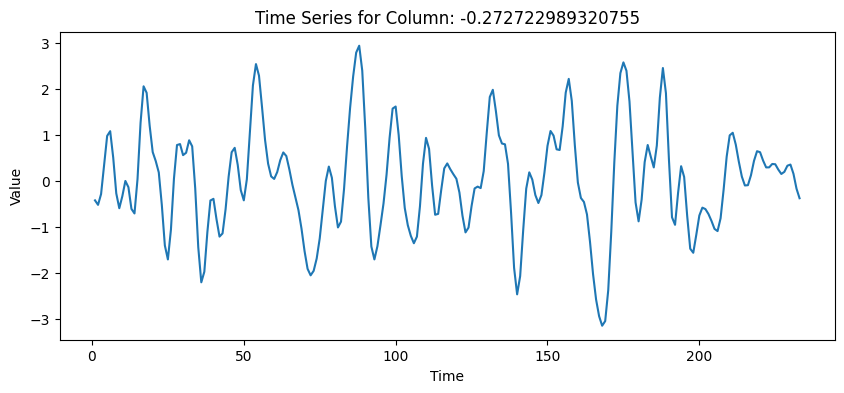

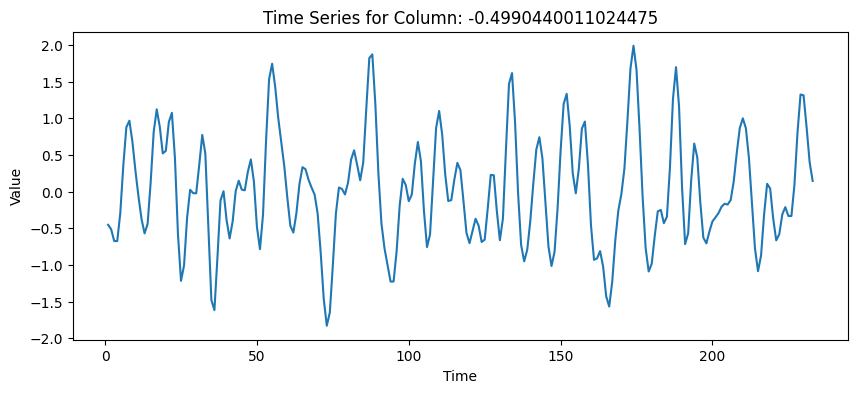

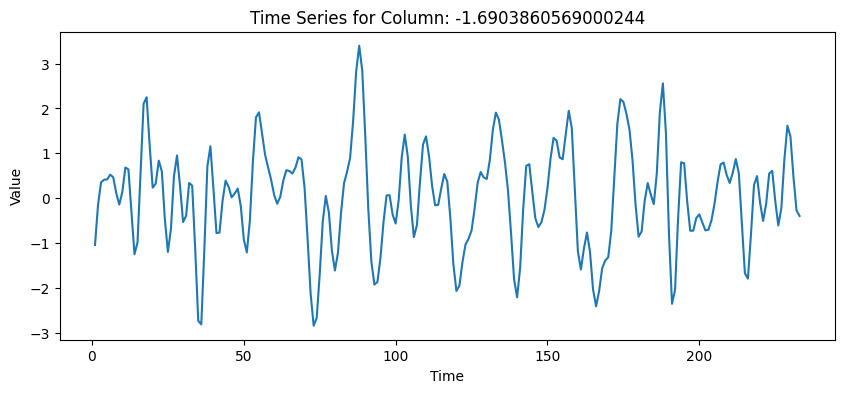

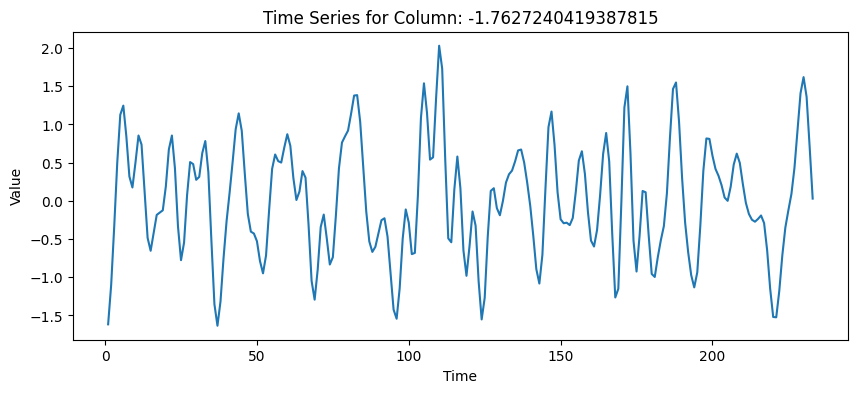

KeyboardInterrupt: ignored

<Figure size 1000x400 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/Data/CMU_a_0050649_rois_aal.1D'  # Replace with the actual path to the file

try:
    # Read the .1D file into a DataFrame
    df = pd.read_csv(file_path, sep='\t', comment='#')

    # Set the first row as column headers
    df.columns = df.iloc[0]

    # Drop the first row (header row) from the DataFrame
    df = df[1:]

    # Convert the columns to numeric (if needed)
    df = df.apply(pd.to_numeric)

    # Iterate over columns and plot them
    for column in df.columns:
        plt.figure(figsize=(10, 4))
        plt.plot(df[column])
        plt.title(f"Time Series for Column: {column}")
        plt.xlabel("Time")
        plt.ylabel("Value")
        plt.show()

except FileNotFoundError:
    print(f"File not found: {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")
